In [1]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
def extract_kilonova_ids(file_path="/media/biswajit/drive/PLAsTiCC_data/training_set_metadata.csv"):
    
    df_meta_data = Table.read(file_path,delimiter=",")
    
    kilonova_index= df_meta_data['target']==64
    return np.array(df_meta_data[kilonova_index]['object_id'])

In [3]:
kilonova_ids=extract_kilonova_ids()
print(kilonova_ids)

[    62187    139362   1573501   3572446   4311960   4539153   5102349
   6460481  11574036  11742403  11904502  13537416  15897952  16173841
  16452890  17116737  17958346  19183060  20539244  22245279  23798919
  26684850  27883625  31292040  31563138  33065798  35411122  35630788
  39745050  44564061  44864629  46213566  46489715  46553925  47142591
  48098969  49519074  49850869  50120780  51527253  54000531  56942944
  59364010  59464880  59698197  61543226  61688145  66740787  67195030
  67600070  70425954  74492858  74512775  74943698  75080064  75218022
  76457103  80913604  81456459  84706583  85030920  86490974  89733353
  89942025  90269218  93121505  93394704  93725998  95541281  96619113
  97214939  97639845  97765302  99449747 102551107 102599855 103258429
 103989029 105385367 107129776 108253858 108305965 110808232 113330500
 113678572 113851505 114467134 115381923 115713701 118230321 119260275
 120794836 120845357 121016694 121257780 121326699 122963326 124687561
 12555

In [4]:
def load_data(file_path="/media/biswajit/drive/PLAsTiCC_data/training_set.csv"):
    table = Table.read(file_path)
    return table

In [5]:
df = load_data()
print(df)

object_id    mjd     passband     flux      flux_err detected
--------- ---------- -------- ------------ --------- --------
      615 59750.4229        2  -544.810303  3.622952        1
      615 59750.4306        1  -816.434326   5.55337        1
      615 59750.4383        3  -471.385529  3.801213        1
      615  59750.445        4  -388.984985 11.395031        1
      615  59752.407        2  -681.858887  4.041204        1
      615 59752.4147        1 -1061.457031  6.472994        1
      615 59752.4224        3   -524.95459  3.552751        1
      615 59752.4334        4  -393.480225  3.599346        1
      615 59752.4435        5   -355.88678 10.421921        1
      615 59767.2968        2   -548.01355  3.462291        1
      ...        ...      ...          ...       ...      ...
130779836  60537.147        3    -41.85004 26.782366        0
130779836 60542.0489        4   -60.500492 14.743795        0
130779836 60543.0247        4   -48.527161  24.00408        0
13077983

In [6]:
pass_bands=np.unique(df['passband'])
pass_band_dict = {0:'C1' , 1:'C2' , 2:'C3' , 3:'C4' , 4:'k' , 5:'C5'}

In [7]:
def plot_data(df,number_of_days = None,_pbnames = ['u','g','r','i','z','y']):   
    
    fig = plt.figure(figsize=(15,12))
    kid = df['object_id'][0]
    print(df['object_id'])
    
    for band in pass_bands:
        
        pbname=_pbnames[band]
        
        if number_of_days == None:
            ind = df['passband'] == band
            current_band_data = df[ind]
    
        else:
            pass_ind = df['passband'] == band
            pass_data = df[pass_ind]
            min_day = np.amax(df['mjd']-number_of_days)
            ind = pass_data['mjd'] > min_day
            current_band_data = pass_data[ind]
            
        
        if len(current_band_data)>0:
            plt.errorbar(current_band_data['mjd'],current_band_data['flux'],current_band_data['flux_err'], color=pass_band_dict[band],label = pbname)
    
    if number_of_days ==None:
        plt.plot([np.amin(df['mjd']),np.amax(df['mjd'])],[0,0])
    else:
        plt.plot([np.amax(df['mjd'])-number_of_days,np.amax(df['mjd'])],[0,0],label='y=0')
    
    plt.legend()
    plt.xlabel("MJD",fontsize=40)
    plt.ylabel("flux",fontsize=40)
    plt.savefig("./kilonova_img/all_days/train"+str(kid))
    plt.show()

object_id
---------
    62187
    62187
    62187
    62187
    62187
    62187
    62187
    62187
    62187
    62187
      ...
    62187
    62187
    62187
    62187
    62187
    62187
    62187
    62187
    62187
    62187
    62187
Length = 330 rows


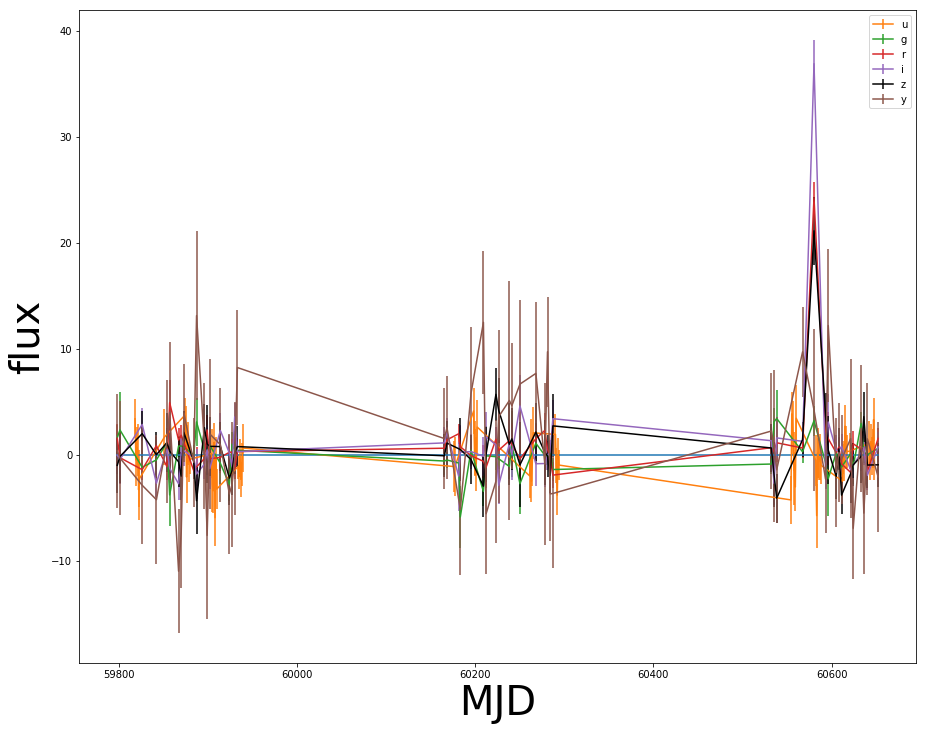

object_id
---------
   139362
   139362
   139362
   139362
   139362
   139362
   139362
   139362
   139362
   139362
      ...
   139362
   139362
   139362
   139362
   139362
   139362
   139362
   139362
   139362
   139362
   139362
Length = 255 rows


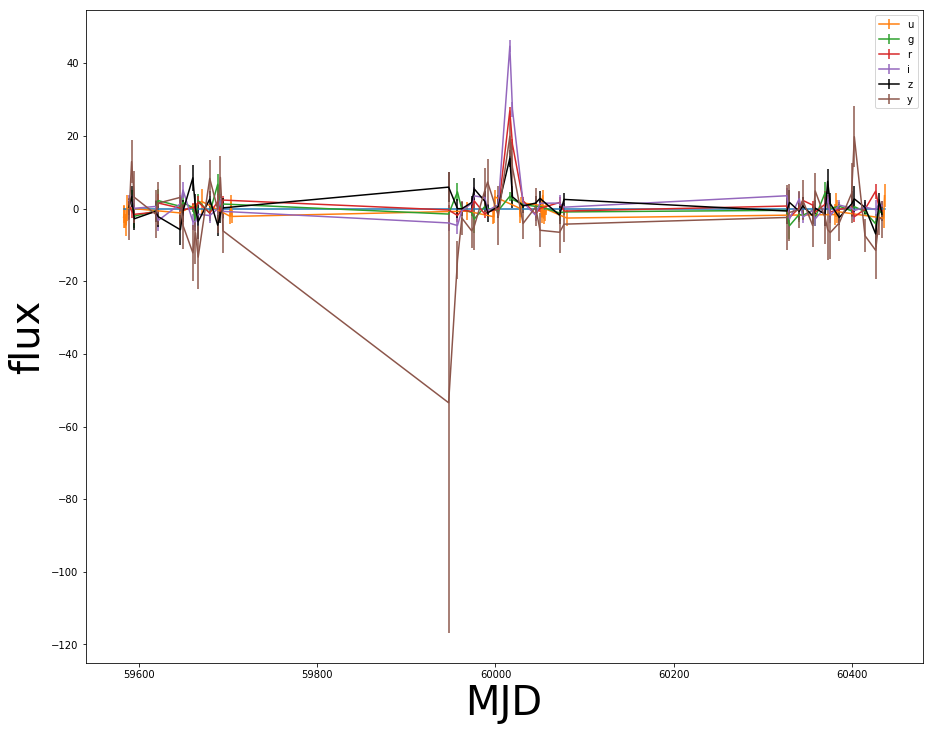

object_id
---------
  1573501
  1573501
  1573501
  1573501
  1573501
  1573501
  1573501
  1573501
  1573501
  1573501
      ...
  1573501
  1573501
  1573501
  1573501
  1573501
  1573501
  1573501
  1573501
  1573501
  1573501
  1573501
Length = 142 rows


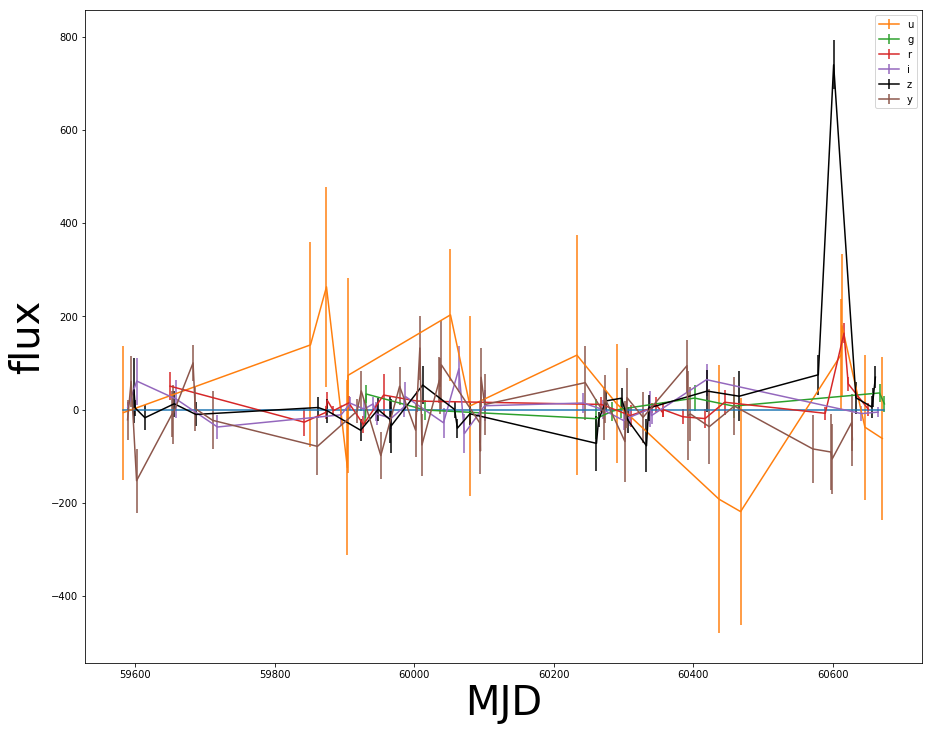

object_id
---------
  3572446
  3572446
  3572446
  3572446
  3572446
  3572446
  3572446
  3572446
  3572446
  3572446
      ...
  3572446
  3572446
  3572446
  3572446
  3572446
  3572446
  3572446
  3572446
  3572446
  3572446
  3572446
Length = 112 rows


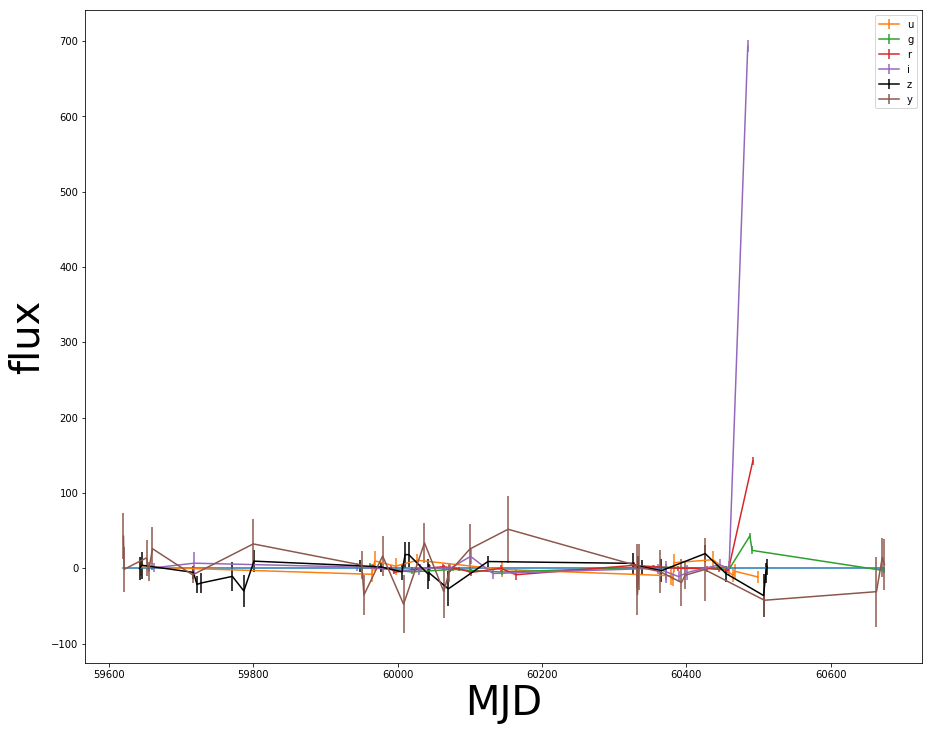

object_id
---------
  4311960
  4311960
  4311960
  4311960
  4311960
  4311960
  4311960
  4311960
  4311960
  4311960
      ...
  4311960
  4311960
  4311960
  4311960
  4311960
  4311960
  4311960
  4311960
  4311960
  4311960
  4311960
Length = 115 rows


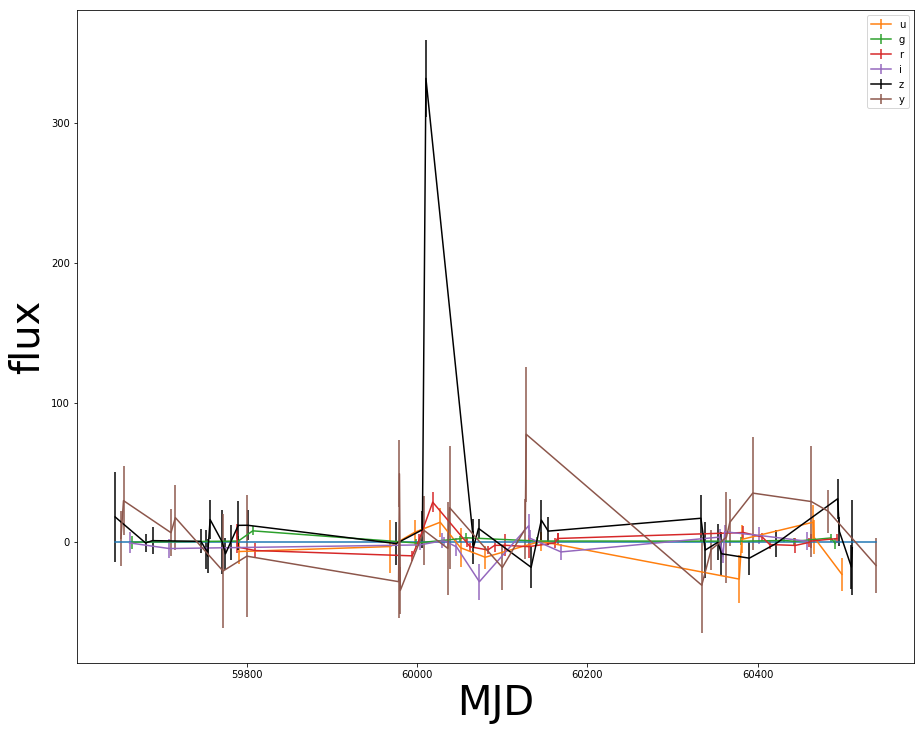

object_id
---------
  4539153
  4539153
  4539153
  4539153
  4539153
  4539153
  4539153
  4539153
  4539153
  4539153
      ...
  4539153
  4539153
  4539153
  4539153
  4539153
  4539153
  4539153
  4539153
  4539153
  4539153
  4539153
Length = 133 rows


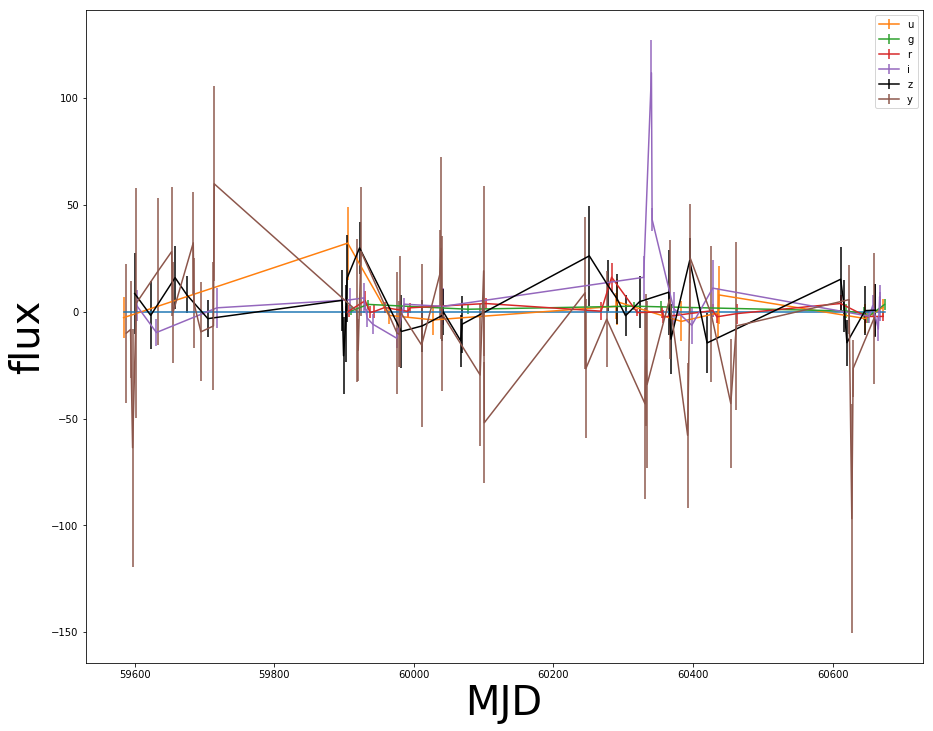

object_id
---------
  5102349
  5102349
  5102349
  5102349
  5102349
  5102349
  5102349
  5102349
  5102349
  5102349
      ...
  5102349
  5102349
  5102349
  5102349
  5102349
  5102349
  5102349
  5102349
  5102349
  5102349
  5102349
Length = 138 rows


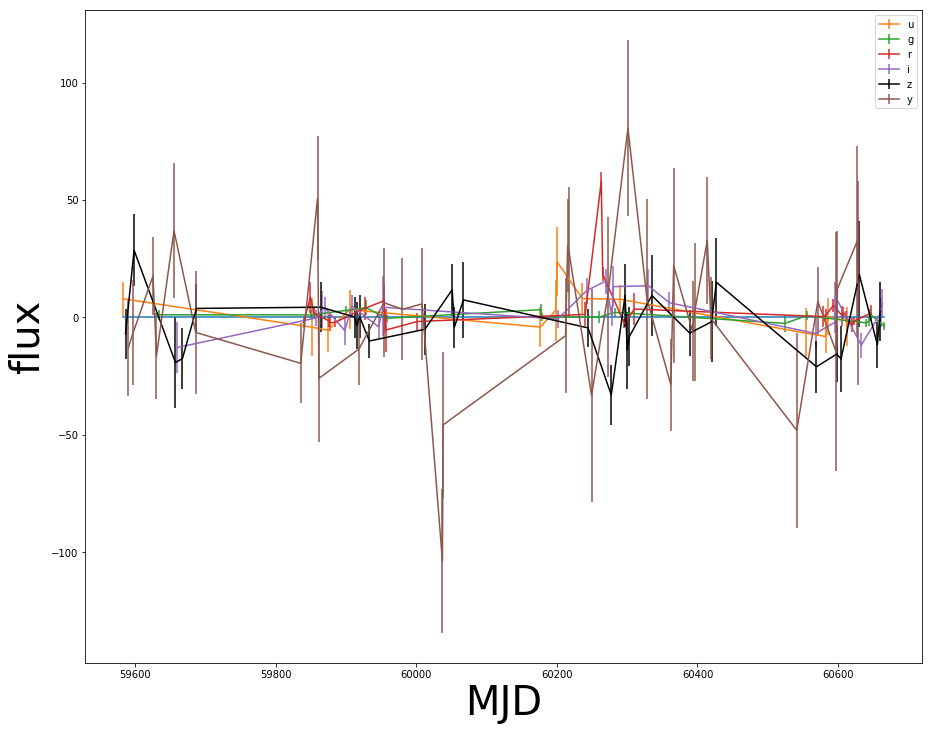

object_id
---------
  6460481
  6460481
  6460481
  6460481
  6460481
  6460481
  6460481
  6460481
  6460481
  6460481
      ...
  6460481
  6460481
  6460481
  6460481
  6460481
  6460481
  6460481
  6460481
  6460481
  6460481
  6460481
Length = 127 rows


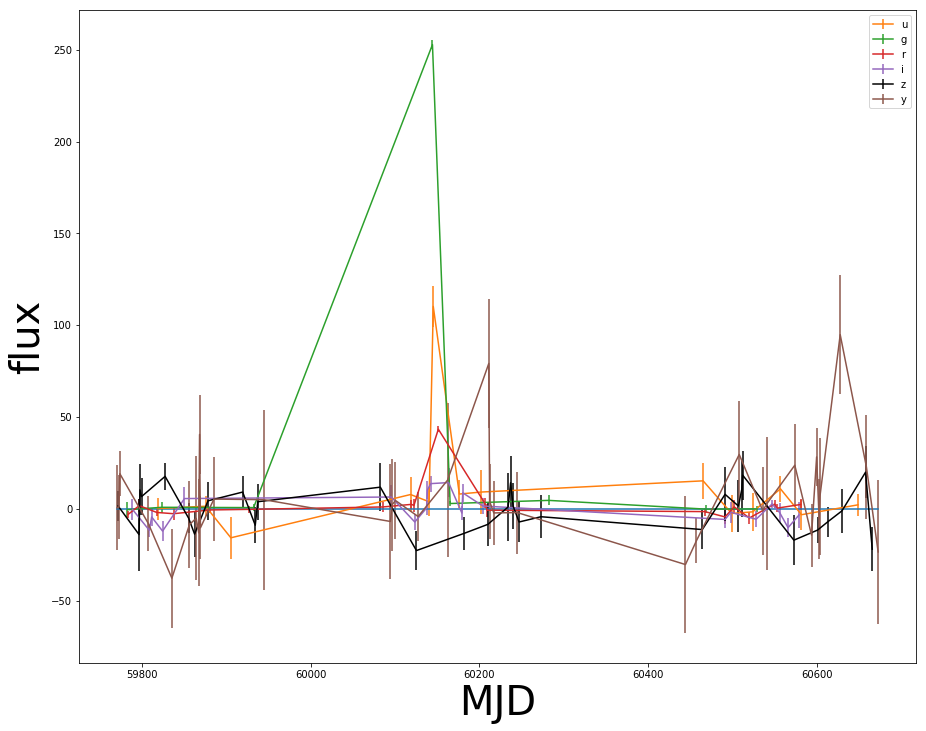

object_id
---------
 11574036
 11574036
 11574036
 11574036
 11574036
 11574036
 11574036
 11574036
 11574036
 11574036
      ...
 11574036
 11574036
 11574036
 11574036
 11574036
 11574036
 11574036
 11574036
 11574036
 11574036
 11574036
Length = 143 rows


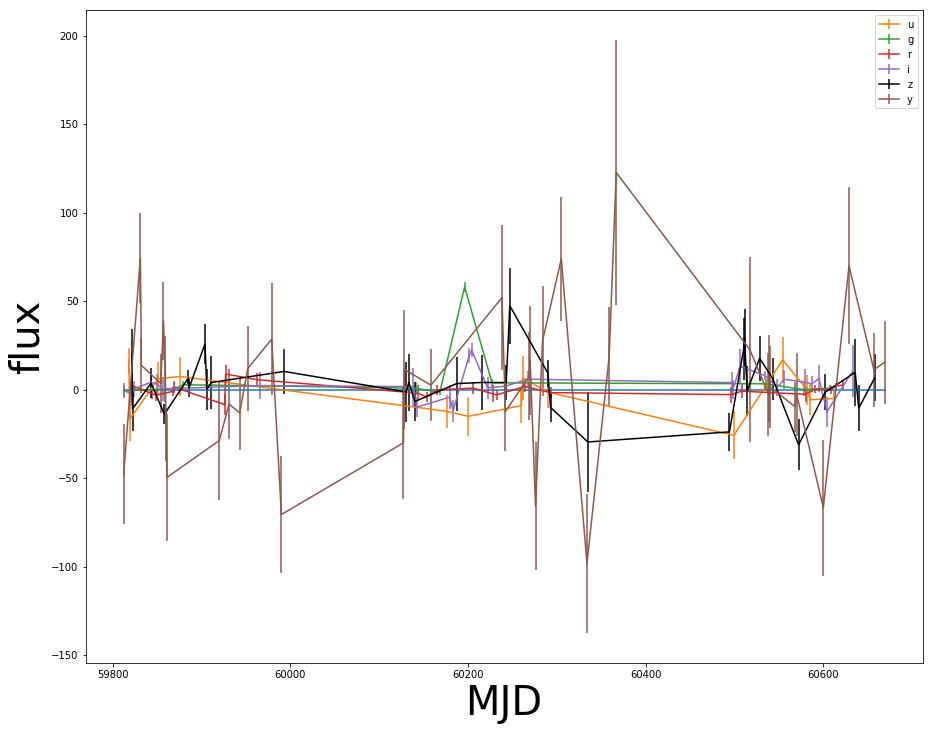

object_id
---------
 11742403
 11742403
 11742403
 11742403
 11742403
 11742403
 11742403
 11742403
 11742403
 11742403
      ...
 11742403
 11742403
 11742403
 11742403
 11742403
 11742403
 11742403
 11742403
 11742403
 11742403
 11742403
Length = 136 rows


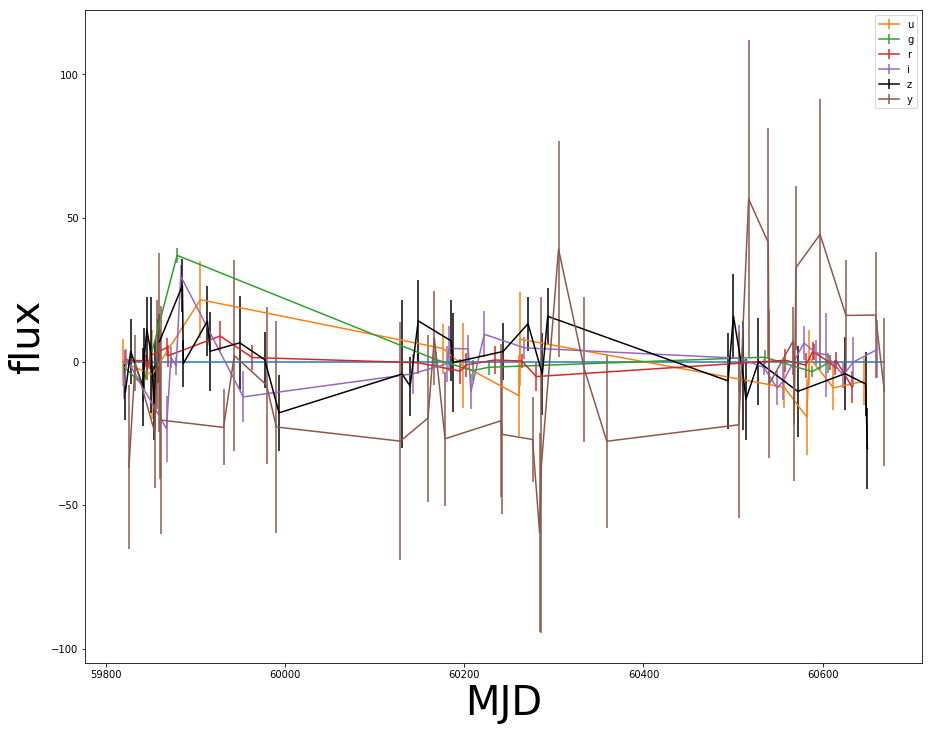

object_id
---------
 11904502
 11904502
 11904502
 11904502
 11904502
 11904502
 11904502
 11904502
 11904502
 11904502
      ...
 11904502
 11904502
 11904502
 11904502
 11904502
 11904502
 11904502
 11904502
 11904502
 11904502
 11904502
Length = 135 rows


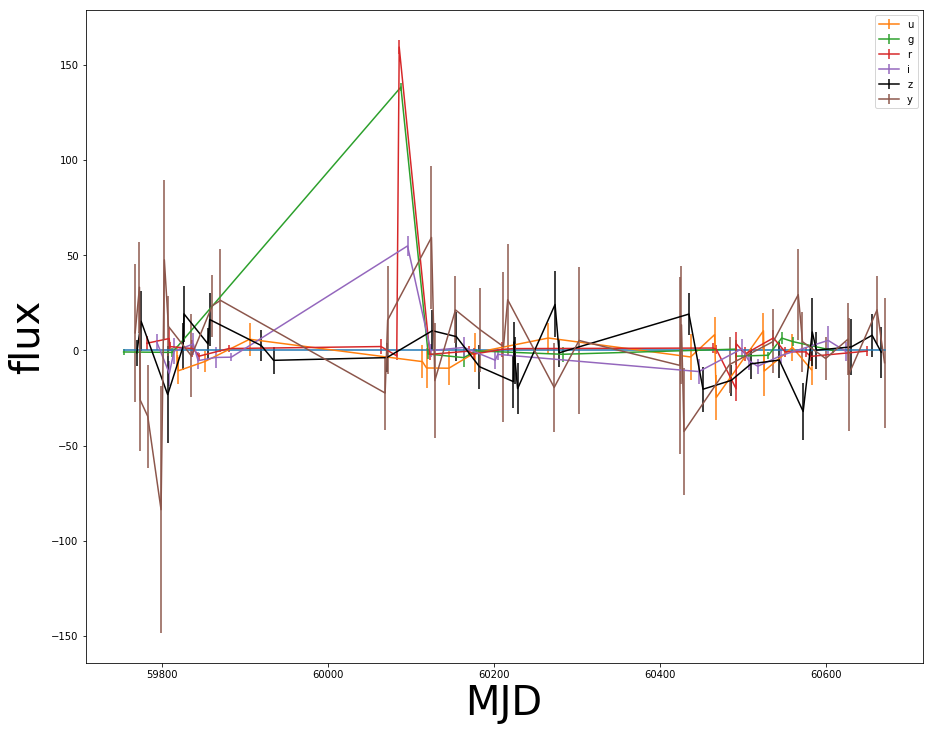

object_id
---------
 13537416
 13537416
 13537416
 13537416
 13537416
 13537416
 13537416
 13537416
 13537416
 13537416
      ...
 13537416
 13537416
 13537416
 13537416
 13537416
 13537416
 13537416
 13537416
 13537416
 13537416
 13537416
Length = 115 rows


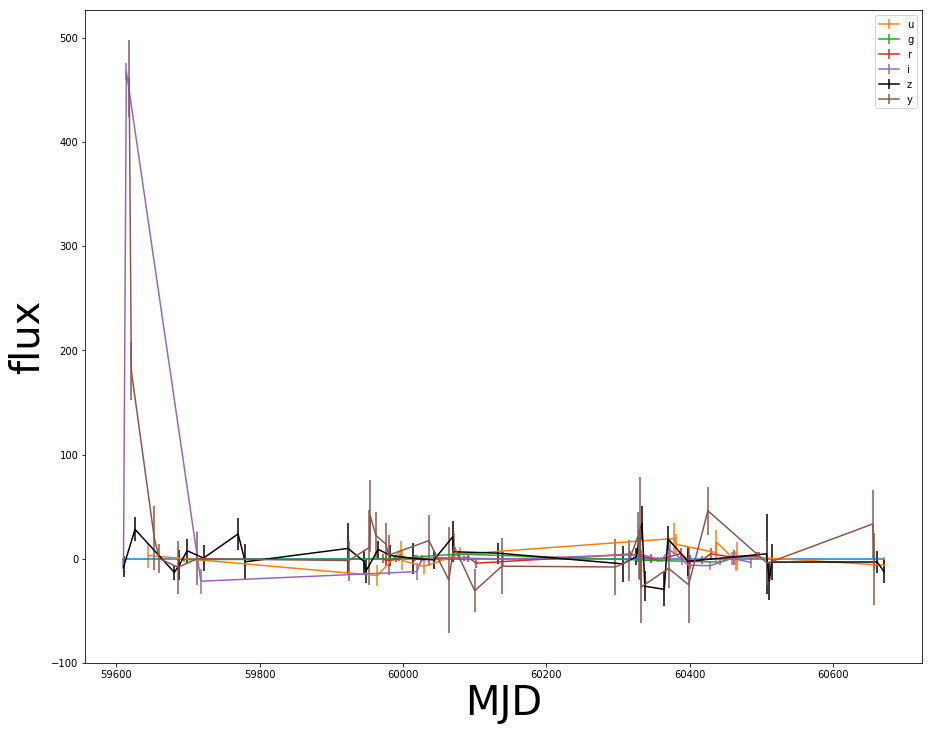

object_id
---------
 15897952
 15897952
 15897952
 15897952
 15897952
 15897952
 15897952
 15897952
 15897952
 15897952
      ...
 15897952
 15897952
 15897952
 15897952
 15897952
 15897952
 15897952
 15897952
 15897952
 15897952
 15897952
Length = 147 rows


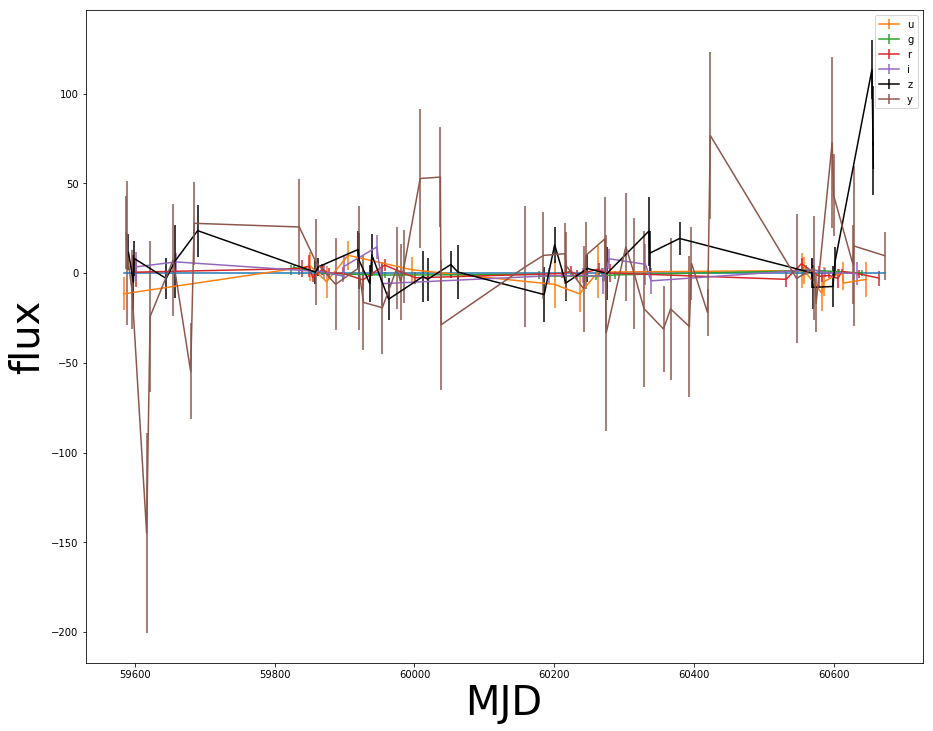

object_id
---------
 16173841
 16173841
 16173841
 16173841
 16173841
 16173841
 16173841
 16173841
 16173841
 16173841
      ...
 16173841
 16173841
 16173841
 16173841
 16173841
 16173841
 16173841
 16173841
 16173841
 16173841
 16173841
Length = 139 rows


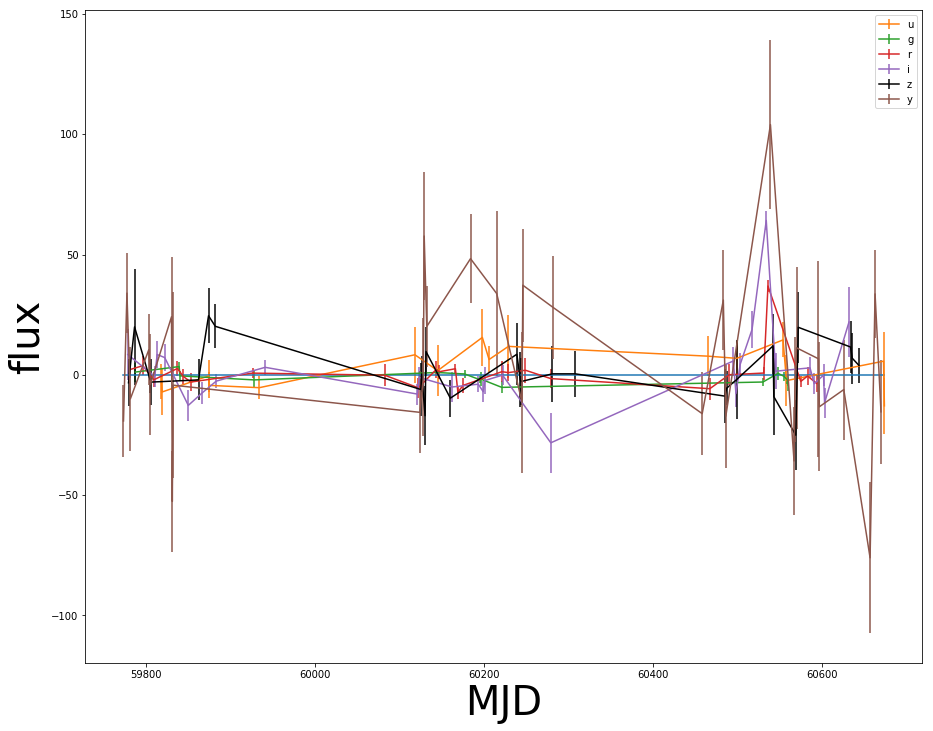

object_id
---------
 16452890
 16452890
 16452890
 16452890
 16452890
 16452890
 16452890
 16452890
 16452890
 16452890
      ...
 16452890
 16452890
 16452890
 16452890
 16452890
 16452890
 16452890
 16452890
 16452890
 16452890
 16452890
Length = 119 rows


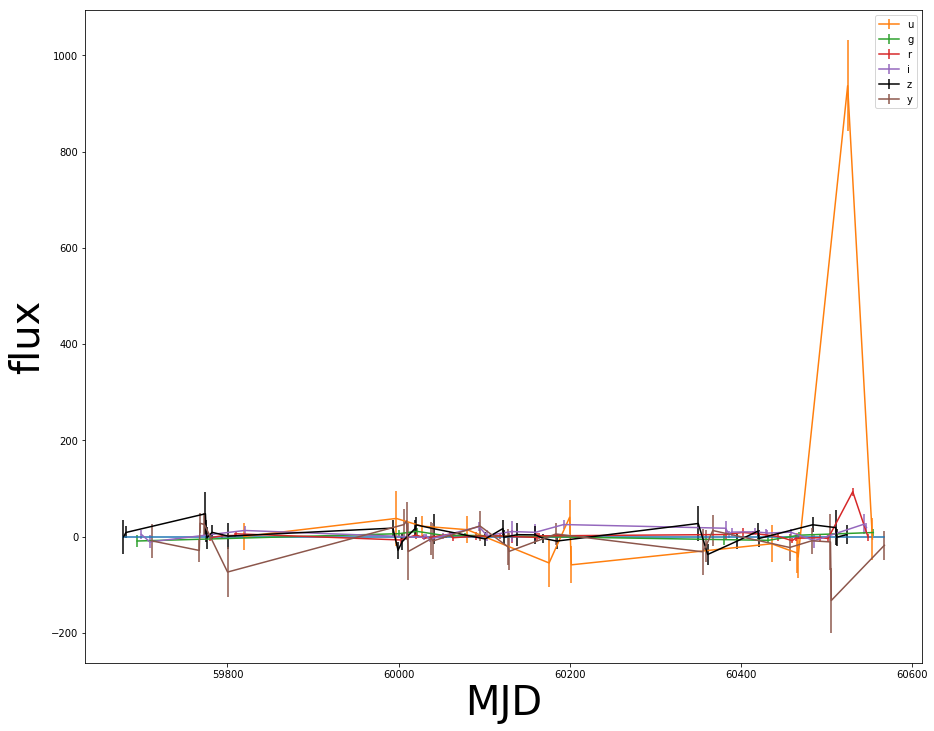

object_id
---------
 17116737
 17116737
 17116737
 17116737
 17116737
 17116737
 17116737
 17116737
 17116737
 17116737
      ...
 17116737
 17116737
 17116737
 17116737
 17116737
 17116737
 17116737
 17116737
 17116737
 17116737
 17116737
Length = 122 rows


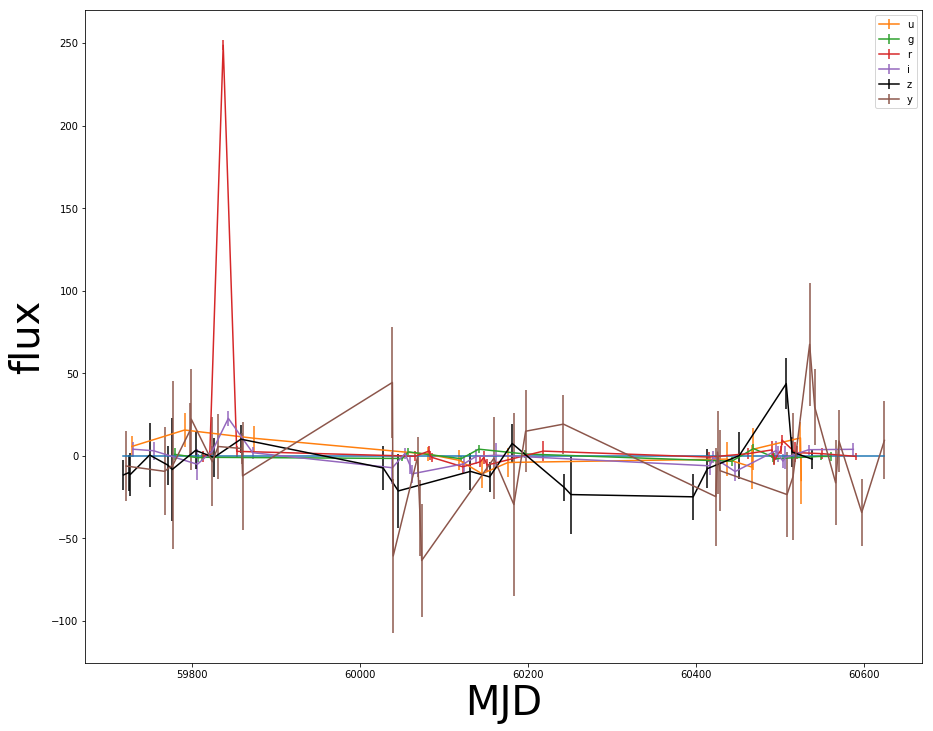

object_id
---------
 17958346
 17958346
 17958346
 17958346
 17958346
 17958346
 17958346
 17958346
 17958346
 17958346
      ...
 17958346
 17958346
 17958346
 17958346
 17958346
 17958346
 17958346
 17958346
 17958346
 17958346
 17958346
Length = 125 rows


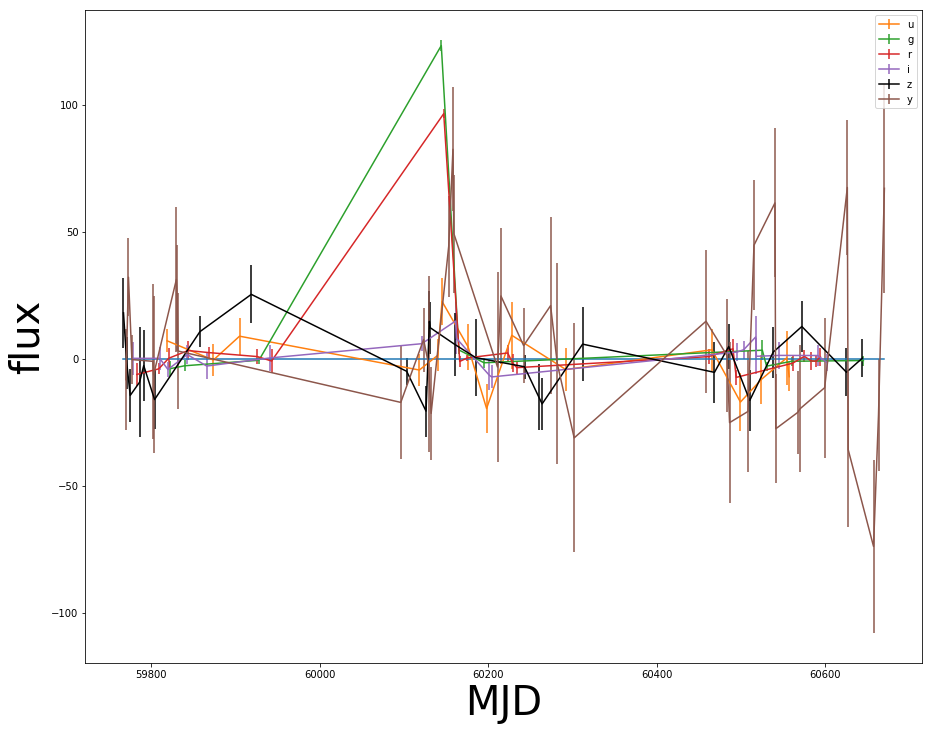

object_id
---------
 19183060
 19183060
 19183060
 19183060
 19183060
 19183060
 19183060
 19183060
 19183060
 19183060
      ...
 19183060
 19183060
 19183060
 19183060
 19183060
 19183060
 19183060
 19183060
 19183060
 19183060
 19183060
Length = 118 rows


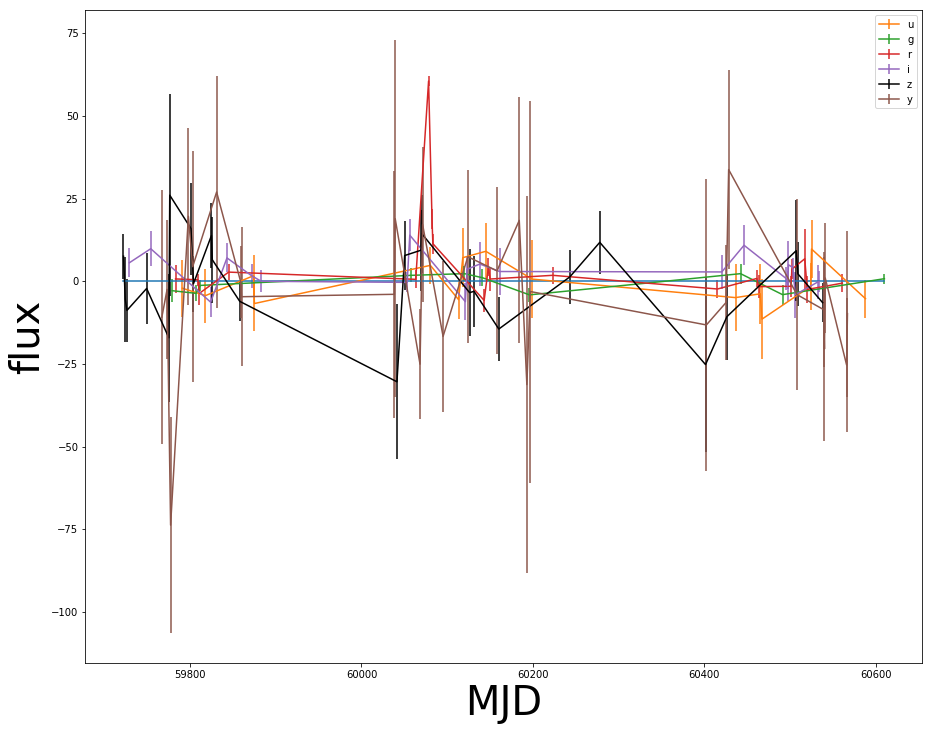

object_id
---------
 20539244
 20539244
 20539244
 20539244
 20539244
 20539244
 20539244
 20539244
 20539244
 20539244
      ...
 20539244
 20539244
 20539244
 20539244
 20539244
 20539244
 20539244
 20539244
 20539244
 20539244
 20539244
Length = 135 rows


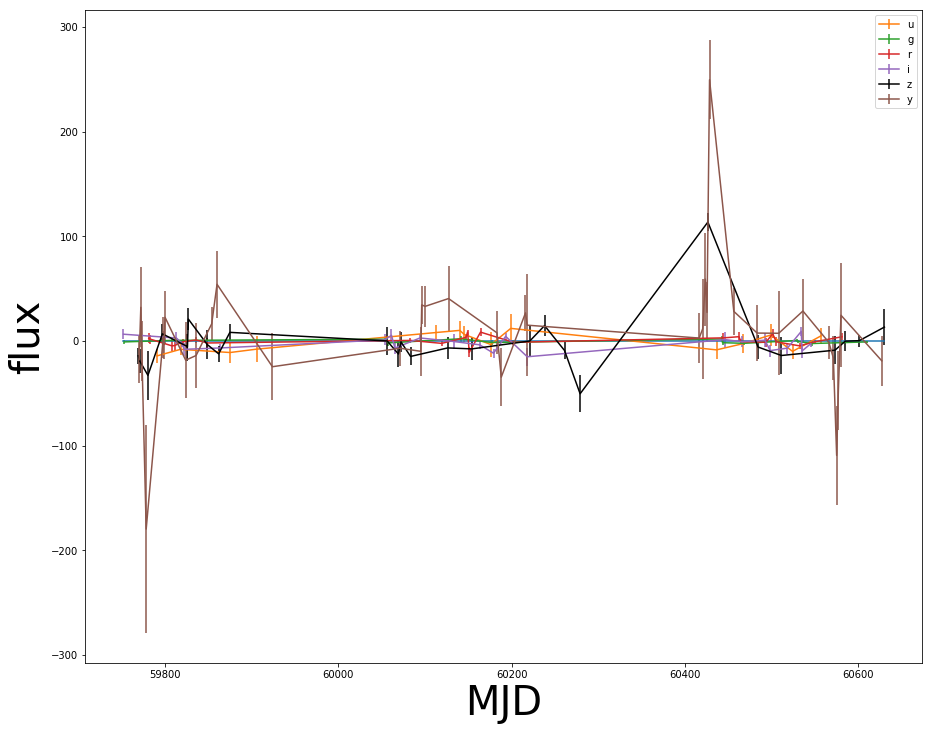

object_id
---------
 22245279
 22245279
 22245279
 22245279
 22245279
 22245279
 22245279
 22245279
 22245279
 22245279
      ...
 22245279
 22245279
 22245279
 22245279
 22245279
 22245279
 22245279
 22245279
 22245279
 22245279
 22245279
Length = 118 rows


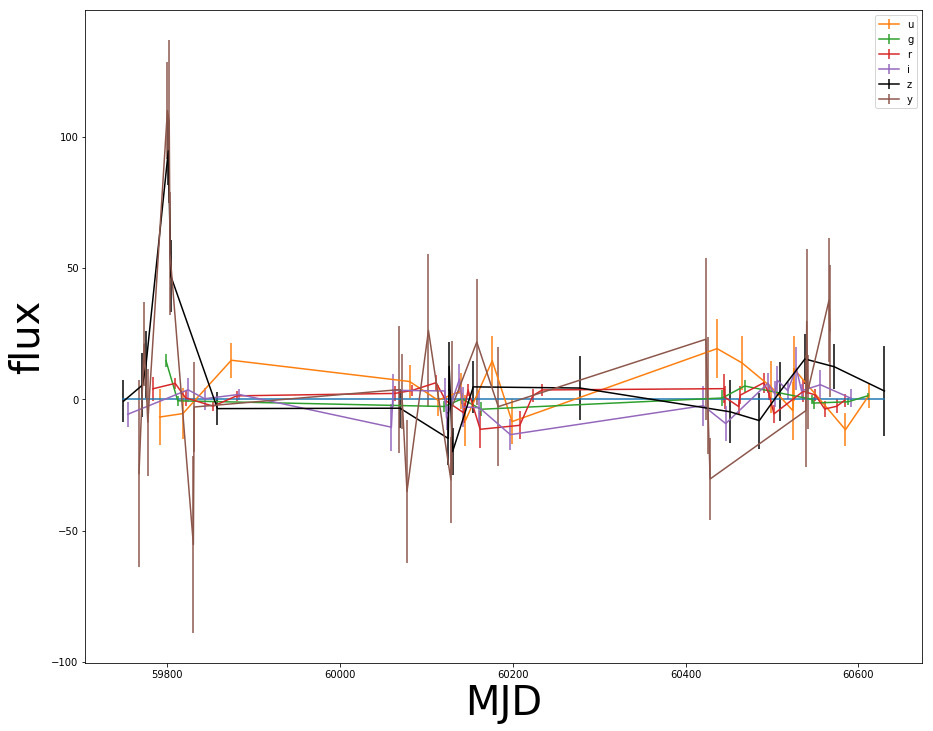

object_id
---------
 23798919
 23798919
 23798919
 23798919
 23798919
 23798919
 23798919
 23798919
 23798919
 23798919
      ...
 23798919
 23798919
 23798919
 23798919
 23798919
 23798919
 23798919
 23798919
 23798919
 23798919
 23798919
Length = 130 rows


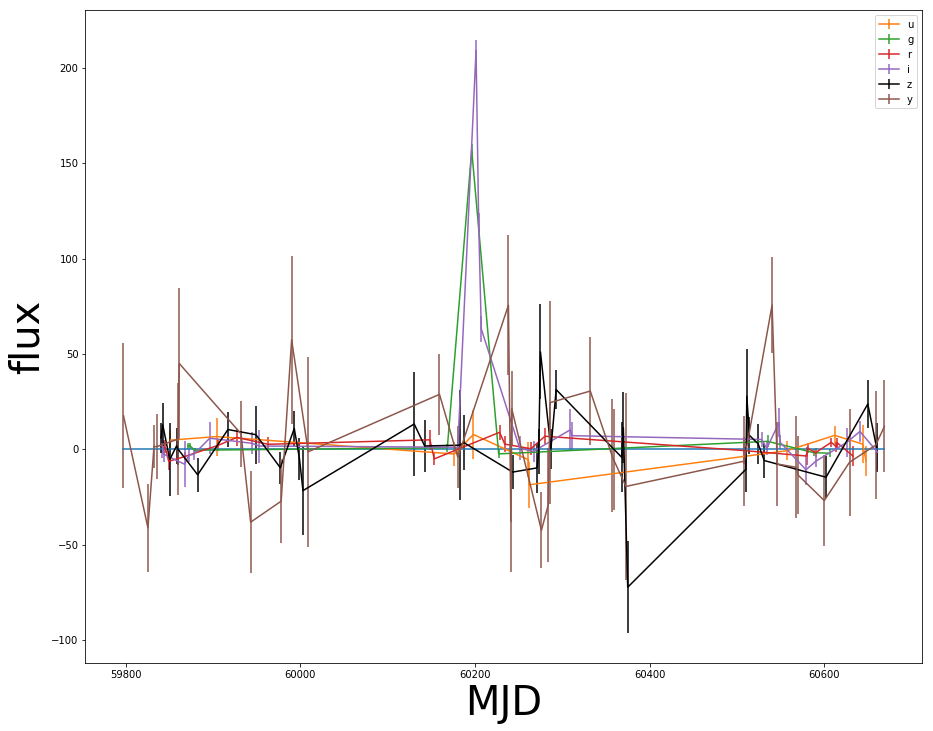

object_id
---------
 26684850
 26684850
 26684850
 26684850
 26684850
 26684850
 26684850
 26684850
 26684850
 26684850
      ...
 26684850
 26684850
 26684850
 26684850
 26684850
 26684850
 26684850
 26684850
 26684850
 26684850
 26684850
Length = 150 rows


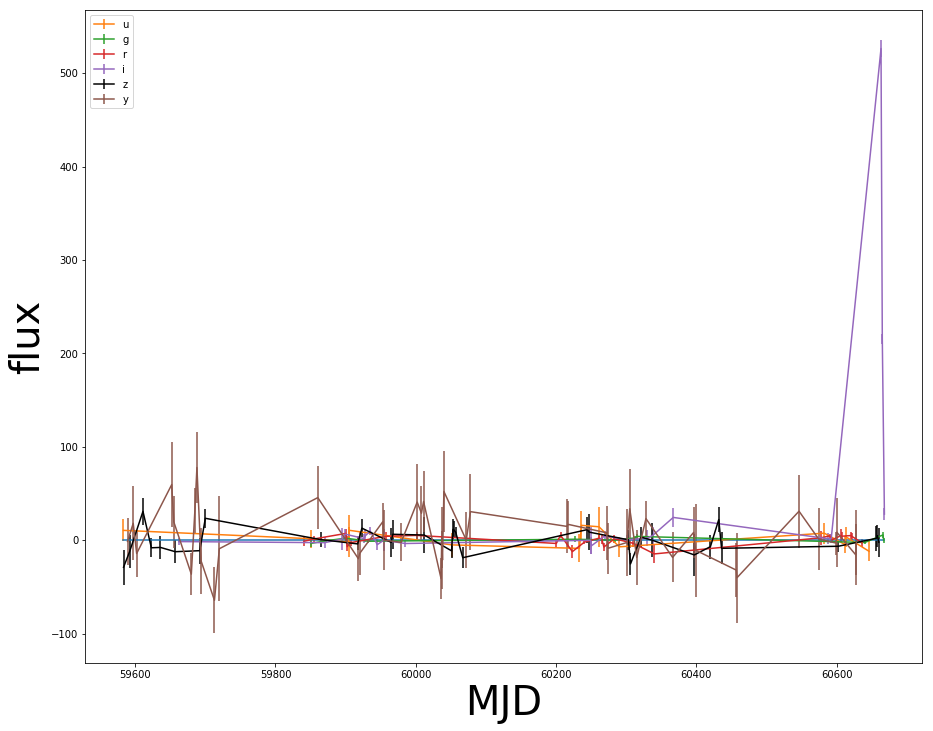

object_id
---------
 27883625
 27883625
 27883625
 27883625
 27883625
 27883625
 27883625
 27883625
 27883625
 27883625
      ...
 27883625
 27883625
 27883625
 27883625
 27883625
 27883625
 27883625
 27883625
 27883625
 27883625
 27883625
Length = 119 rows


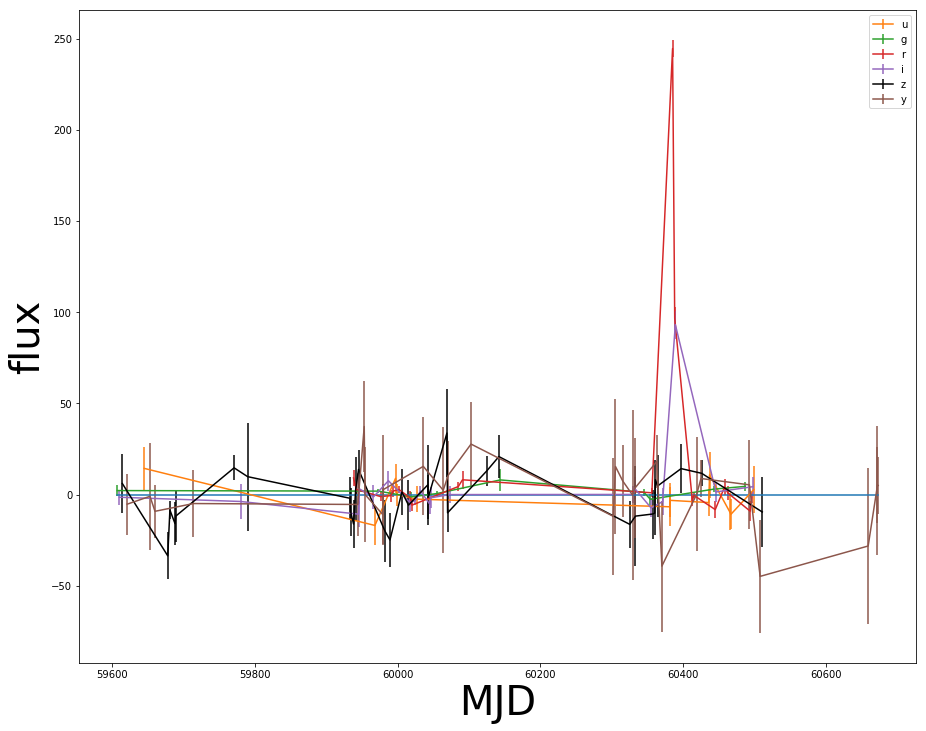

object_id
---------
 31292040
 31292040
 31292040
 31292040
 31292040
 31292040
 31292040
 31292040
 31292040
 31292040
      ...
 31292040
 31292040
 31292040
 31292040
 31292040
 31292040
 31292040
 31292040
 31292040
 31292040
 31292040
Length = 122 rows


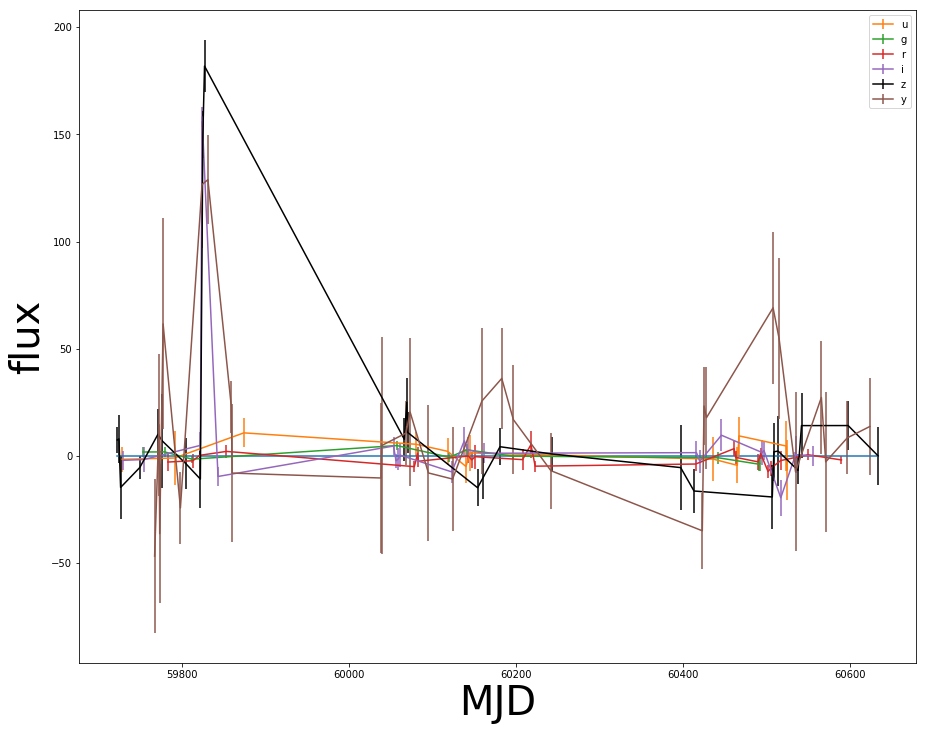

object_id
---------
 31563138
 31563138
 31563138
 31563138
 31563138
 31563138
 31563138
 31563138
 31563138
 31563138
      ...
 31563138
 31563138
 31563138
 31563138
 31563138
 31563138
 31563138
 31563138
 31563138
 31563138
 31563138
Length = 128 rows


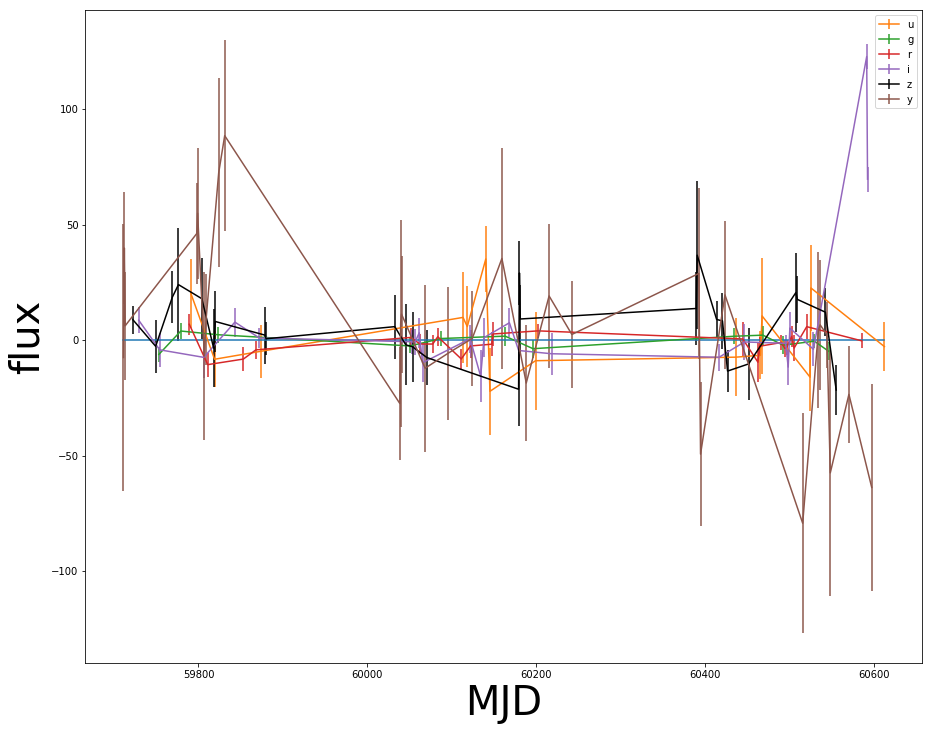

object_id
---------
 33065798
 33065798
 33065798
 33065798
 33065798
 33065798
 33065798
 33065798
 33065798
 33065798
      ...
 33065798
 33065798
 33065798
 33065798
 33065798
 33065798
 33065798
 33065798
 33065798
 33065798
 33065798
Length = 144 rows


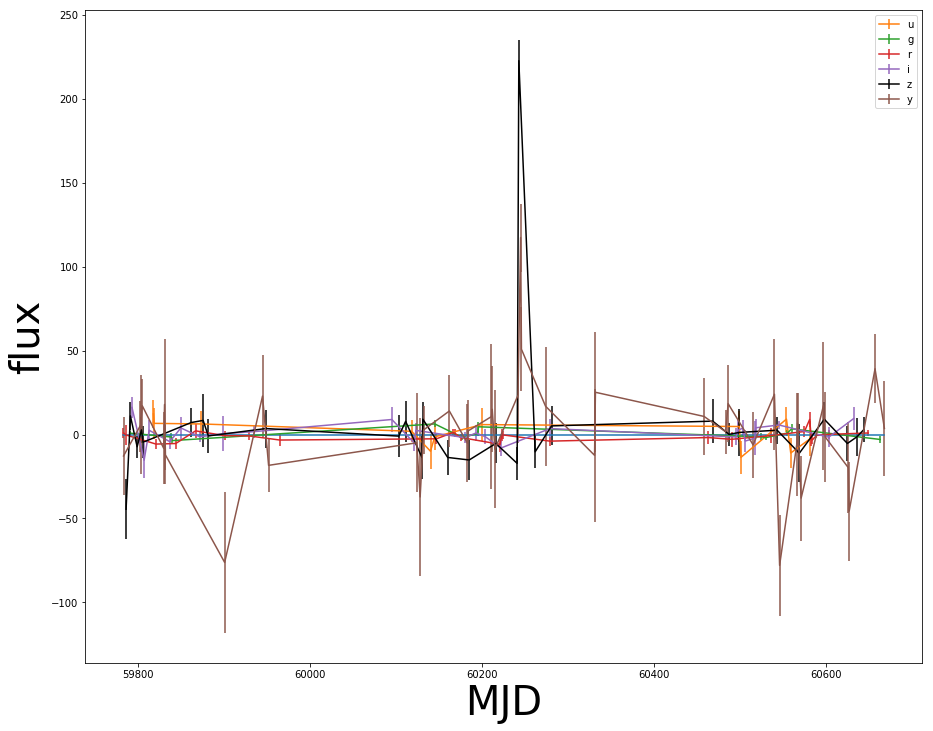

object_id
---------
 35411122
 35411122
 35411122
 35411122
 35411122
 35411122
 35411122
 35411122
 35411122
 35411122
      ...
 35411122
 35411122
 35411122
 35411122
 35411122
 35411122
 35411122
 35411122
 35411122
 35411122
 35411122
Length = 111 rows


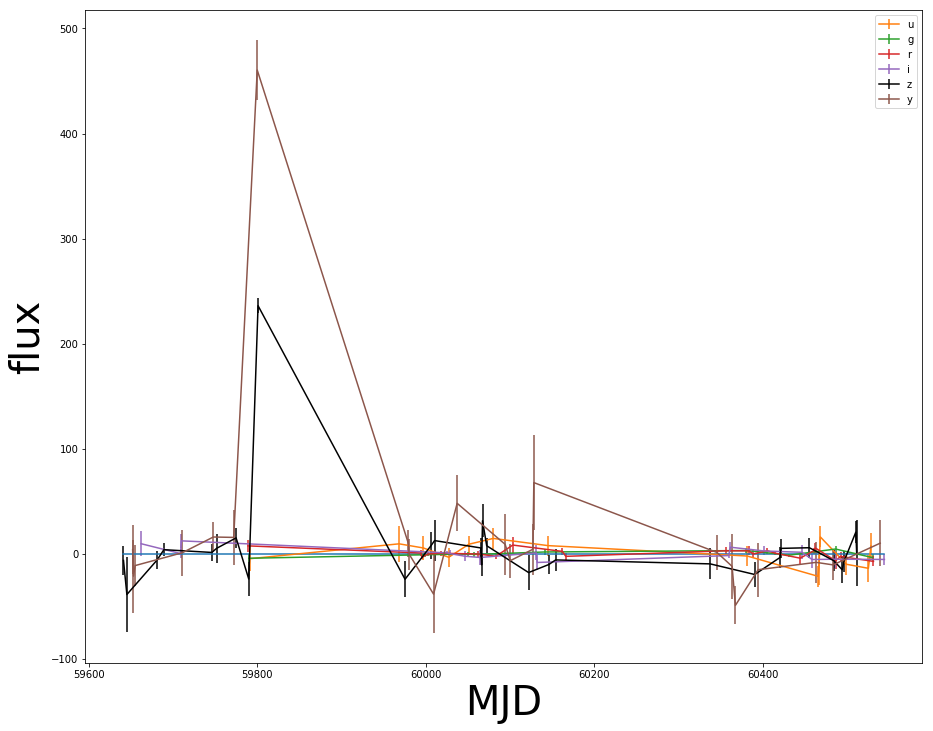

object_id
---------
 35630788
 35630788
 35630788
 35630788
 35630788
 35630788
 35630788
 35630788
 35630788
 35630788
      ...
 35630788
 35630788
 35630788
 35630788
 35630788
 35630788
 35630788
 35630788
 35630788
 35630788
 35630788
Length = 136 rows


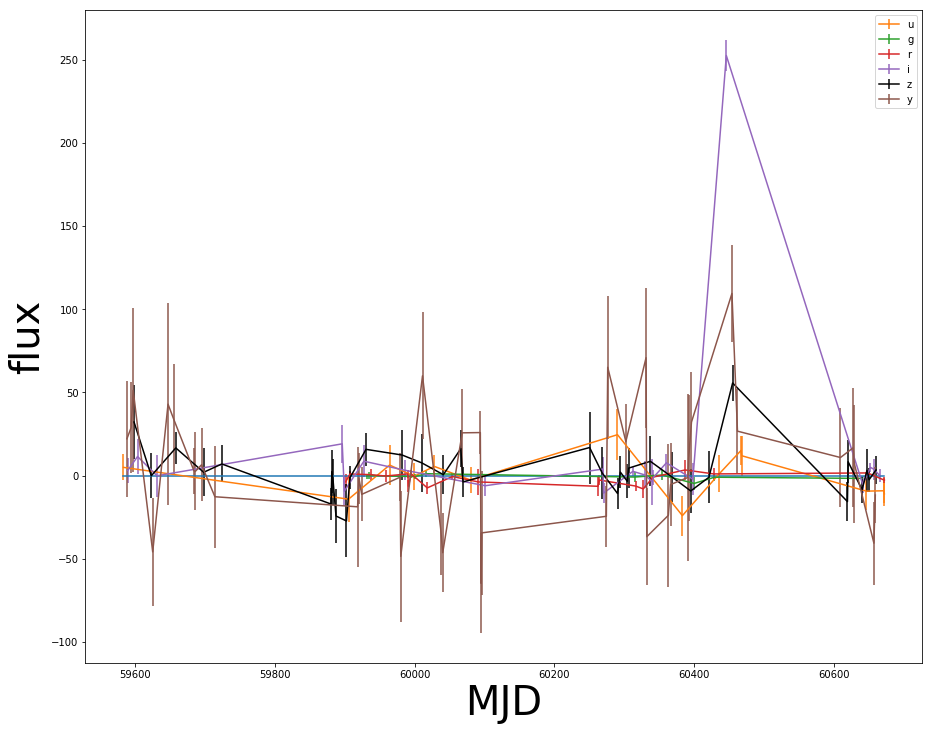

object_id
---------
 39745050
 39745050
 39745050
 39745050
 39745050
 39745050
 39745050
 39745050
 39745050
 39745050
      ...
 39745050
 39745050
 39745050
 39745050
 39745050
 39745050
 39745050
 39745050
 39745050
 39745050
 39745050
Length = 145 rows


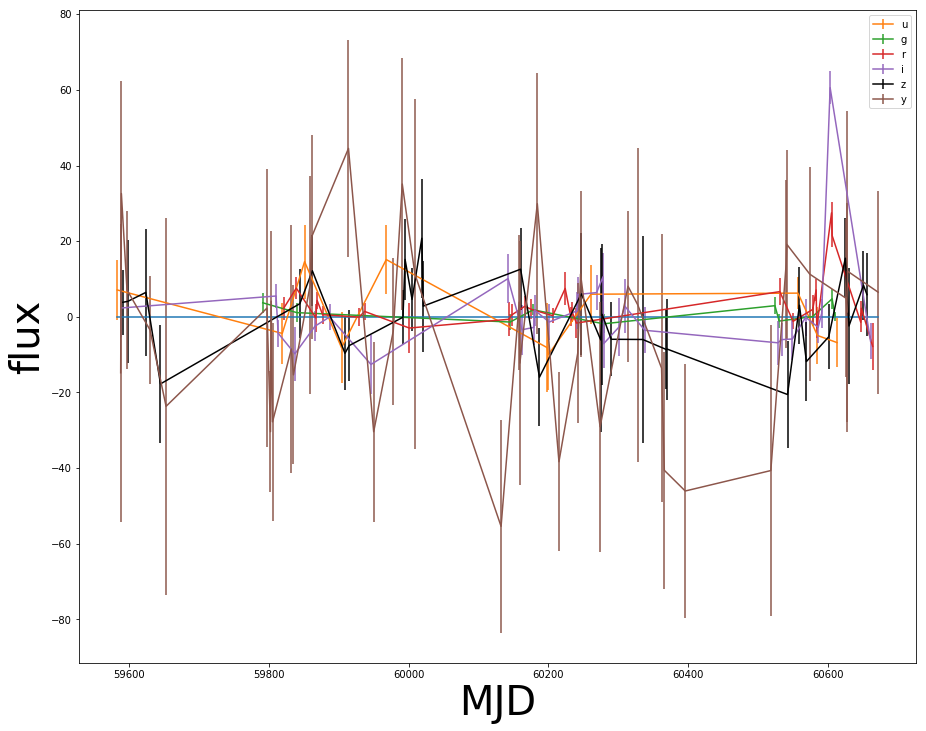

object_id
---------
 44564061
 44564061
 44564061
 44564061
 44564061
 44564061
 44564061
 44564061
 44564061
 44564061
      ...
 44564061
 44564061
 44564061
 44564061
 44564061
 44564061
 44564061
 44564061
 44564061
 44564061
 44564061
Length = 108 rows


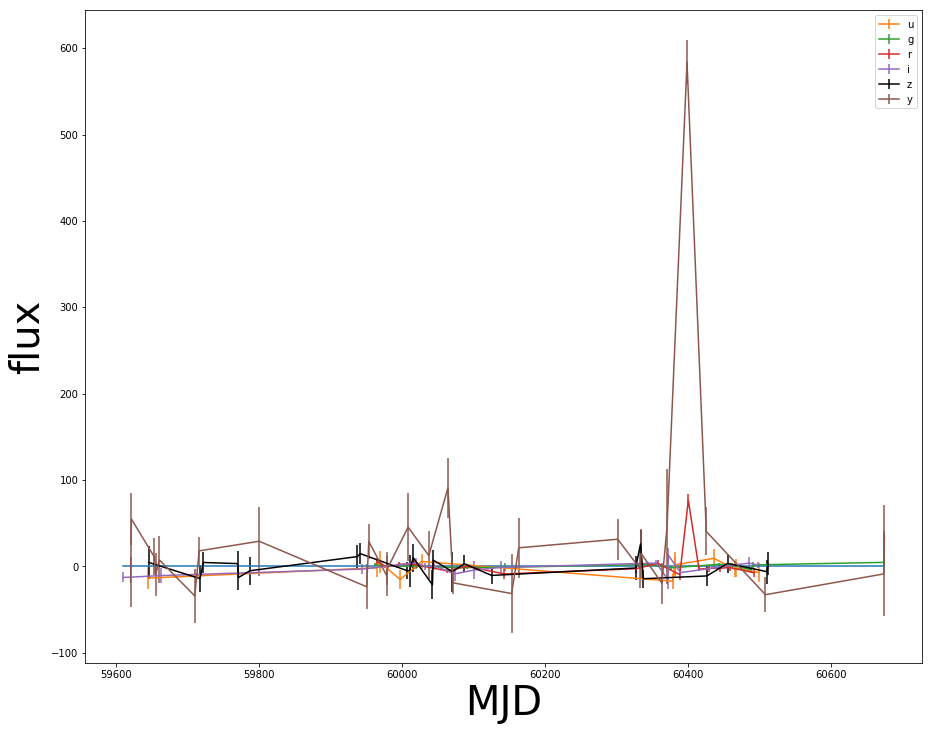

object_id
---------
 44864629
 44864629
 44864629
 44864629
 44864629
 44864629
 44864629
 44864629
 44864629
 44864629
      ...
 44864629
 44864629
 44864629
 44864629
 44864629
 44864629
 44864629
 44864629
 44864629
 44864629
 44864629
Length = 111 rows


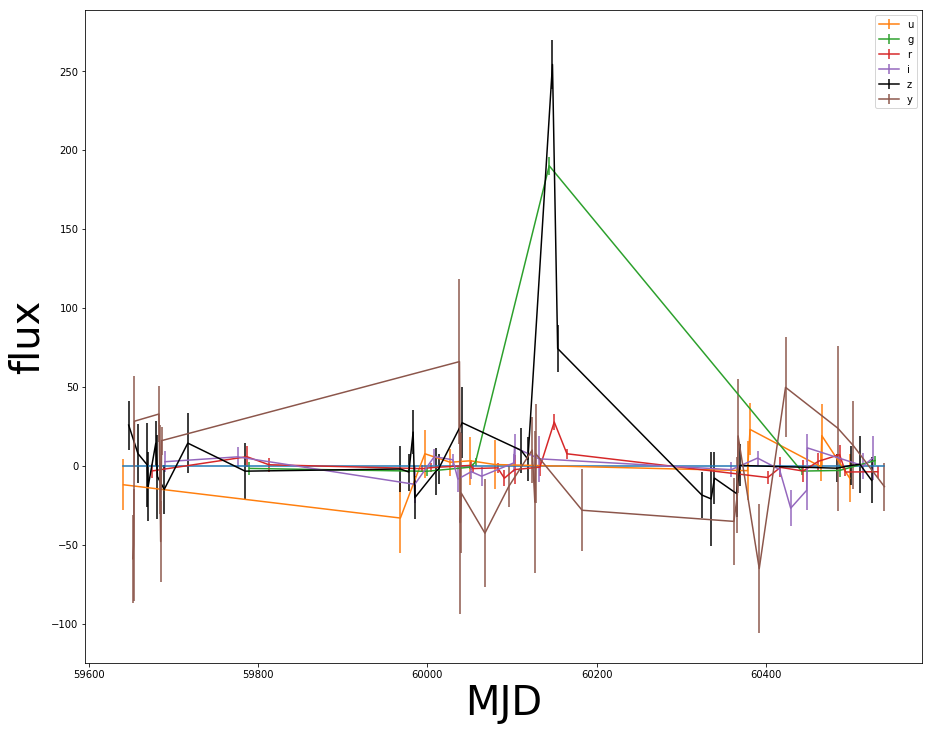

object_id
---------
 46213566
 46213566
 46213566
 46213566
 46213566
 46213566
 46213566
 46213566
 46213566
 46213566
      ...
 46213566
 46213566
 46213566
 46213566
 46213566
 46213566
 46213566
 46213566
 46213566
 46213566
 46213566
Length = 135 rows


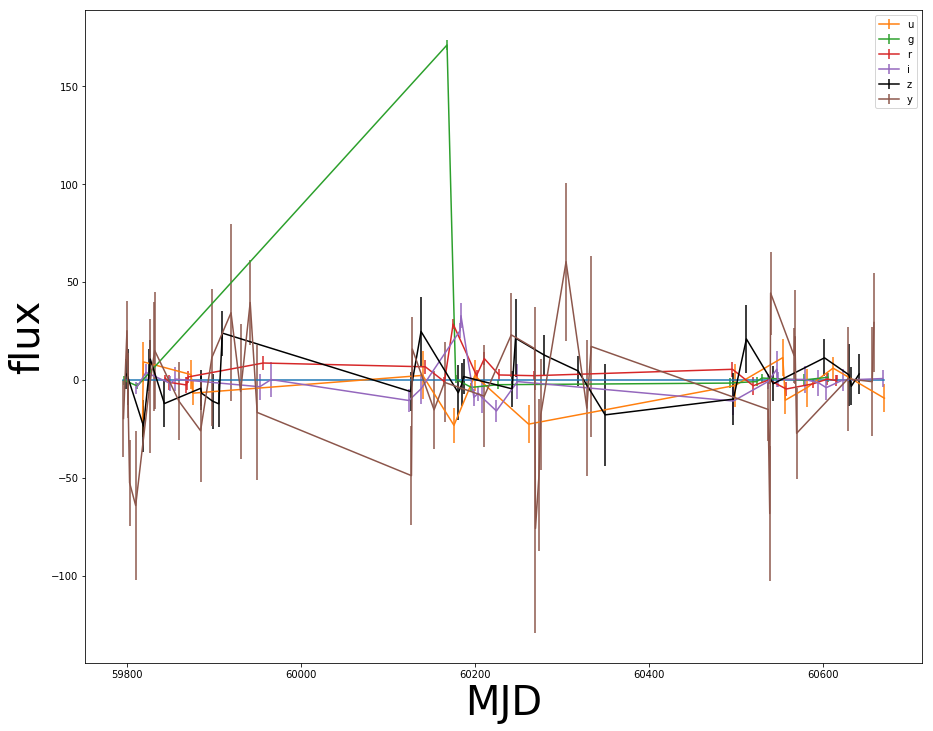

object_id
---------
 46489715
 46489715
 46489715
 46489715
 46489715
 46489715
 46489715
 46489715
 46489715
 46489715
      ...
 46489715
 46489715
 46489715
 46489715
 46489715
 46489715
 46489715
 46489715
 46489715
 46489715
 46489715
Length = 128 rows


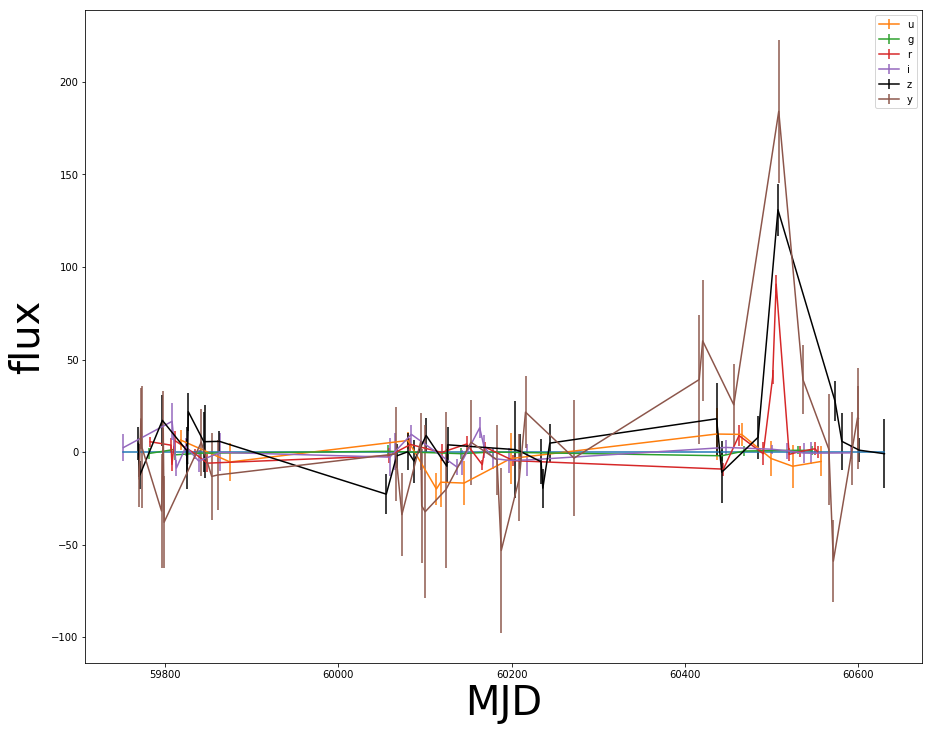

object_id
---------
 46553925
 46553925
 46553925
 46553925
 46553925
 46553925
 46553925
 46553925
 46553925
 46553925
      ...
 46553925
 46553925
 46553925
 46553925
 46553925
 46553925
 46553925
 46553925
 46553925
 46553925
 46553925
Length = 127 rows


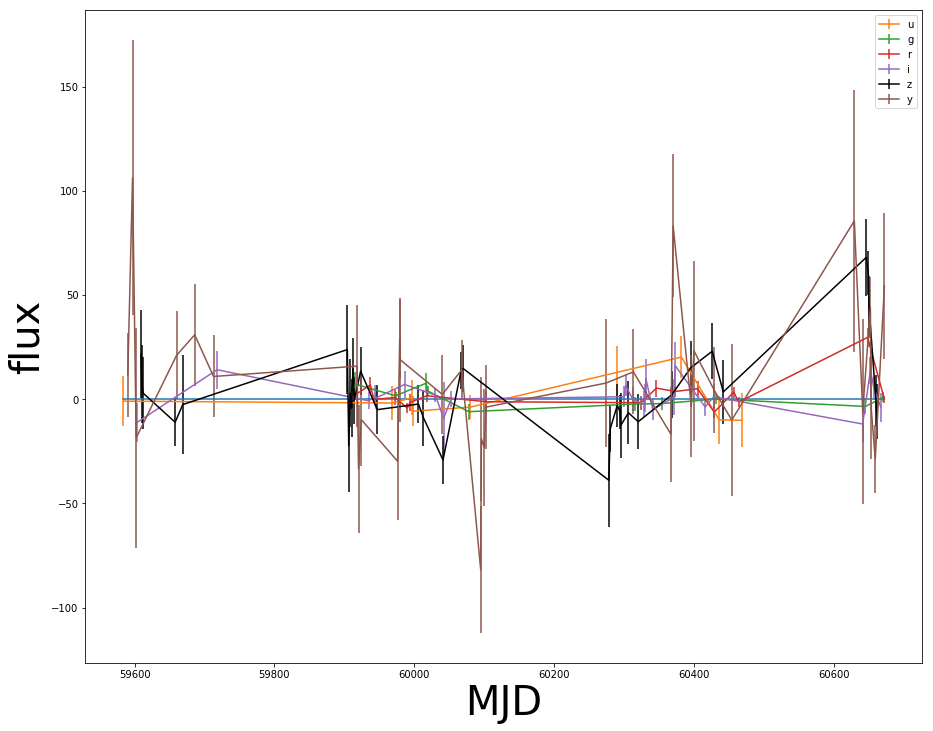

object_id
---------
 47142591
 47142591
 47142591
 47142591
 47142591
 47142591
 47142591
 47142591
 47142591
 47142591
      ...
 47142591
 47142591
 47142591
 47142591
 47142591
 47142591
 47142591
 47142591
 47142591
 47142591
 47142591
Length = 130 rows


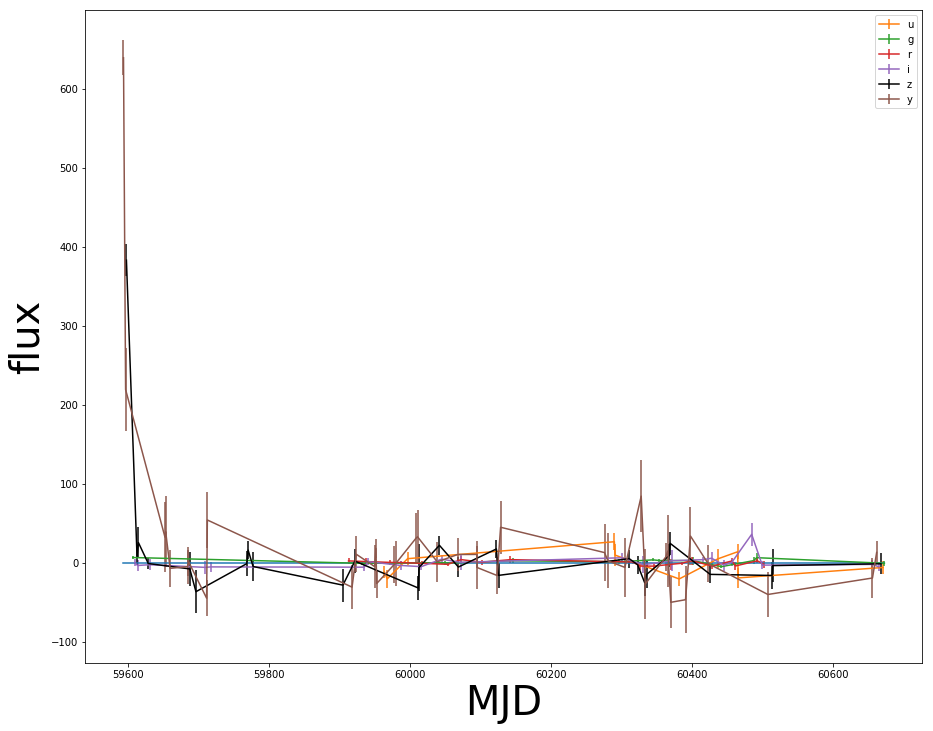

object_id
---------
 48098969
 48098969
 48098969
 48098969
 48098969
 48098969
 48098969
 48098969
 48098969
 48098969
      ...
 48098969
 48098969
 48098969
 48098969
 48098969
 48098969
 48098969
 48098969
 48098969
 48098969
 48098969
Length = 124 rows


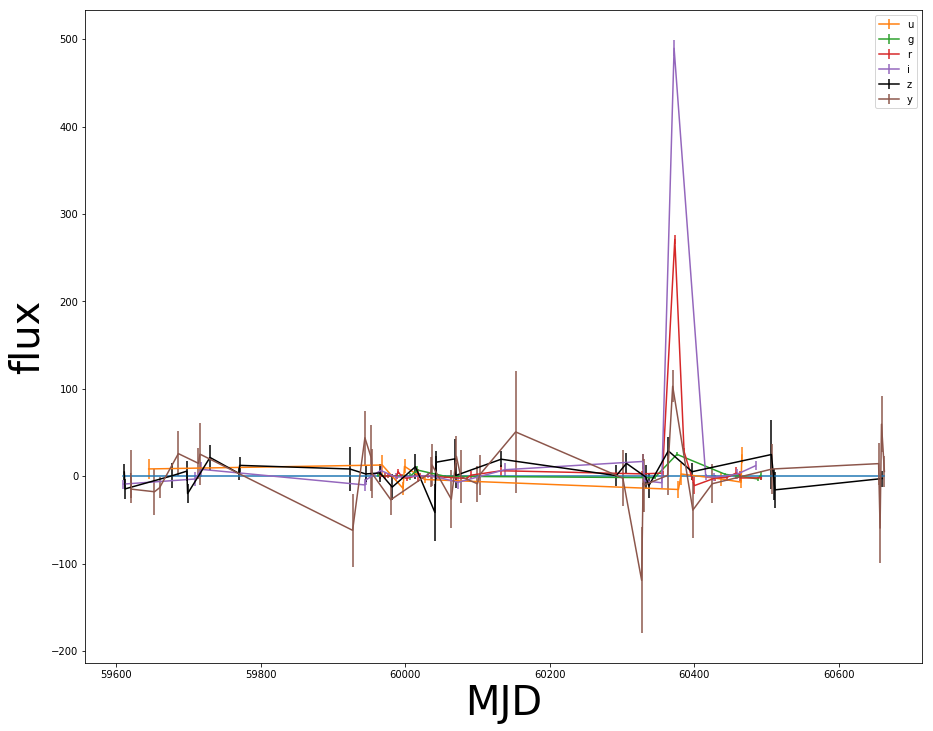

object_id
---------
 49519074
 49519074
 49519074
 49519074
 49519074
 49519074
 49519074
 49519074
 49519074
 49519074
      ...
 49519074
 49519074
 49519074
 49519074
 49519074
 49519074
 49519074
 49519074
 49519074
 49519074
 49519074
Length = 133 rows


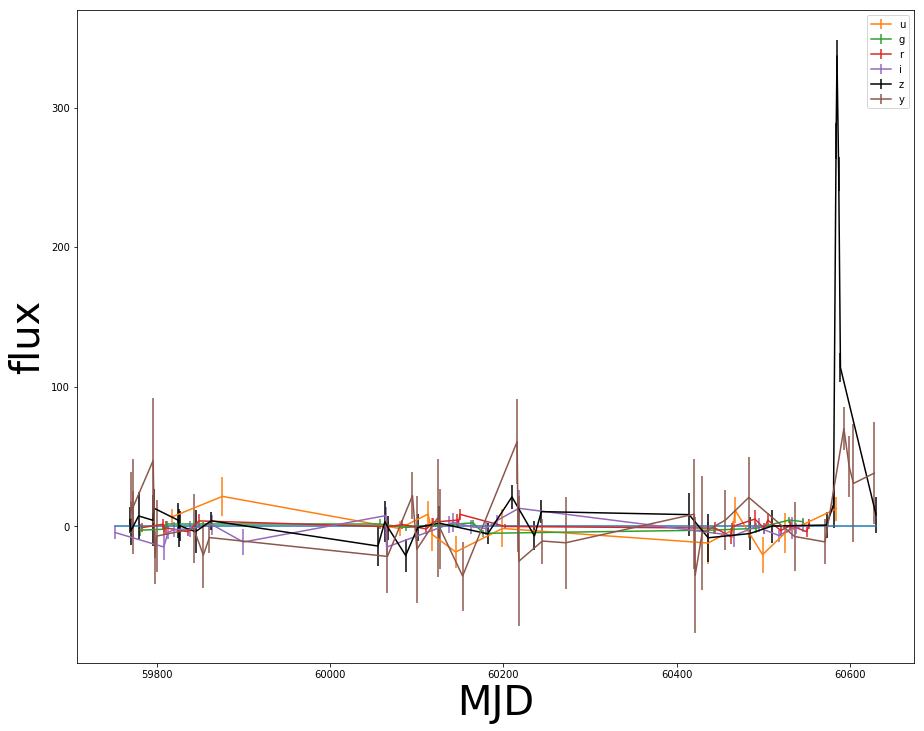

object_id
---------
 49850869
 49850869
 49850869
 49850869
 49850869
 49850869
 49850869
 49850869
 49850869
 49850869
      ...
 49850869
 49850869
 49850869
 49850869
 49850869
 49850869
 49850869
 49850869
 49850869
 49850869
 49850869
Length = 114 rows


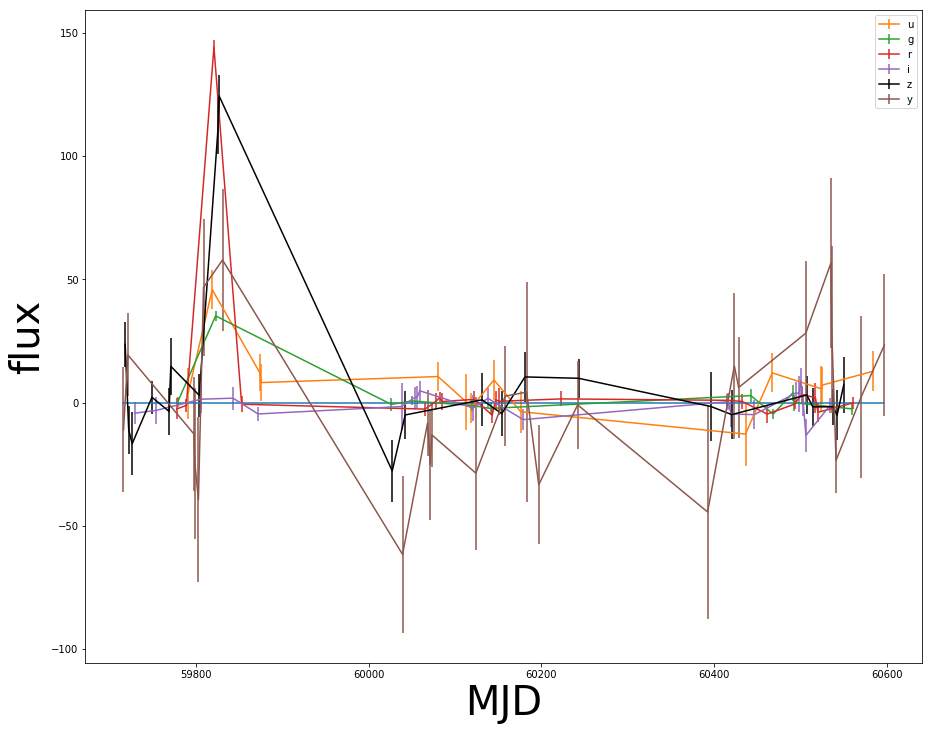

object_id
---------
 50120780
 50120780
 50120780
 50120780
 50120780
 50120780
 50120780
 50120780
 50120780
 50120780
      ...
 50120780
 50120780
 50120780
 50120780
 50120780
 50120780
 50120780
 50120780
 50120780
 50120780
 50120780
Length = 121 rows


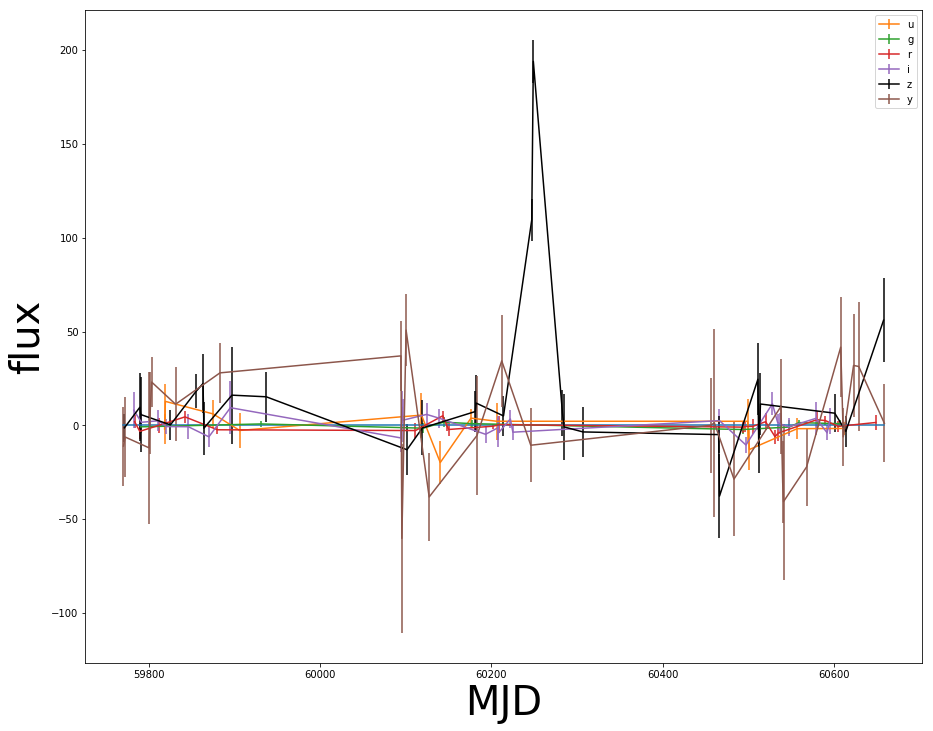

object_id
---------
 51527253
 51527253
 51527253
 51527253
 51527253
 51527253
 51527253
 51527253
 51527253
 51527253
      ...
 51527253
 51527253
 51527253
 51527253
 51527253
 51527253
 51527253
 51527253
 51527253
 51527253
 51527253
Length = 100 rows


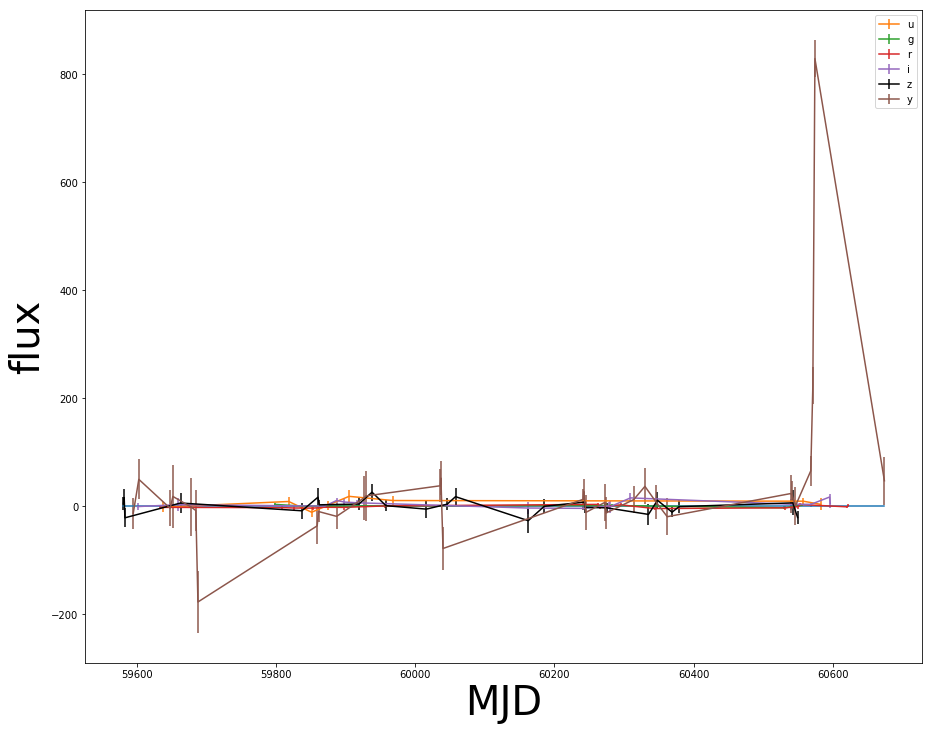

object_id
---------
 54000531
 54000531
 54000531
 54000531
 54000531
 54000531
 54000531
 54000531
 54000531
 54000531
      ...
 54000531
 54000531
 54000531
 54000531
 54000531
 54000531
 54000531
 54000531
 54000531
 54000531
 54000531
Length = 127 rows


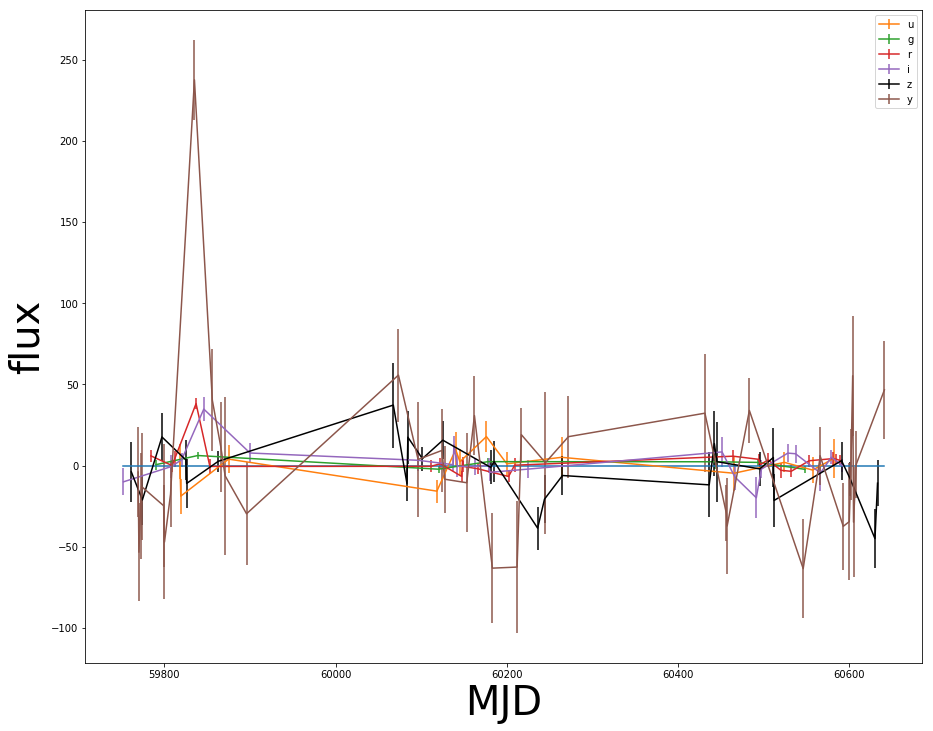

object_id
---------
 56942944
 56942944
 56942944
 56942944
 56942944
 56942944
 56942944
 56942944
 56942944
 56942944
      ...
 56942944
 56942944
 56942944
 56942944
 56942944
 56942944
 56942944
 56942944
 56942944
 56942944
 56942944
Length = 114 rows


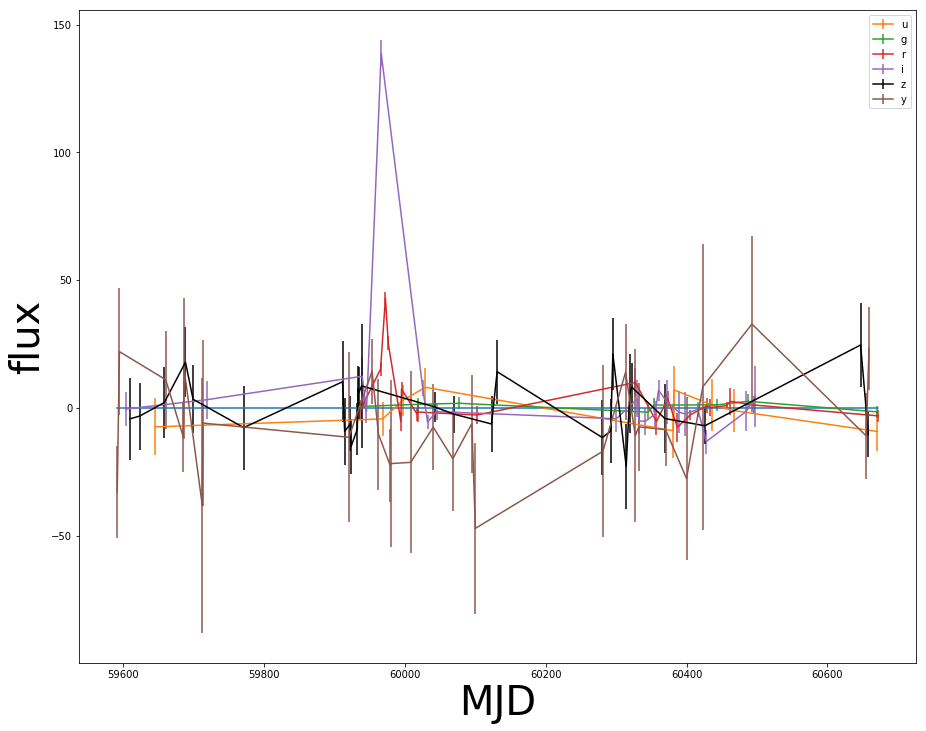

object_id
---------
 59364010
 59364010
 59364010
 59364010
 59364010
 59364010
 59364010
 59364010
 59364010
 59364010
      ...
 59364010
 59364010
 59364010
 59364010
 59364010
 59364010
 59364010
 59364010
 59364010
 59364010
 59364010
Length = 113 rows


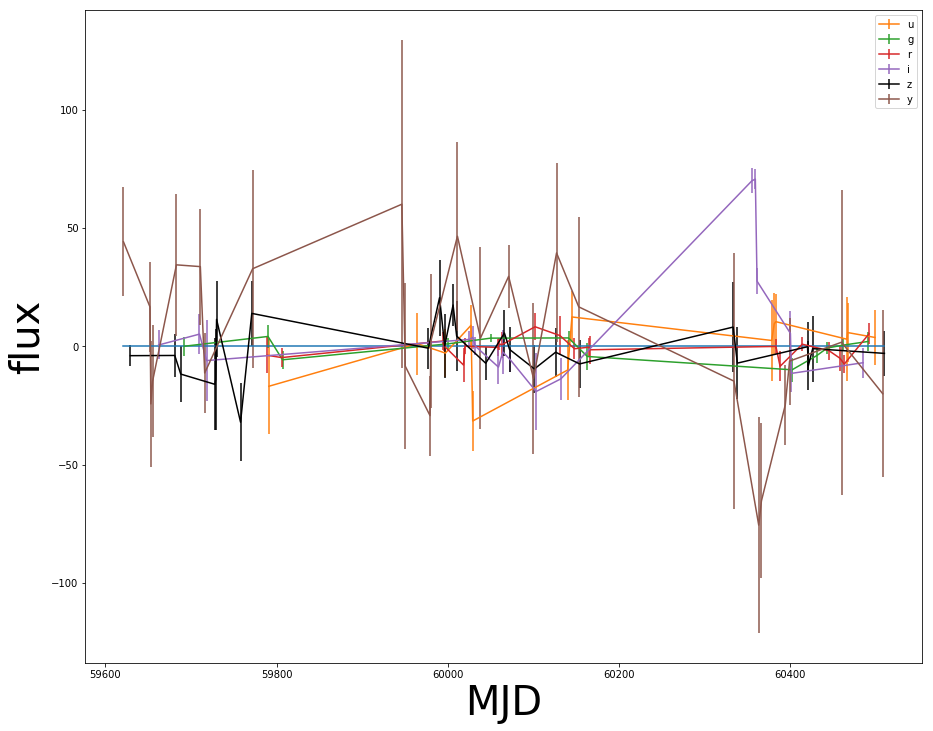

object_id
---------
 59464880
 59464880
 59464880
 59464880
 59464880
 59464880
 59464880
 59464880
 59464880
 59464880
      ...
 59464880
 59464880
 59464880
 59464880
 59464880
 59464880
 59464880
 59464880
 59464880
 59464880
 59464880
Length = 128 rows


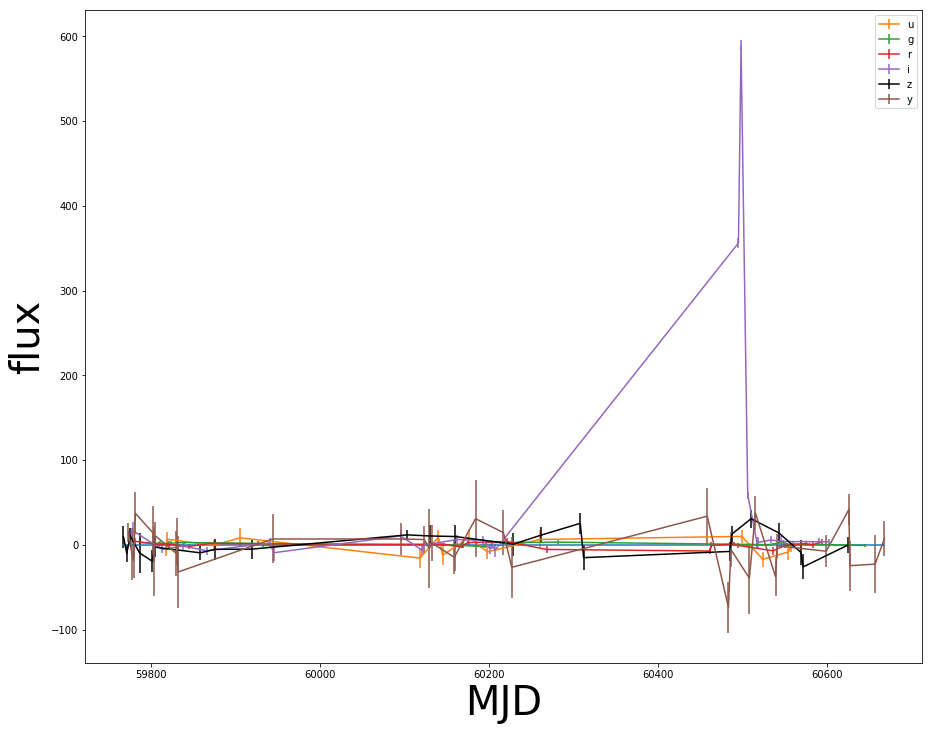

object_id
---------
 59698197
 59698197
 59698197
 59698197
 59698197
 59698197
 59698197
 59698197
 59698197
 59698197
      ...
 59698197
 59698197
 59698197
 59698197
 59698197
 59698197
 59698197
 59698197
 59698197
 59698197
 59698197
Length = 127 rows


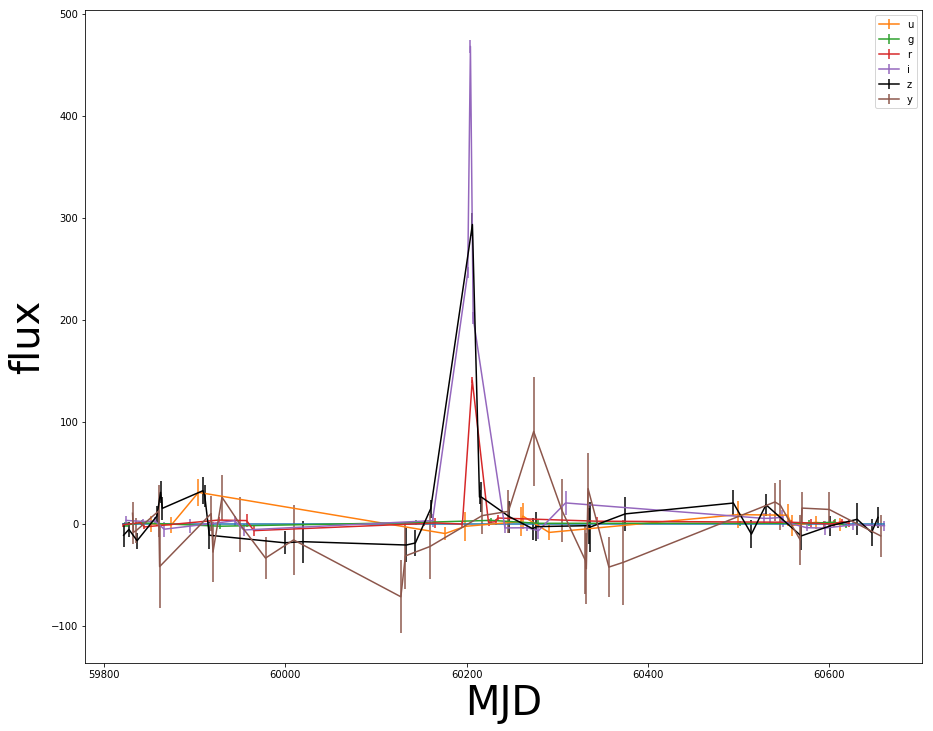

object_id
---------
 61543226
 61543226
 61543226
 61543226
 61543226
 61543226
 61543226
 61543226
 61543226
 61543226
      ...
 61543226
 61543226
 61543226
 61543226
 61543226
 61543226
 61543226
 61543226
 61543226
 61543226
 61543226
Length = 124 rows


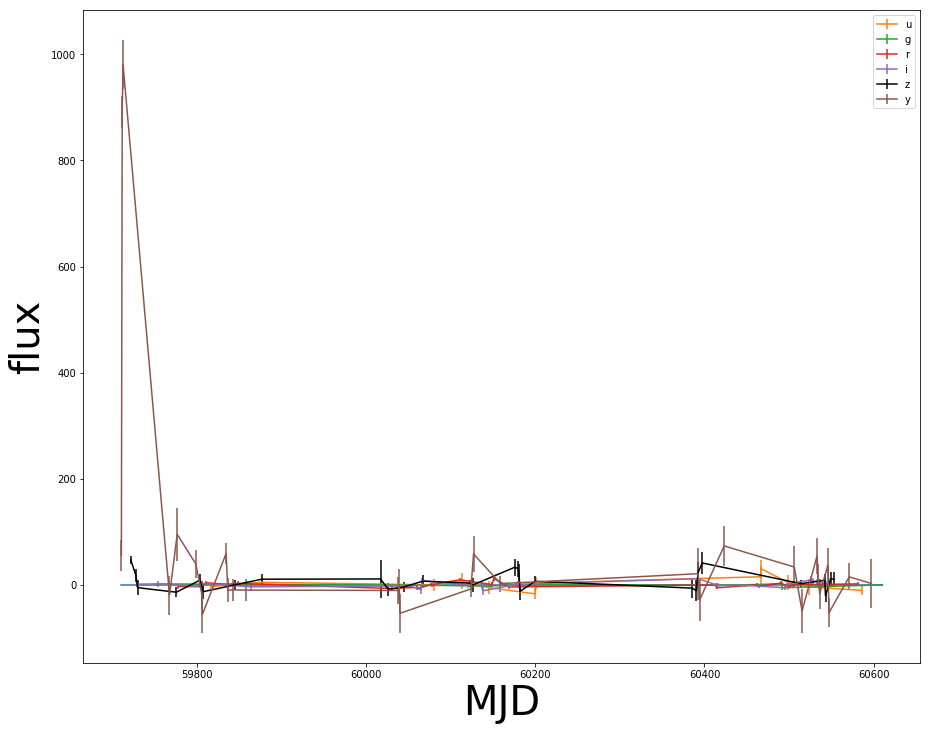

object_id
---------
 61688145
 61688145
 61688145
 61688145
 61688145
 61688145
 61688145
 61688145
 61688145
 61688145
      ...
 61688145
 61688145
 61688145
 61688145
 61688145
 61688145
 61688145
 61688145
 61688145
 61688145
 61688145
Length = 125 rows


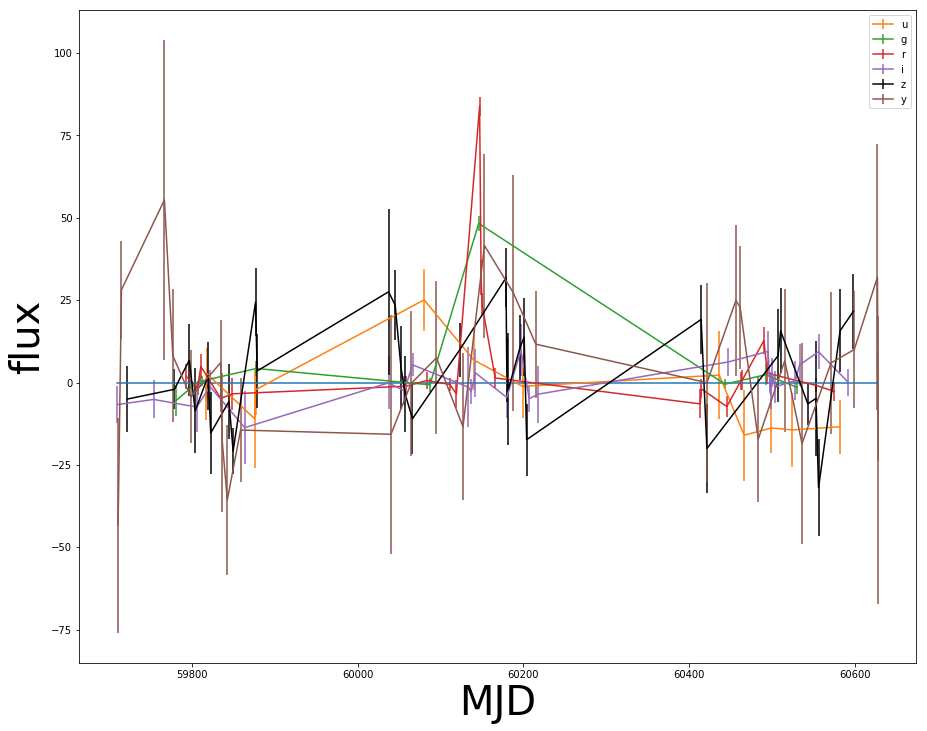

object_id
---------
 66740787
 66740787
 66740787
 66740787
 66740787
 66740787
 66740787
 66740787
 66740787
 66740787
      ...
 66740787
 66740787
 66740787
 66740787
 66740787
 66740787
 66740787
 66740787
 66740787
 66740787
 66740787
Length = 107 rows


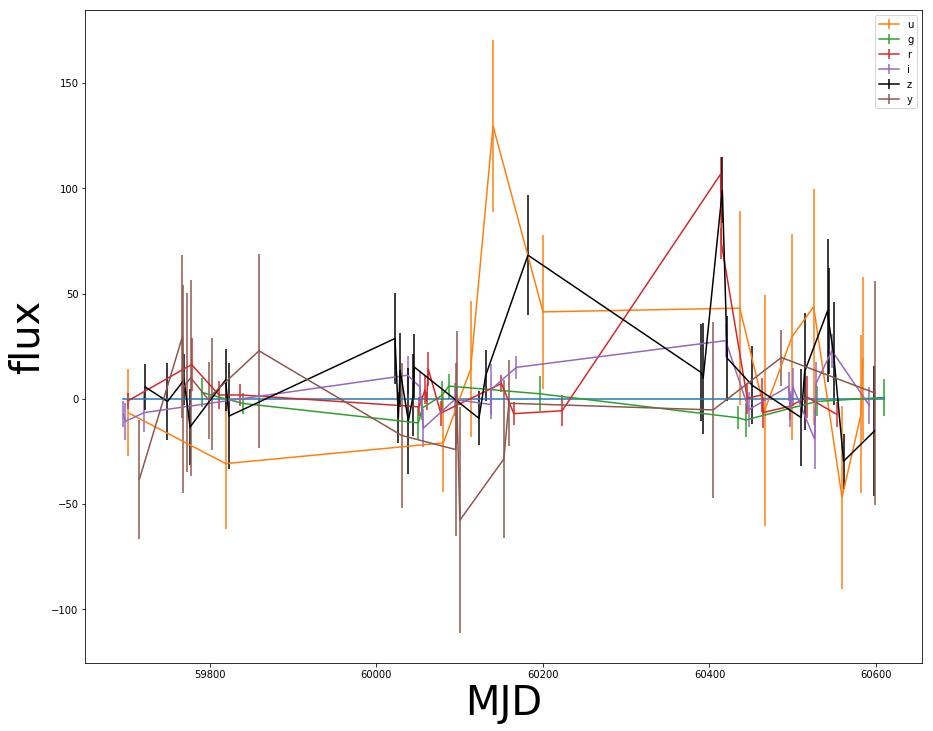

object_id
---------
 67195030
 67195030
 67195030
 67195030
 67195030
 67195030
 67195030
 67195030
 67195030
 67195030
      ...
 67195030
 67195030
 67195030
 67195030
 67195030
 67195030
 67195030
 67195030
 67195030
 67195030
 67195030
Length = 123 rows


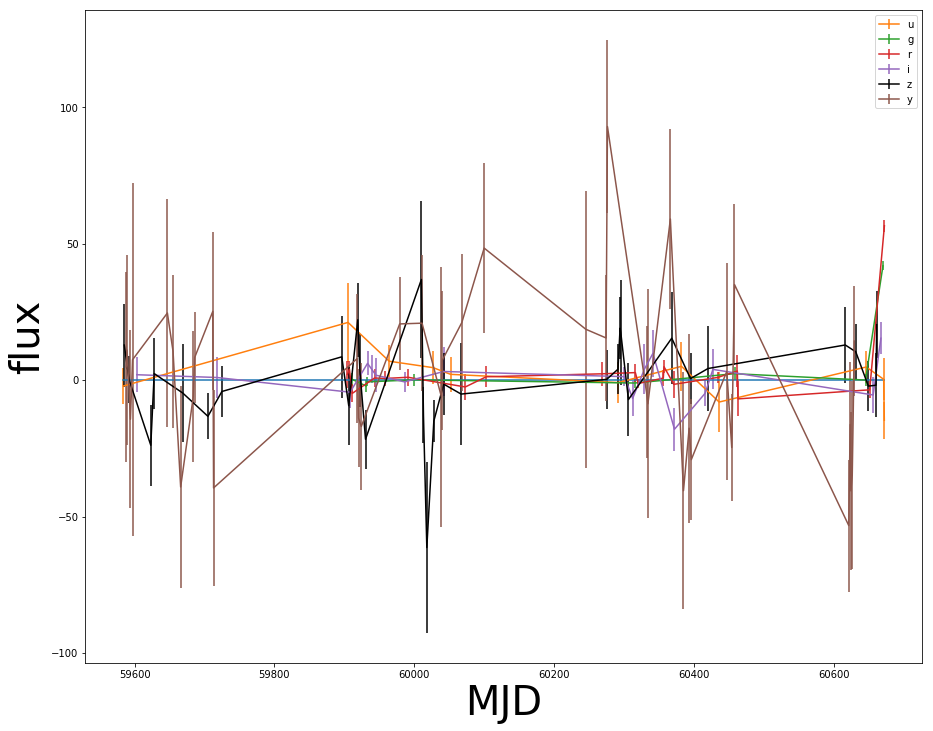

object_id
---------
 67600070
 67600070
 67600070
 67600070
 67600070
 67600070
 67600070
 67600070
 67600070
 67600070
      ...
 67600070
 67600070
 67600070
 67600070
 67600070
 67600070
 67600070
 67600070
 67600070
 67600070
 67600070
Length = 148 rows


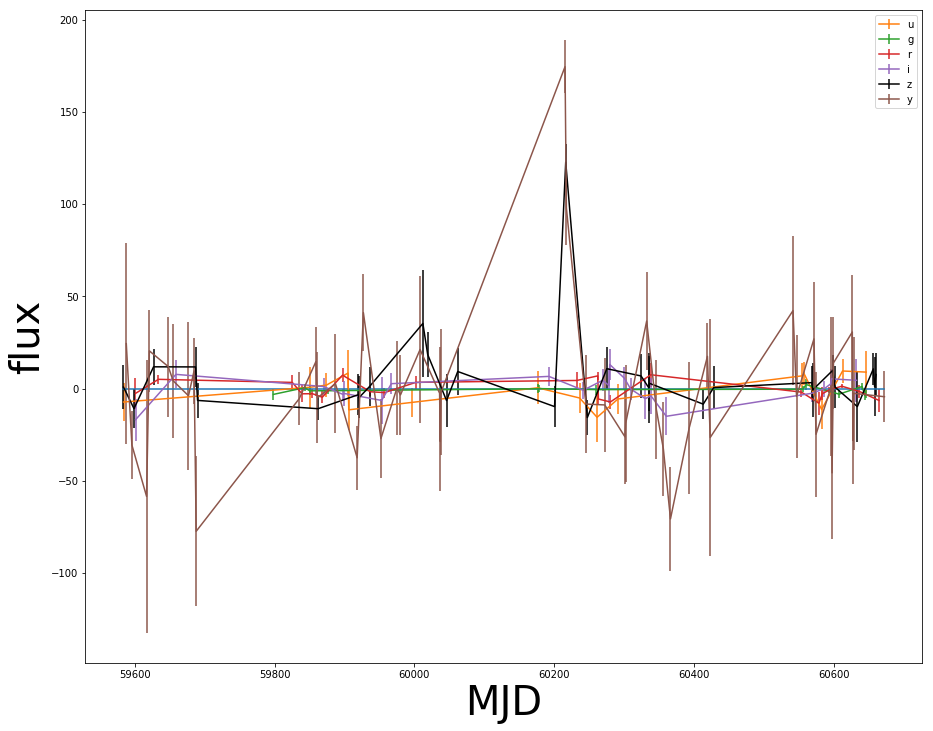

object_id
---------
 70425954
 70425954
 70425954
 70425954
 70425954
 70425954
 70425954
 70425954
 70425954
 70425954
      ...
 70425954
 70425954
 70425954
 70425954
 70425954
 70425954
 70425954
 70425954
 70425954
 70425954
 70425954
Length = 123 rows


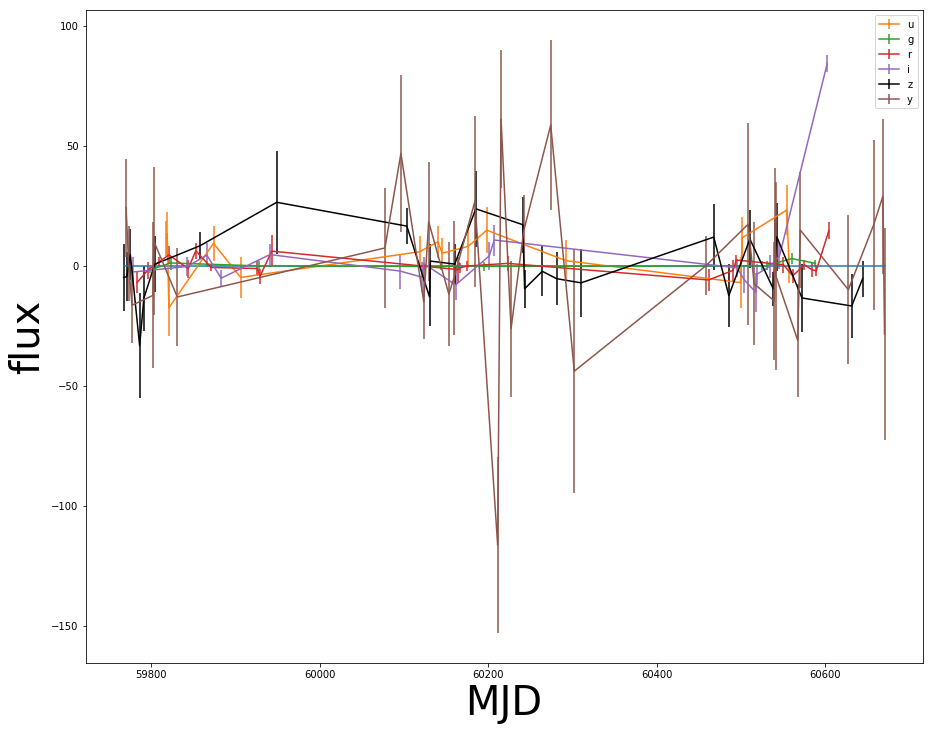

object_id
---------
 74492858
 74492858
 74492858
 74492858
 74492858
 74492858
 74492858
 74492858
 74492858
 74492858
      ...
 74492858
 74492858
 74492858
 74492858
 74492858
 74492858
 74492858
 74492858
 74492858
 74492858
 74492858
Length = 135 rows


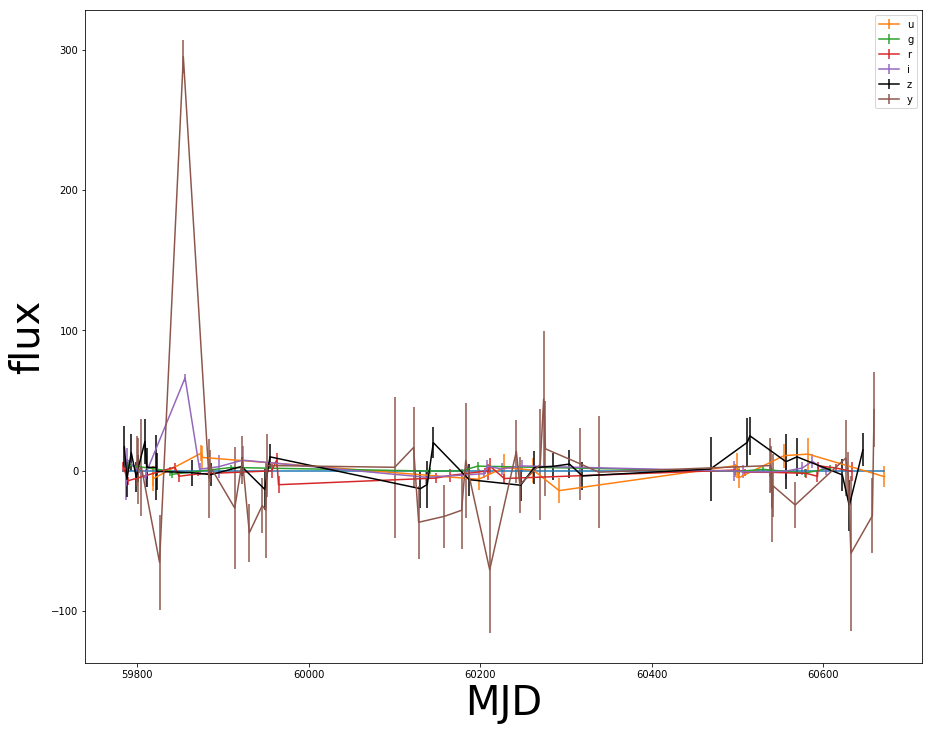

object_id
---------
 74512775
 74512775
 74512775
 74512775
 74512775
 74512775
 74512775
 74512775
 74512775
 74512775
      ...
 74512775
 74512775
 74512775
 74512775
 74512775
 74512775
 74512775
 74512775
 74512775
 74512775
 74512775
Length = 123 rows


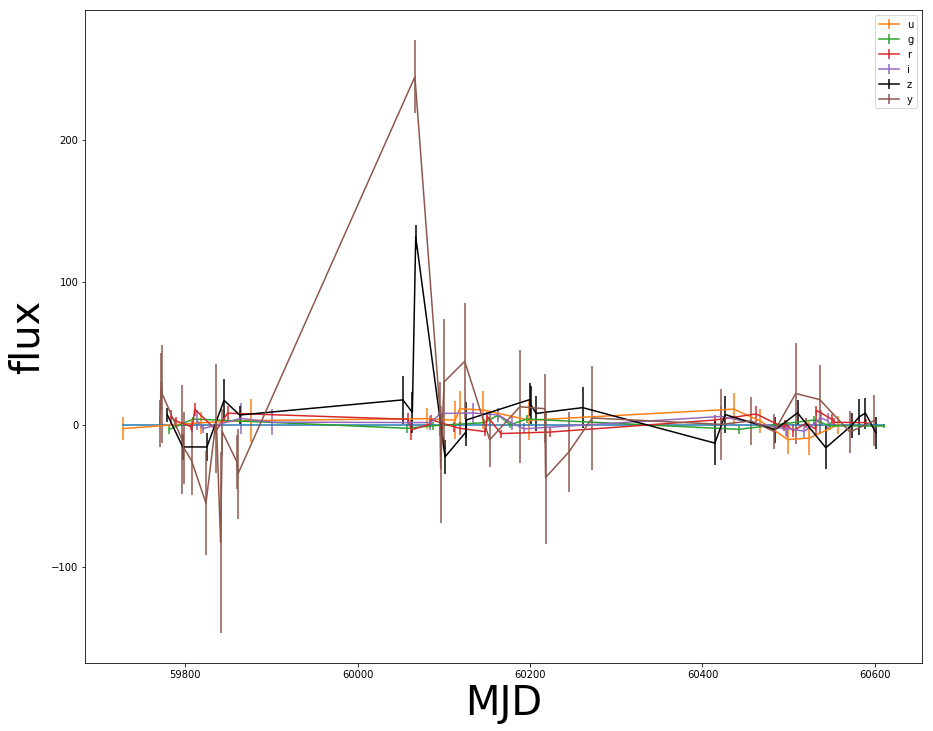

object_id
---------
 74943698
 74943698
 74943698
 74943698
 74943698
 74943698
 74943698
 74943698
 74943698
 74943698
      ...
 74943698
 74943698
 74943698
 74943698
 74943698
 74943698
 74943698
 74943698
 74943698
 74943698
 74943698
Length = 115 rows


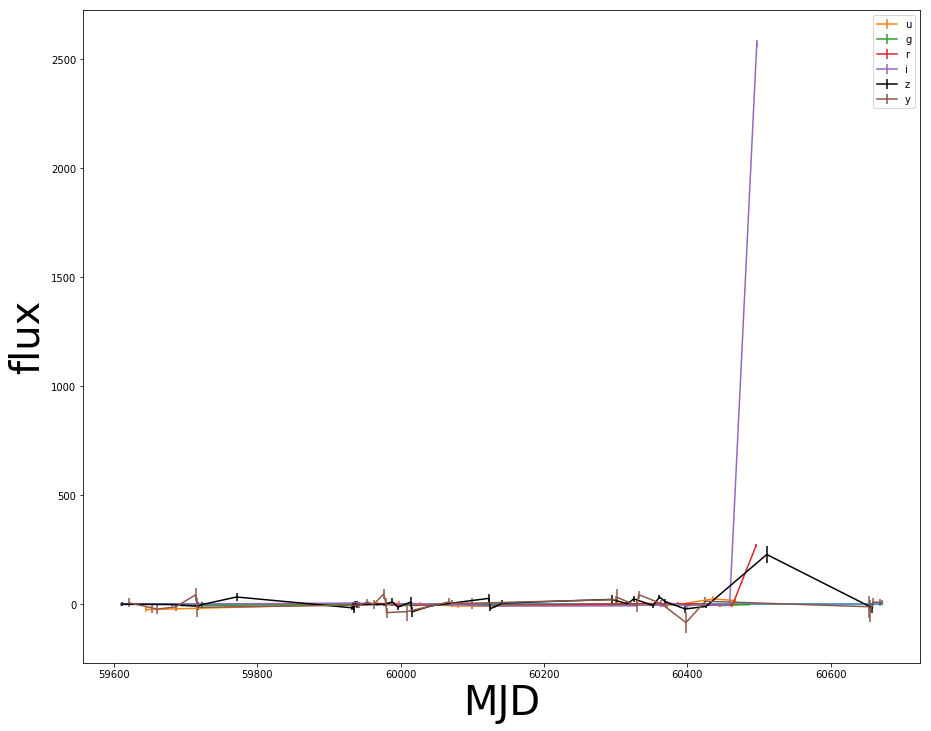

object_id
---------
 75080064
 75080064
 75080064
 75080064
 75080064
 75080064
 75080064
 75080064
 75080064
 75080064
      ...
 75080064
 75080064
 75080064
 75080064
 75080064
 75080064
 75080064
 75080064
 75080064
 75080064
 75080064
Length = 141 rows


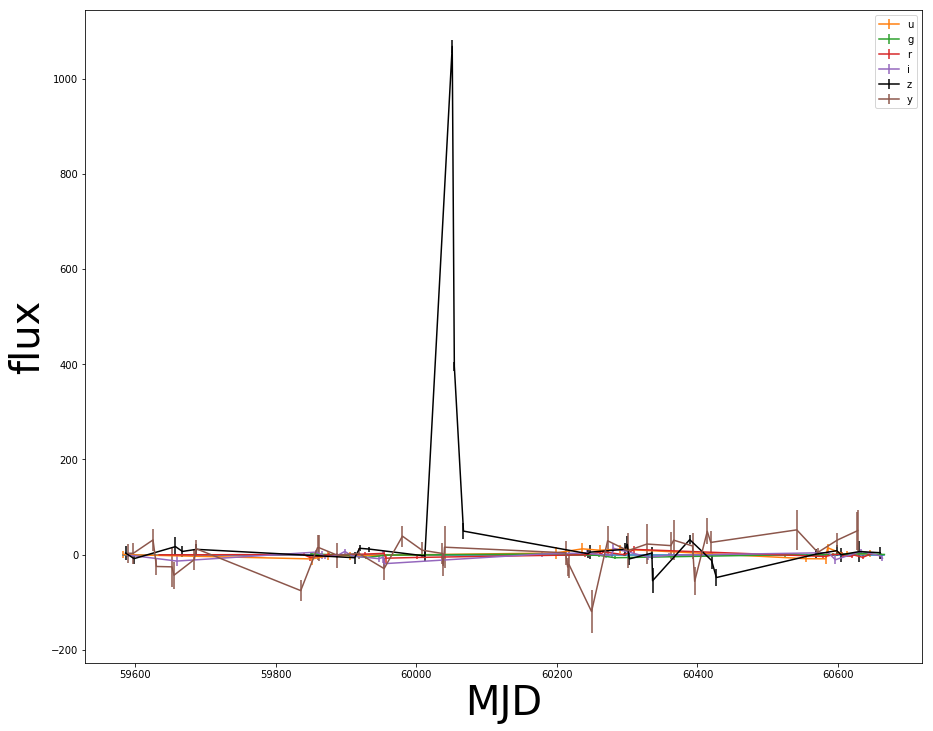

object_id
---------
 75218022
 75218022
 75218022
 75218022
 75218022
 75218022
 75218022
 75218022
 75218022
 75218022
      ...
 75218022
 75218022
 75218022
 75218022
 75218022
 75218022
 75218022
 75218022
 75218022
 75218022
 75218022
Length = 111 rows


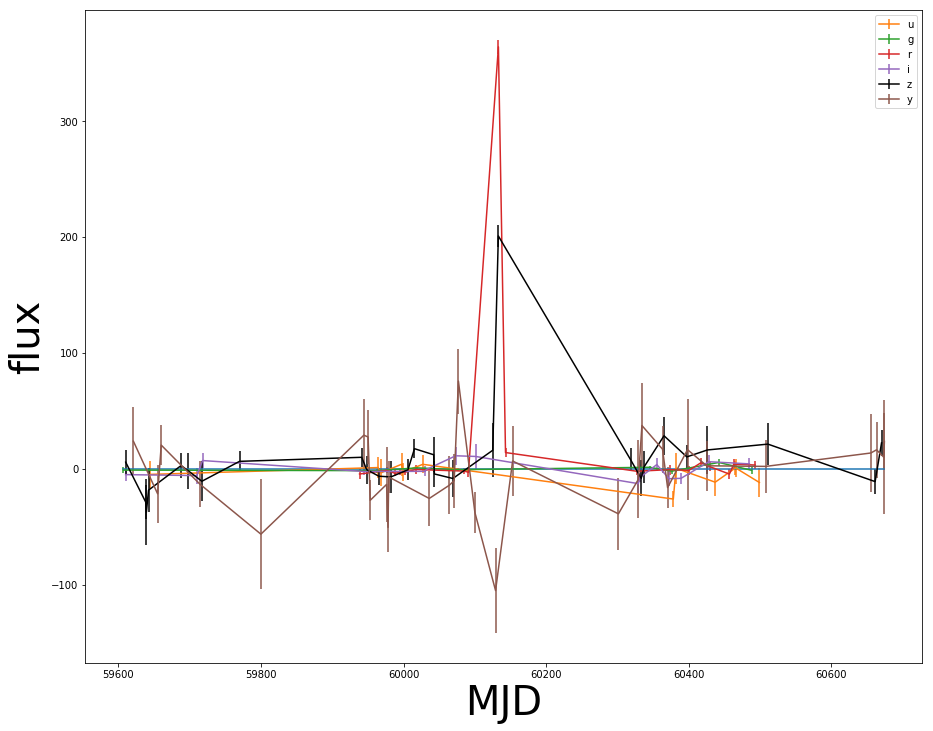

object_id
---------
 76457103
 76457103
 76457103
 76457103
 76457103
 76457103
 76457103
 76457103
 76457103
 76457103
      ...
 76457103
 76457103
 76457103
 76457103
 76457103
 76457103
 76457103
 76457103
 76457103
 76457103
 76457103
Length = 120 rows


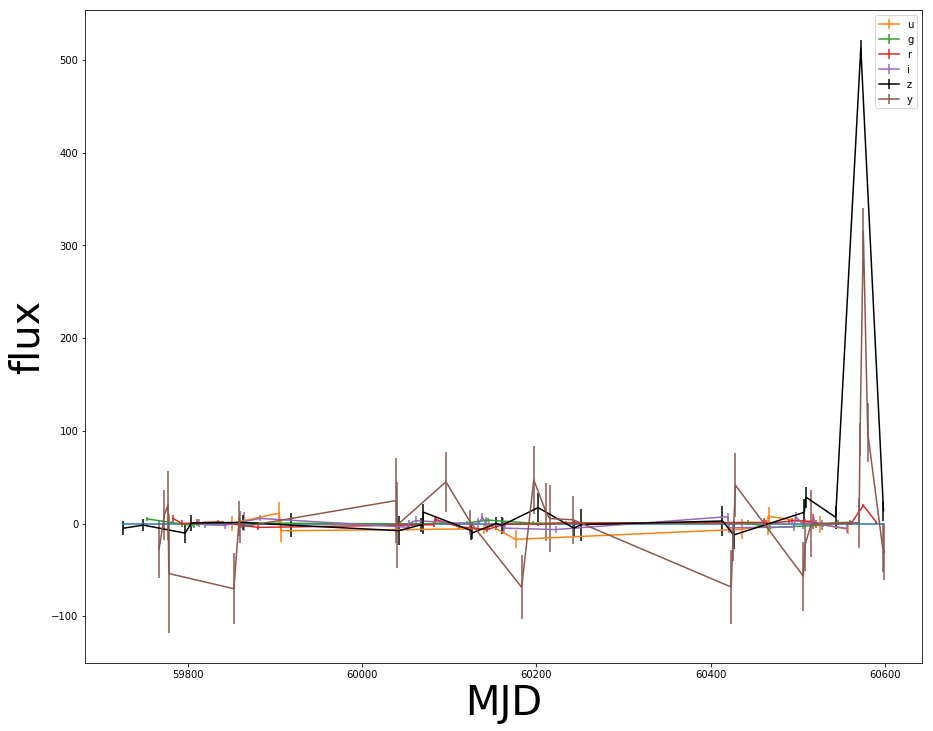

object_id
---------
 80913604
 80913604
 80913604
 80913604
 80913604
 80913604
 80913604
 80913604
 80913604
 80913604
      ...
 80913604
 80913604
 80913604
 80913604
 80913604
 80913604
 80913604
 80913604
 80913604
 80913604
 80913604
Length = 106 rows


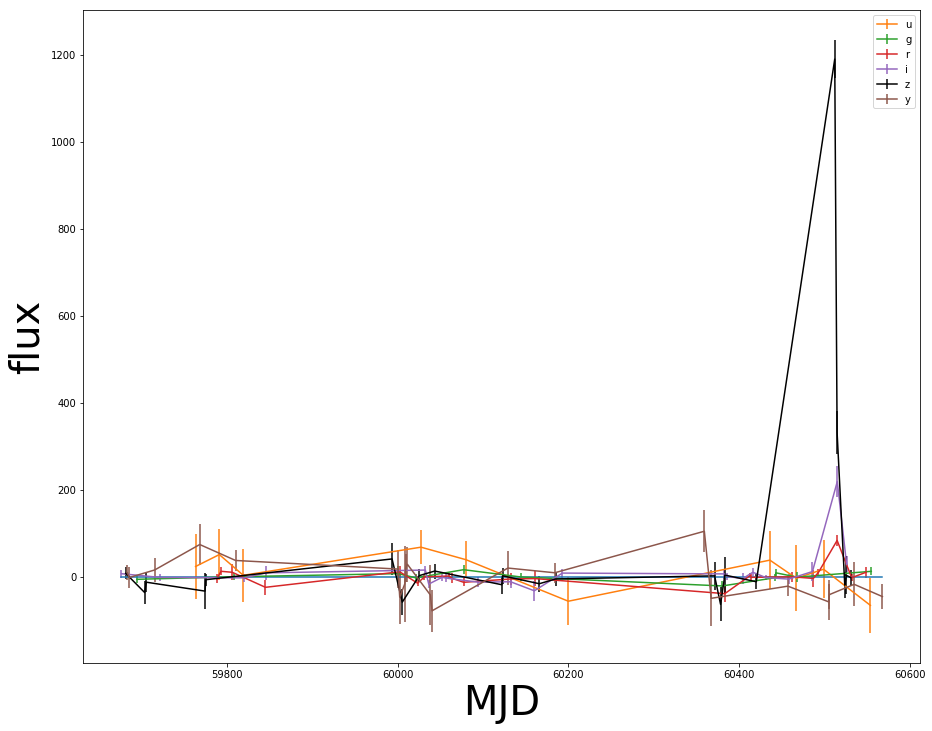

object_id
---------
 81456459
 81456459
 81456459
 81456459
 81456459
 81456459
 81456459
 81456459
 81456459
 81456459
      ...
 81456459
 81456459
 81456459
 81456459
 81456459
 81456459
 81456459
 81456459
 81456459
 81456459
 81456459
Length = 119 rows


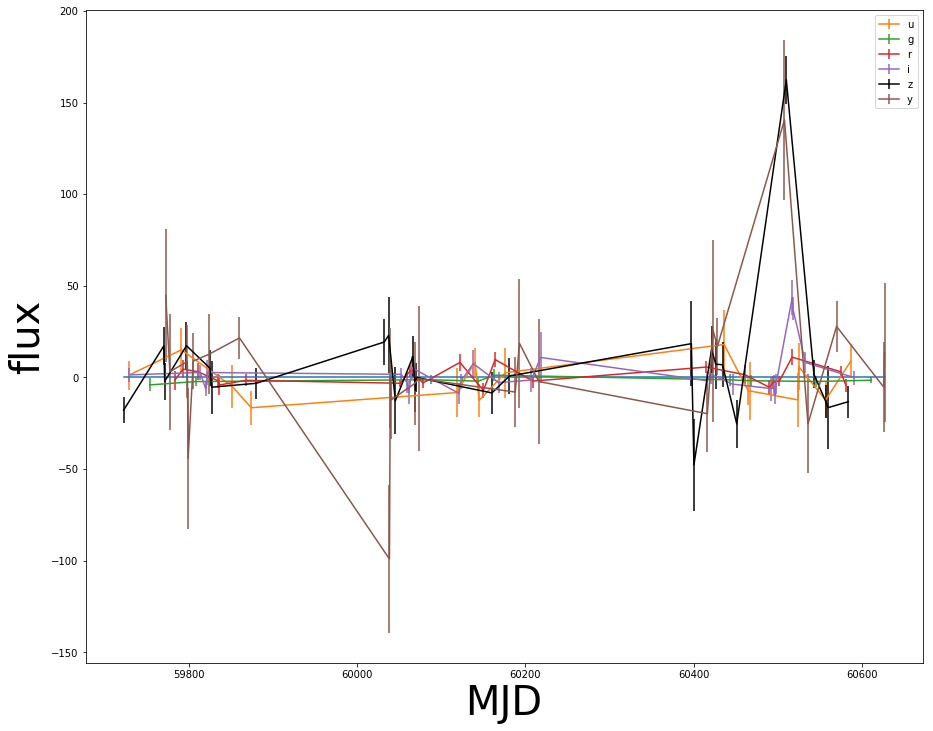

object_id
---------
 84706583
 84706583
 84706583
 84706583
 84706583
 84706583
 84706583
 84706583
 84706583
 84706583
      ...
 84706583
 84706583
 84706583
 84706583
 84706583
 84706583
 84706583
 84706583
 84706583
 84706583
 84706583
Length = 112 rows


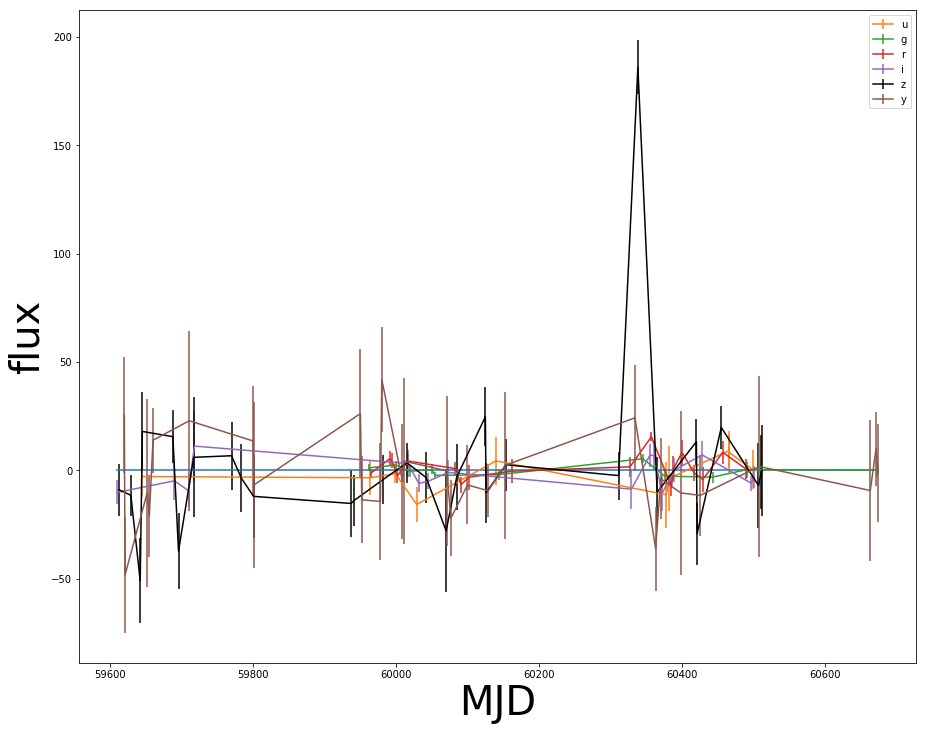

object_id
---------
 85030920
 85030920
 85030920
 85030920
 85030920
 85030920
 85030920
 85030920
 85030920
 85030920
      ...
 85030920
 85030920
 85030920
 85030920
 85030920
 85030920
 85030920
 85030920
 85030920
 85030920
 85030920
Length = 148 rows


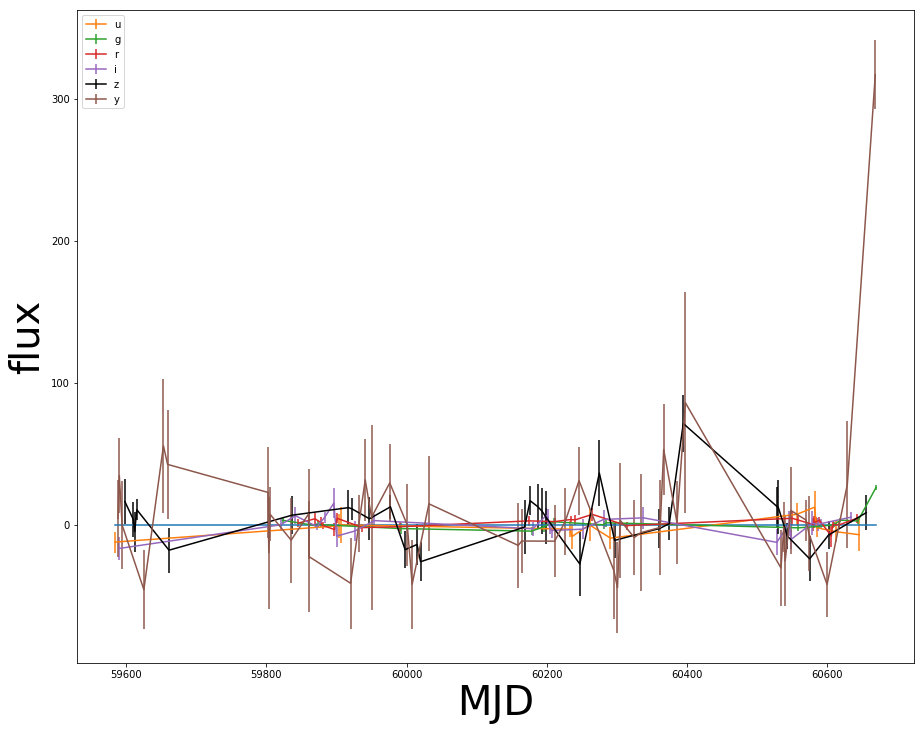

object_id
---------
 86490974
 86490974
 86490974
 86490974
 86490974
 86490974
 86490974
 86490974
 86490974
 86490974
      ...
 86490974
 86490974
 86490974
 86490974
 86490974
 86490974
 86490974
 86490974
 86490974
 86490974
 86490974
Length = 147 rows


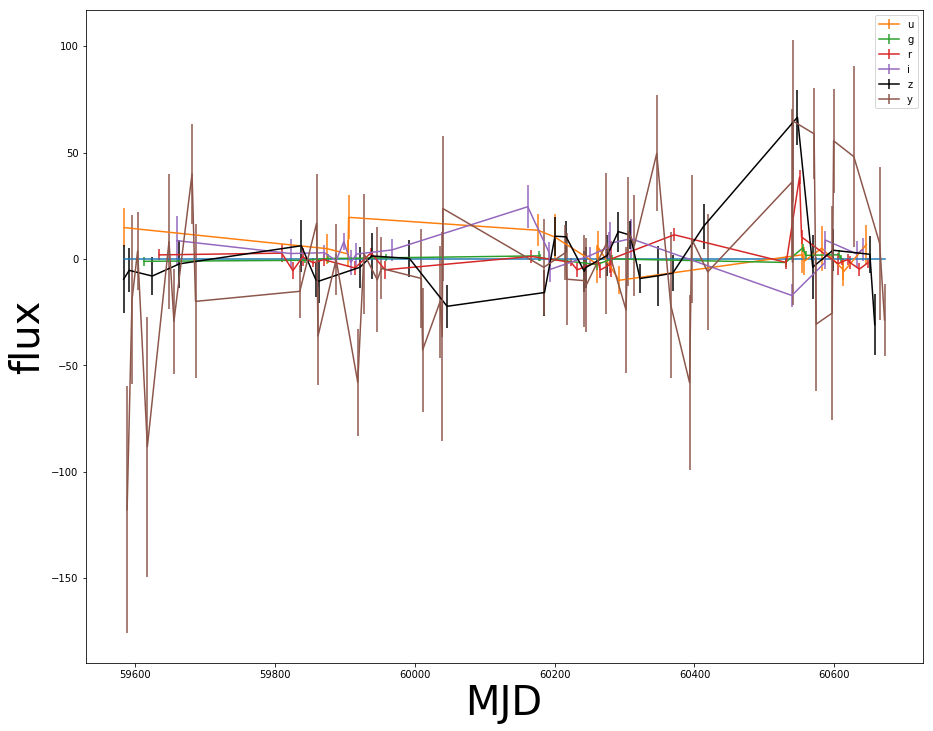

object_id
---------
 89733353
 89733353
 89733353
 89733353
 89733353
 89733353
 89733353
 89733353
 89733353
 89733353
      ...
 89733353
 89733353
 89733353
 89733353
 89733353
 89733353
 89733353
 89733353
 89733353
 89733353
 89733353
Length = 126 rows


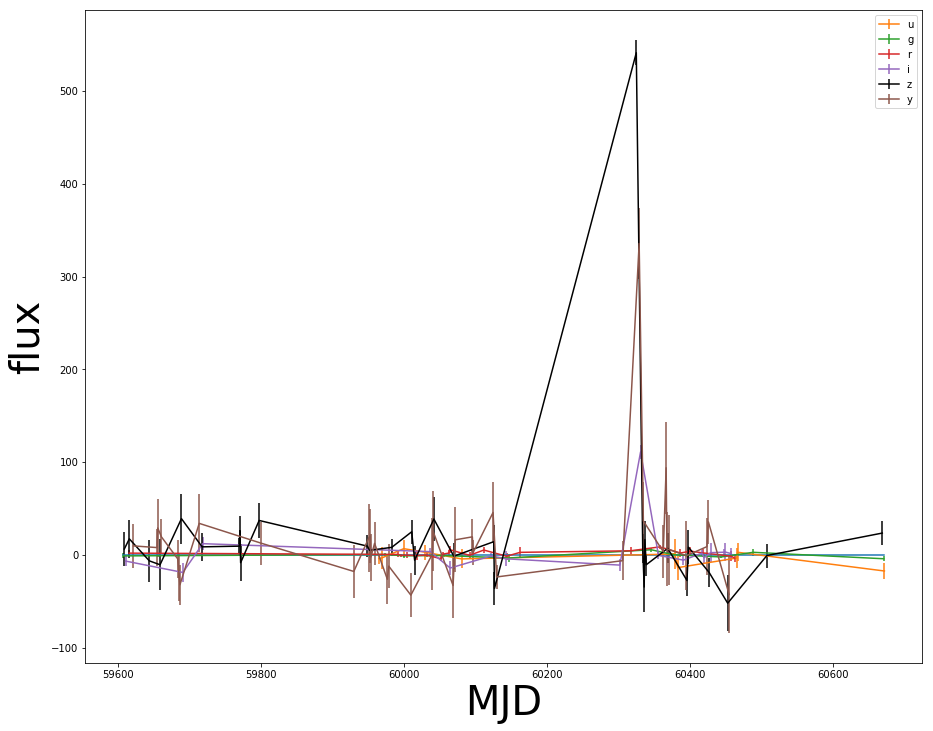

object_id
---------
 89942025
 89942025
 89942025
 89942025
 89942025
 89942025
 89942025
 89942025
 89942025
 89942025
      ...
 89942025
 89942025
 89942025
 89942025
 89942025
 89942025
 89942025
 89942025
 89942025
 89942025
 89942025
Length = 117 rows


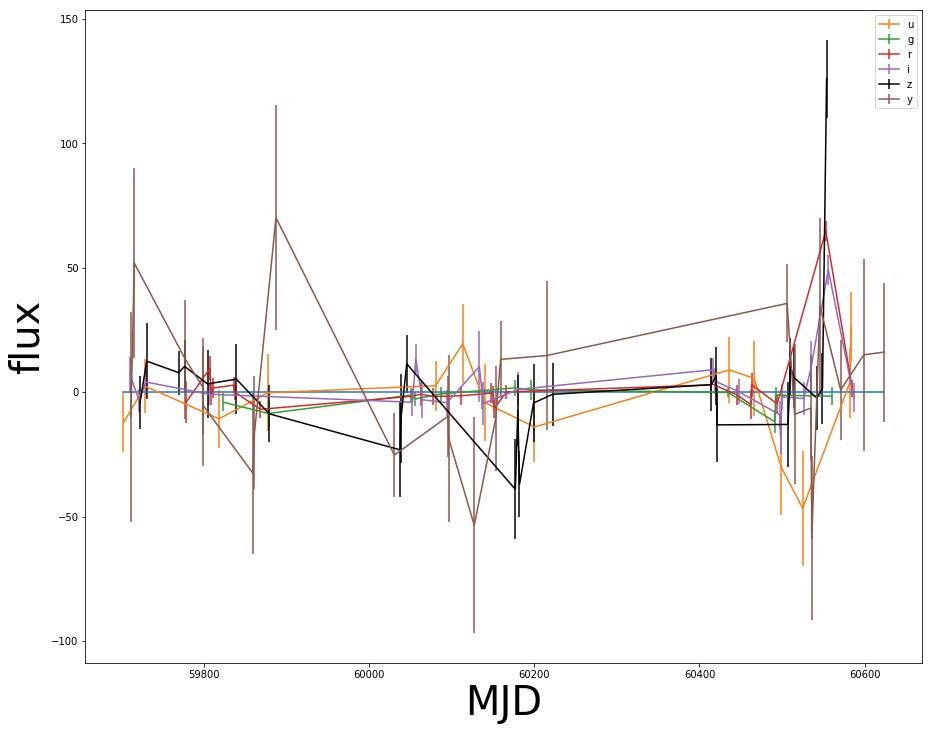

object_id
---------
 90269218
 90269218
 90269218
 90269218
 90269218
 90269218
 90269218
 90269218
 90269218
 90269218
      ...
 90269218
 90269218
 90269218
 90269218
 90269218
 90269218
 90269218
 90269218
 90269218
 90269218
 90269218
Length = 128 rows


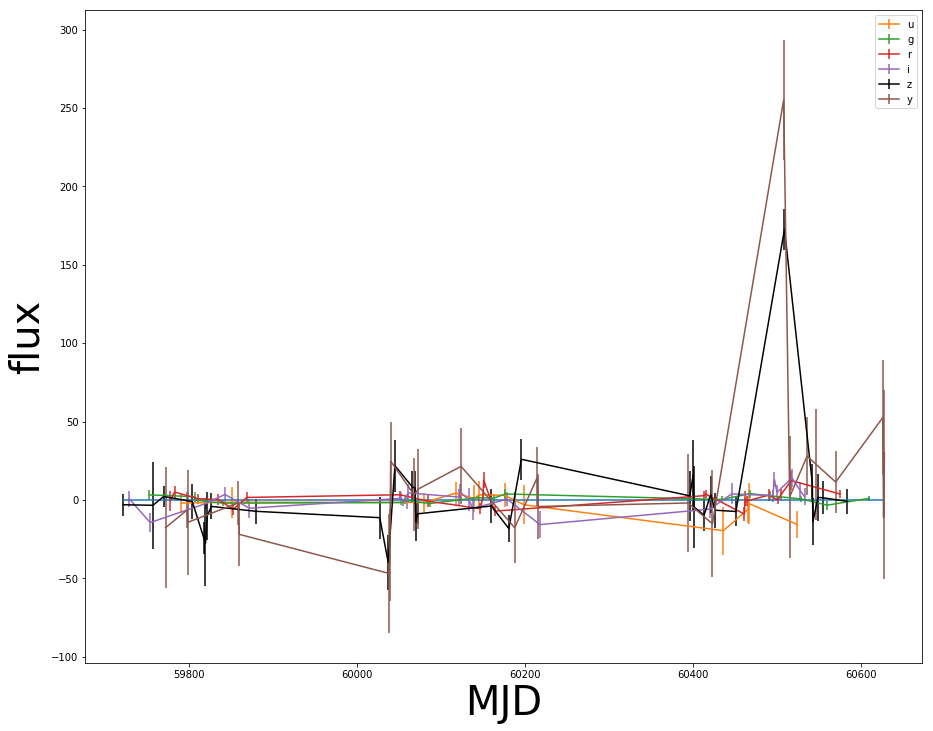

object_id
---------
 93121505
 93121505
 93121505
 93121505
 93121505
 93121505
 93121505
 93121505
 93121505
 93121505
      ...
 93121505
 93121505
 93121505
 93121505
 93121505
 93121505
 93121505
 93121505
 93121505
 93121505
 93121505
Length = 128 rows


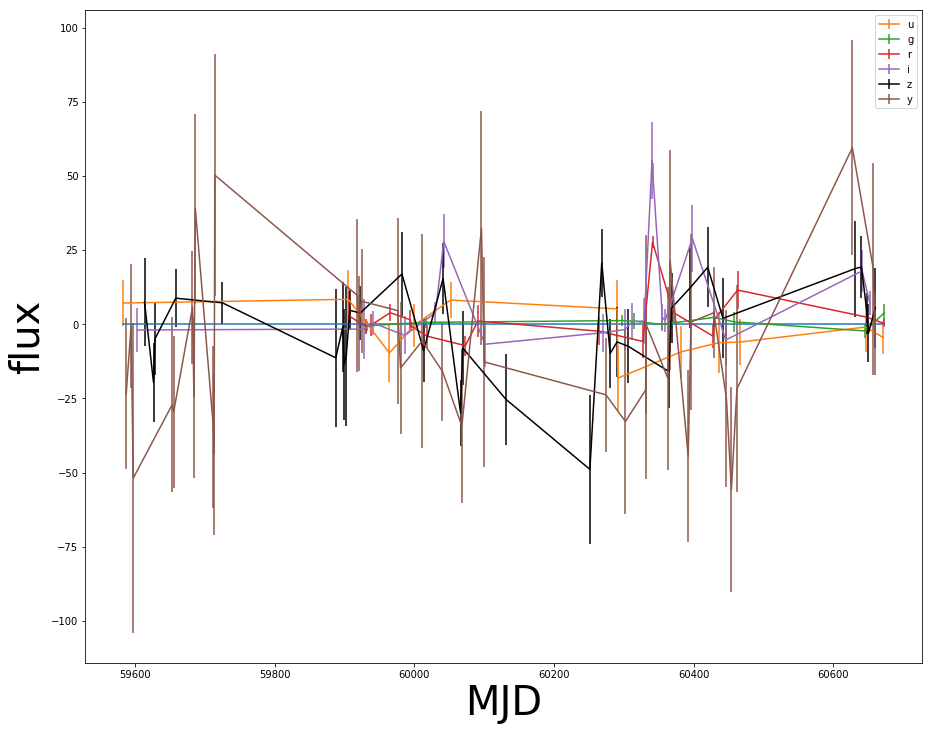

object_id
---------
 93394704
 93394704
 93394704
 93394704
 93394704
 93394704
 93394704
 93394704
 93394704
 93394704
      ...
 93394704
 93394704
 93394704
 93394704
 93394704
 93394704
 93394704
 93394704
 93394704
 93394704
 93394704
Length = 129 rows


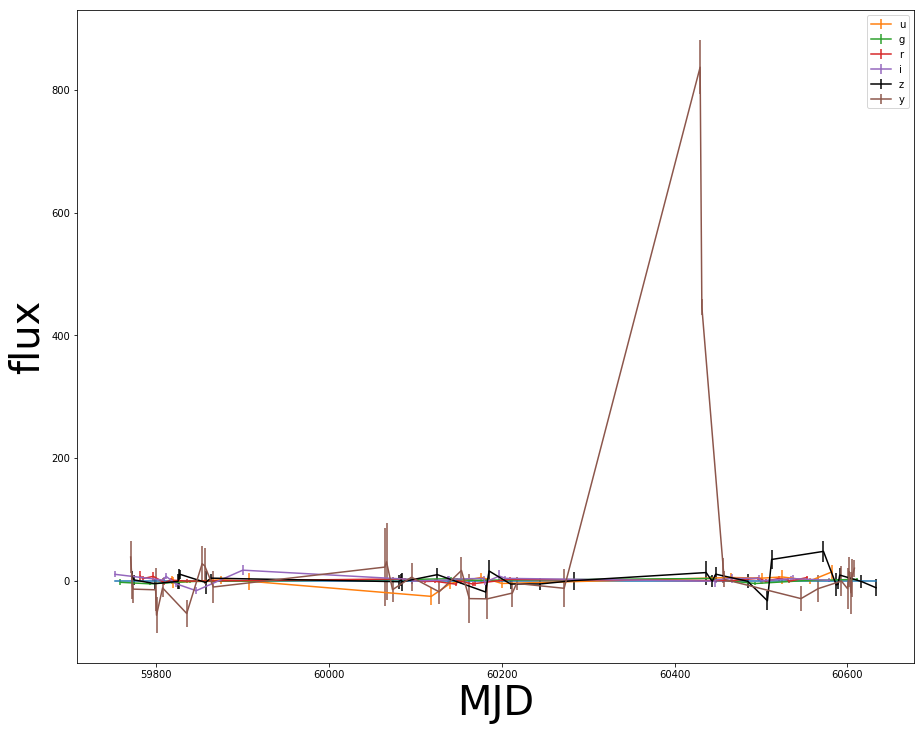

object_id
---------
 93725998
 93725998
 93725998
 93725998
 93725998
 93725998
 93725998
 93725998
 93725998
 93725998
      ...
 93725998
 93725998
 93725998
 93725998
 93725998
 93725998
 93725998
 93725998
 93725998
 93725998
 93725998
Length = 135 rows


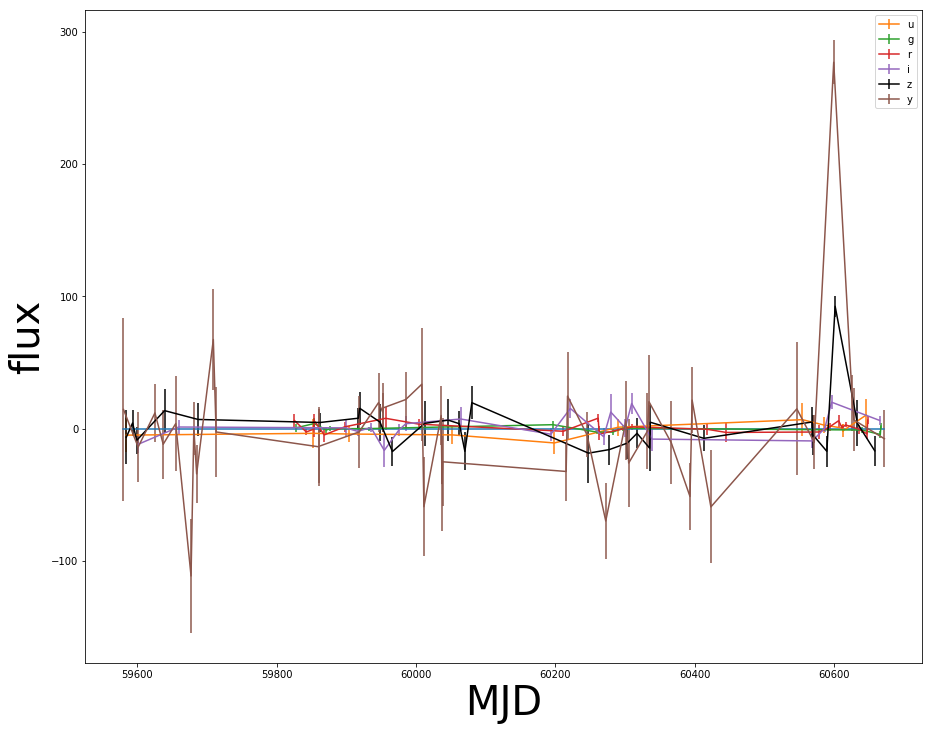

object_id
---------
 95541281
 95541281
 95541281
 95541281
 95541281
 95541281
 95541281
 95541281
 95541281
 95541281
      ...
 95541281
 95541281
 95541281
 95541281
 95541281
 95541281
 95541281
 95541281
 95541281
 95541281
 95541281
Length = 140 rows


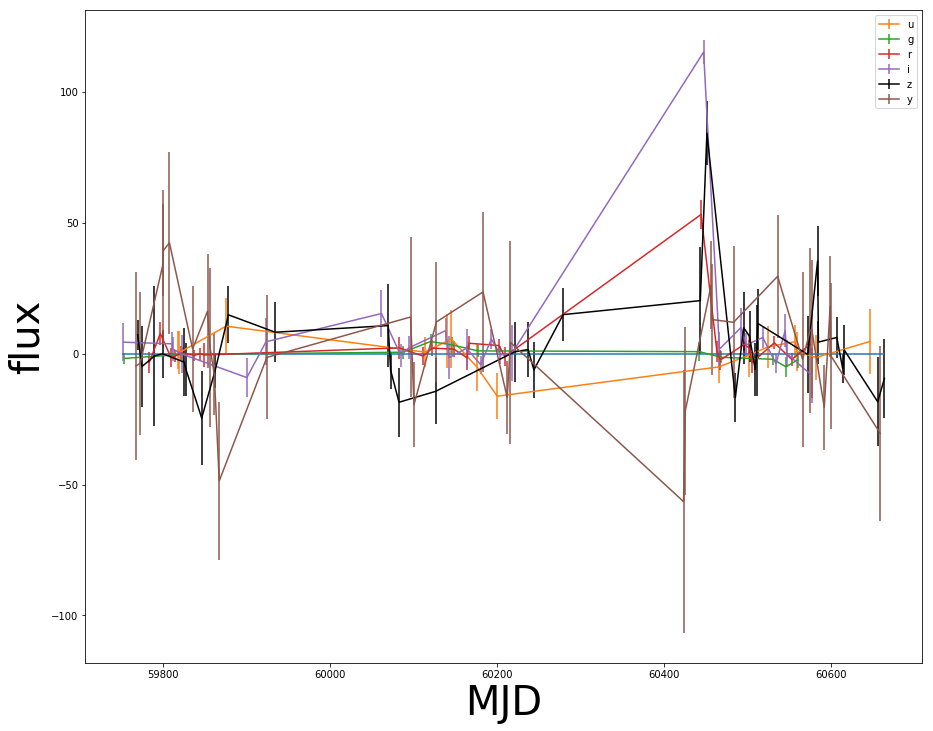

object_id
---------
 96619113
 96619113
 96619113
 96619113
 96619113
 96619113
 96619113
 96619113
 96619113
 96619113
      ...
 96619113
 96619113
 96619113
 96619113
 96619113
 96619113
 96619113
 96619113
 96619113
 96619113
 96619113
Length = 114 rows


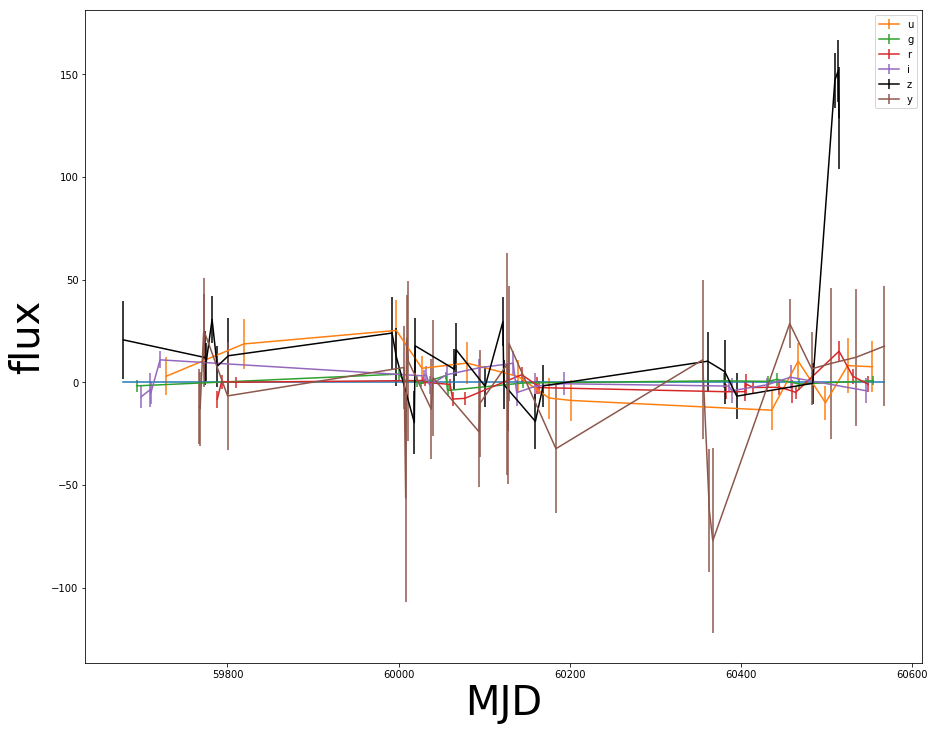

object_id
---------
 97214939
 97214939
 97214939
 97214939
 97214939
 97214939
 97214939
 97214939
 97214939
 97214939
      ...
 97214939
 97214939
 97214939
 97214939
 97214939
 97214939
 97214939
 97214939
 97214939
 97214939
 97214939
Length = 140 rows


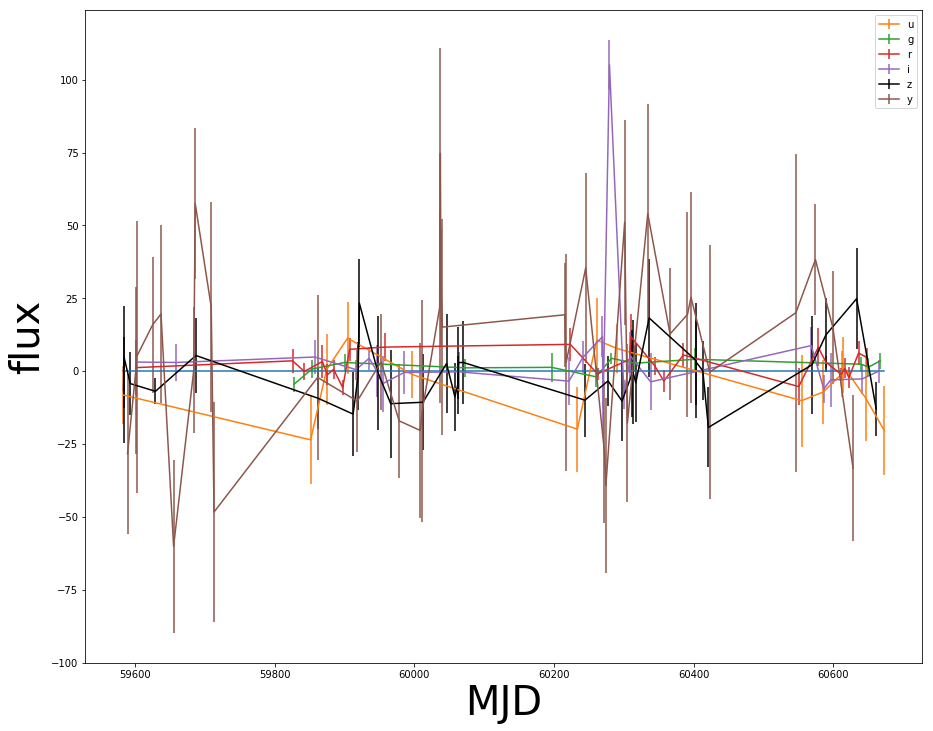

object_id
---------
 97639845
 97639845
 97639845
 97639845
 97639845
 97639845
 97639845
 97639845
 97639845
 97639845
      ...
 97639845
 97639845
 97639845
 97639845
 97639845
 97639845
 97639845
 97639845
 97639845
 97639845
 97639845
Length = 109 rows


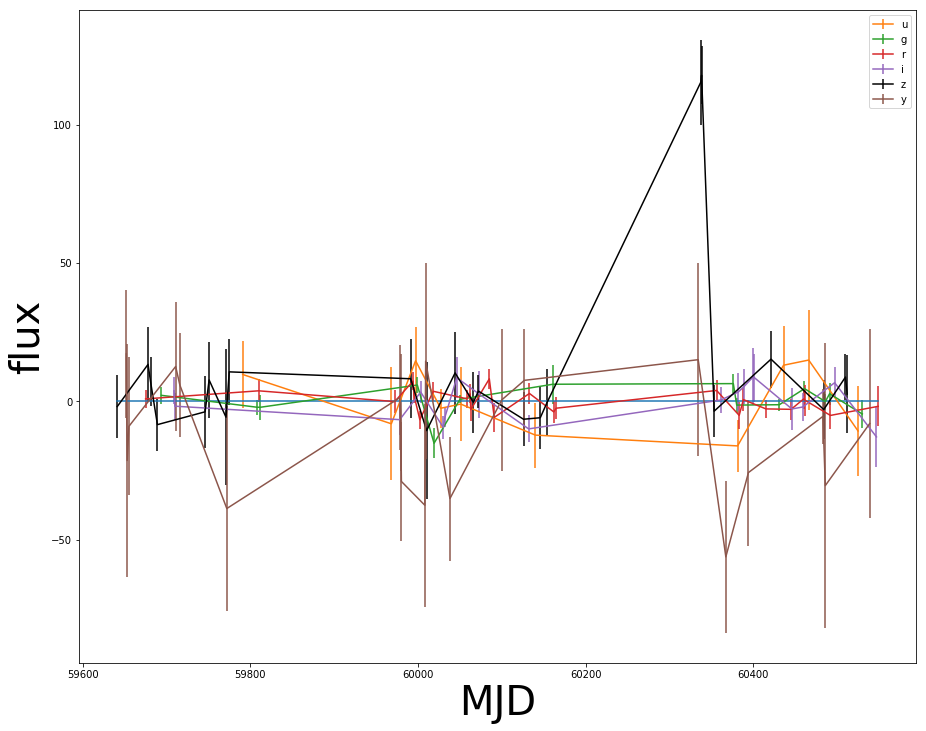

object_id
---------
 97765302
 97765302
 97765302
 97765302
 97765302
 97765302
 97765302
 97765302
 97765302
 97765302
      ...
 97765302
 97765302
 97765302
 97765302
 97765302
 97765302
 97765302
 97765302
 97765302
 97765302
 97765302
Length = 130 rows


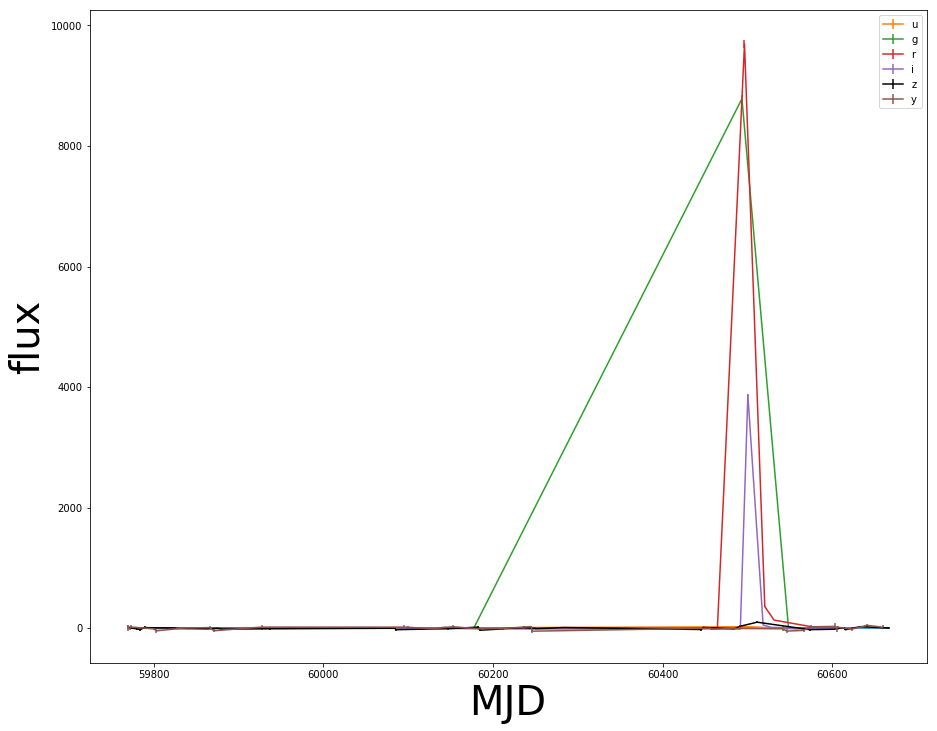

object_id
---------
 99449747
 99449747
 99449747
 99449747
 99449747
 99449747
 99449747
 99449747
 99449747
 99449747
      ...
 99449747
 99449747
 99449747
 99449747
 99449747
 99449747
 99449747
 99449747
 99449747
 99449747
 99449747
Length = 149 rows


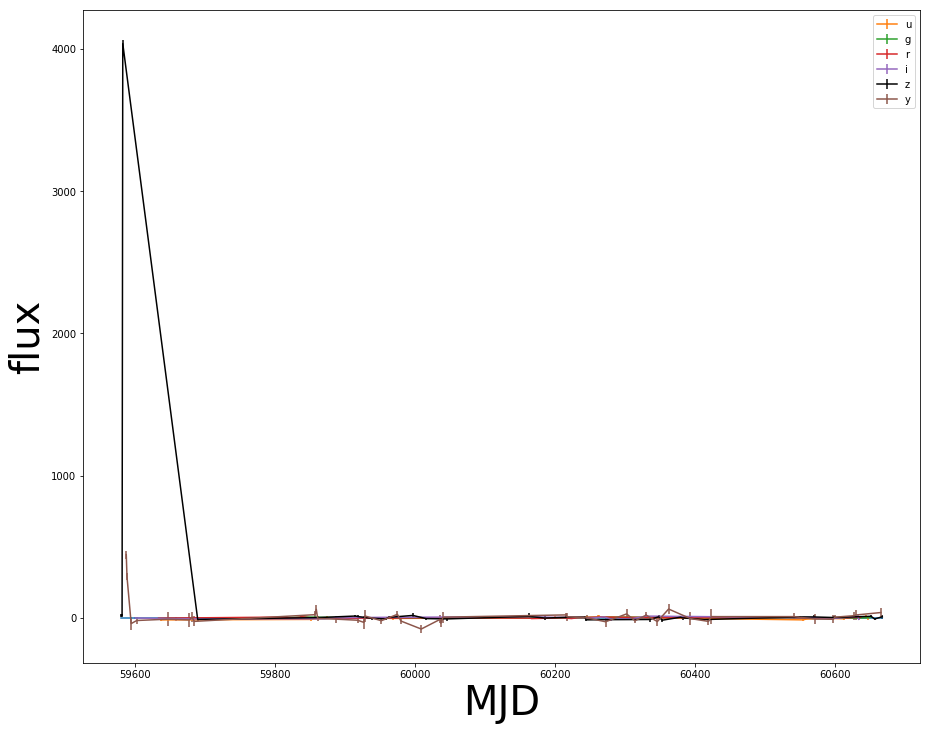

object_id
---------
102551107
102551107
102551107
102551107
102551107
102551107
102551107
102551107
102551107
102551107
      ...
102551107
102551107
102551107
102551107
102551107
102551107
102551107
102551107
102551107
102551107
102551107
Length = 114 rows


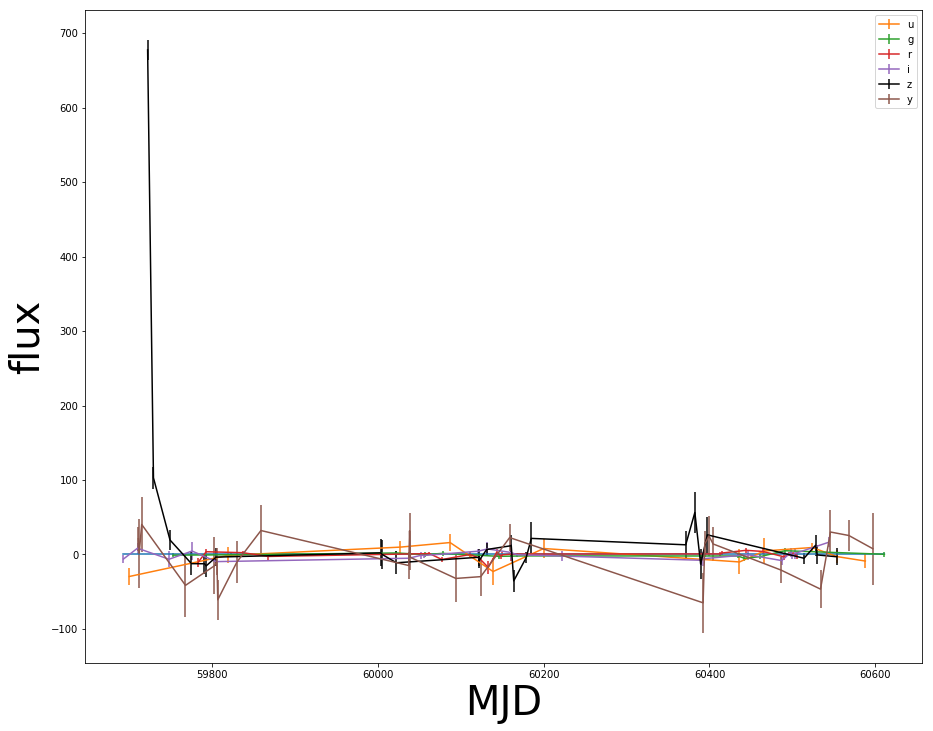

object_id
---------
102599855
102599855
102599855
102599855
102599855
102599855
102599855
102599855
102599855
102599855
      ...
102599855
102599855
102599855
102599855
102599855
102599855
102599855
102599855
102599855
102599855
102599855
Length = 123 rows


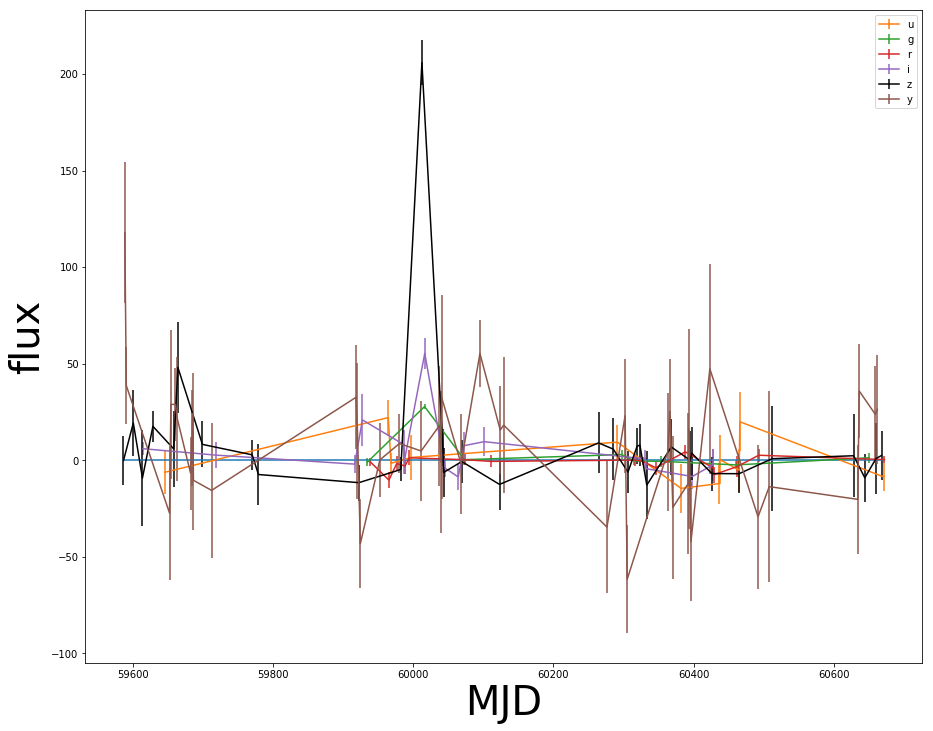

object_id
---------
103258429
103258429
103258429
103258429
103258429
103258429
103258429
103258429
103258429
103258429
      ...
103258429
103258429
103258429
103258429
103258429
103258429
103258429
103258429
103258429
103258429
103258429
Length = 116 rows


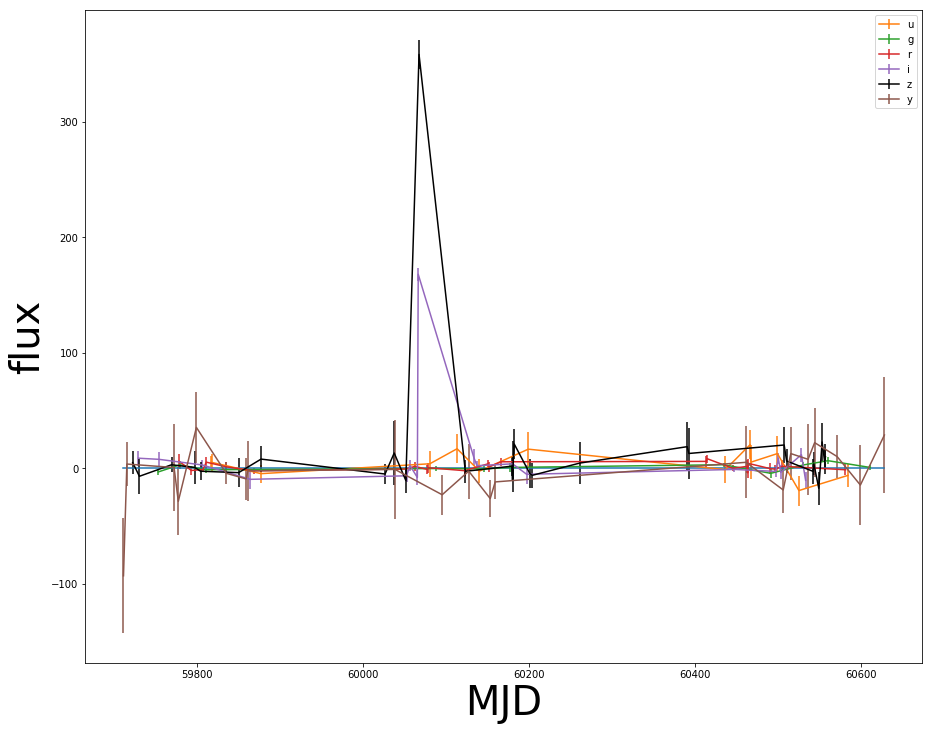

object_id
---------
103989029
103989029
103989029
103989029
103989029
103989029
103989029
103989029
103989029
103989029
      ...
103989029
103989029
103989029
103989029
103989029
103989029
103989029
103989029
103989029
103989029
103989029
Length = 134 rows


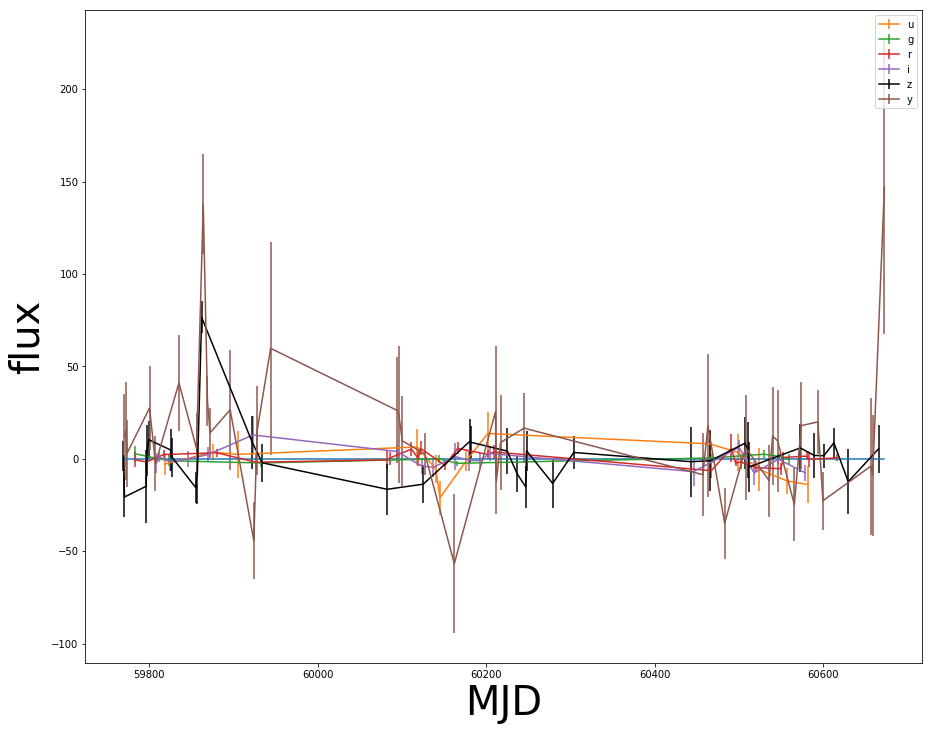

object_id
---------
105385367
105385367
105385367
105385367
105385367
105385367
105385367
105385367
105385367
105385367
      ...
105385367
105385367
105385367
105385367
105385367
105385367
105385367
105385367
105385367
105385367
105385367
Length = 138 rows


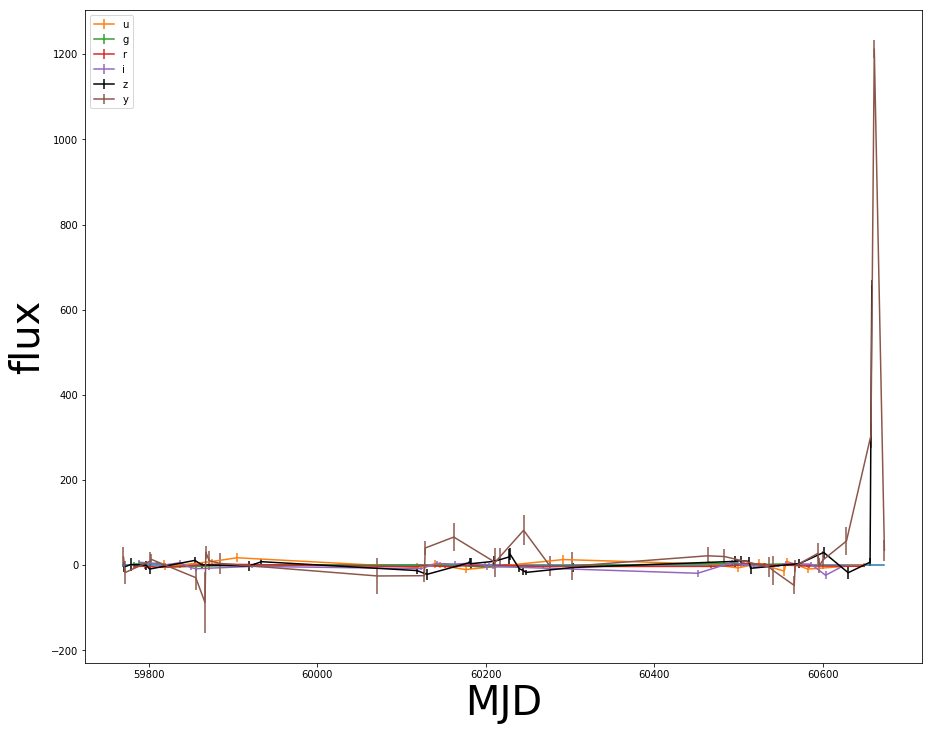

object_id
---------
107129776
107129776
107129776
107129776
107129776
107129776
107129776
107129776
107129776
107129776
      ...
107129776
107129776
107129776
107129776
107129776
107129776
107129776
107129776
107129776
107129776
107129776
Length = 115 rows


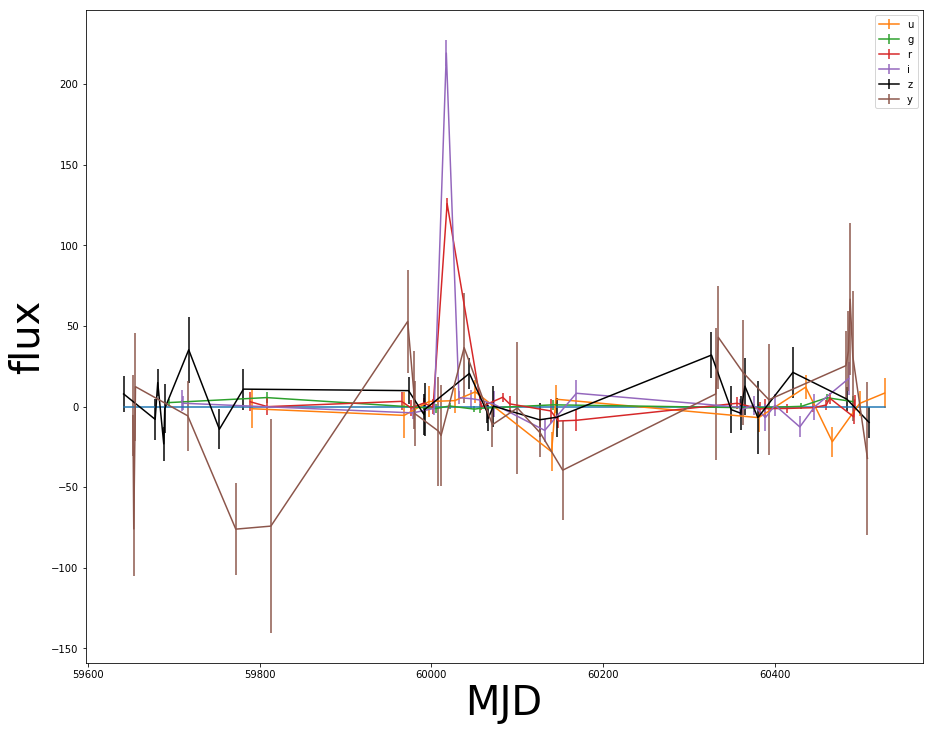

object_id
---------
108253858
108253858
108253858
108253858
108253858
108253858
108253858
108253858
108253858
108253858
      ...
108253858
108253858
108253858
108253858
108253858
108253858
108253858
108253858
108253858
108253858
108253858
Length = 146 rows


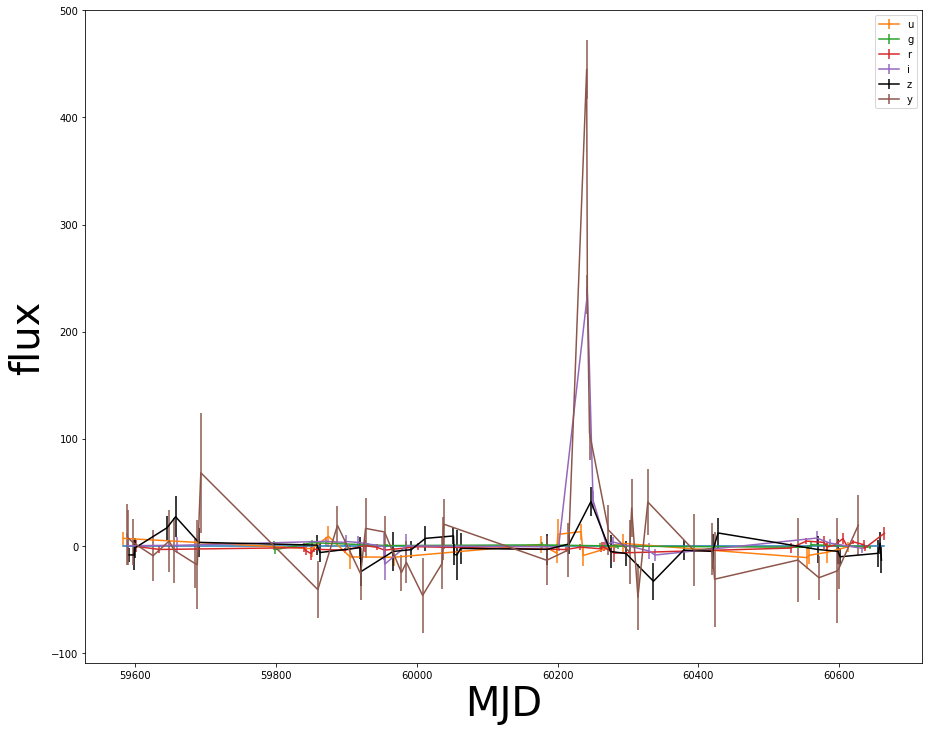

object_id
---------
108305965
108305965
108305965
108305965
108305965
108305965
108305965
108305965
108305965
108305965
      ...
108305965
108305965
108305965
108305965
108305965
108305965
108305965
108305965
108305965
108305965
108305965
Length = 134 rows


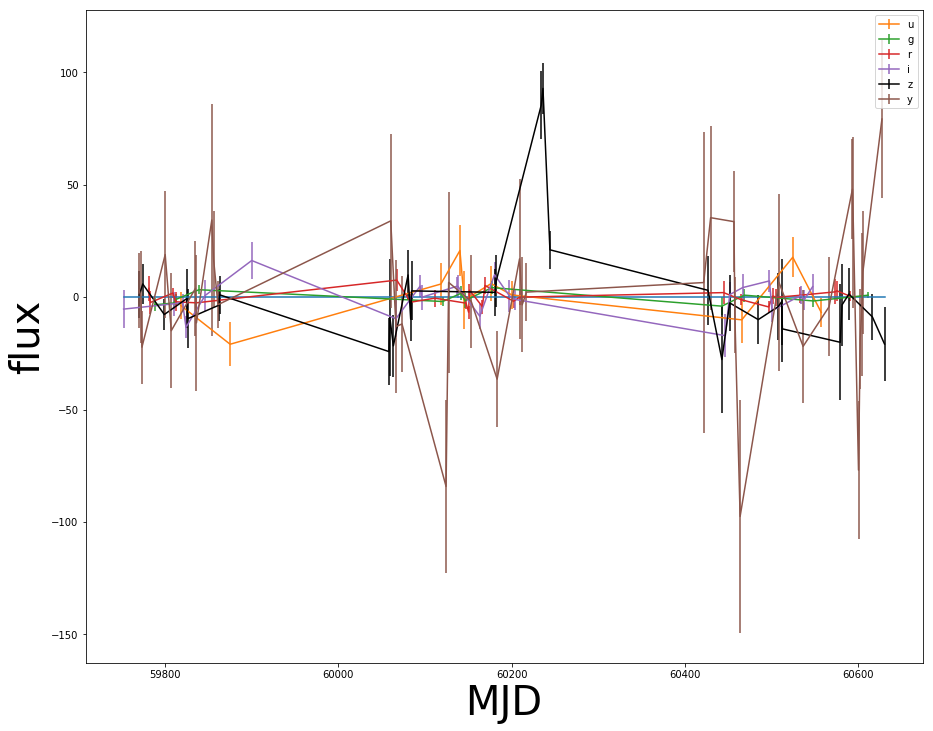

object_id
---------
110808232
110808232
110808232
110808232
110808232
110808232
110808232
110808232
110808232
110808232
      ...
110808232
110808232
110808232
110808232
110808232
110808232
110808232
110808232
110808232
110808232
110808232
Length = 136 rows


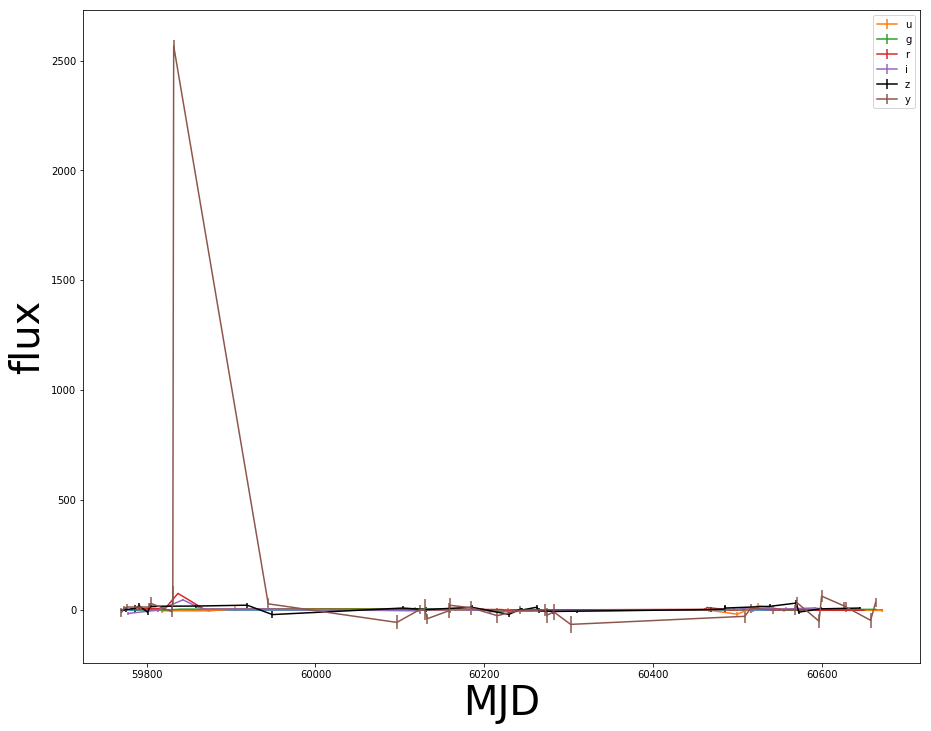

object_id
---------
113330500
113330500
113330500
113330500
113330500
113330500
113330500
113330500
113330500
113330500
      ...
113330500
113330500
113330500
113330500
113330500
113330500
113330500
113330500
113330500
113330500
113330500
Length = 132 rows


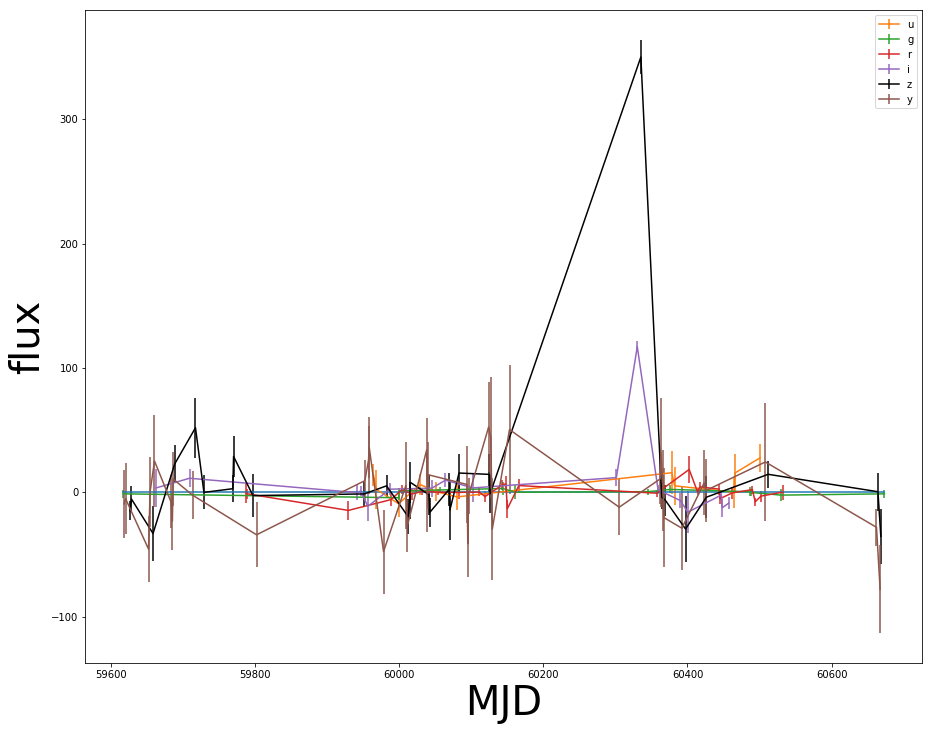

object_id
---------
113678572
113678572
113678572
113678572
113678572
113678572
113678572
113678572
113678572
113678572
      ...
113678572
113678572
113678572
113678572
113678572
113678572
113678572
113678572
113678572
113678572
113678572
Length = 117 rows


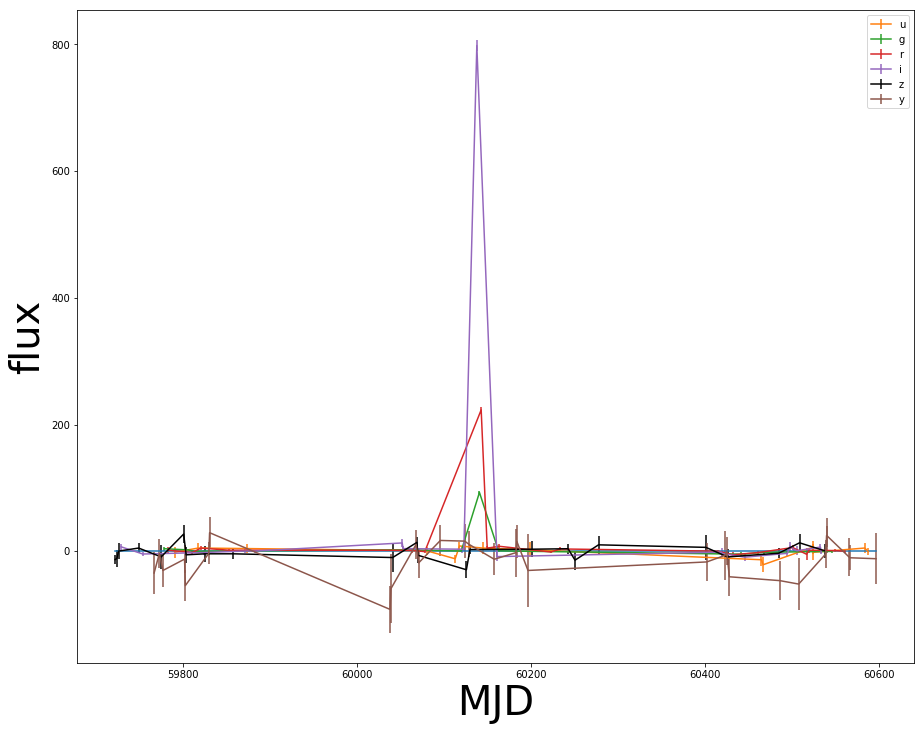

object_id
---------
113851505
113851505
113851505
113851505
113851505
113851505
113851505
113851505
113851505
113851505
      ...
113851505
113851505
113851505
113851505
113851505
113851505
113851505
113851505
113851505
113851505
113851505
Length = 150 rows


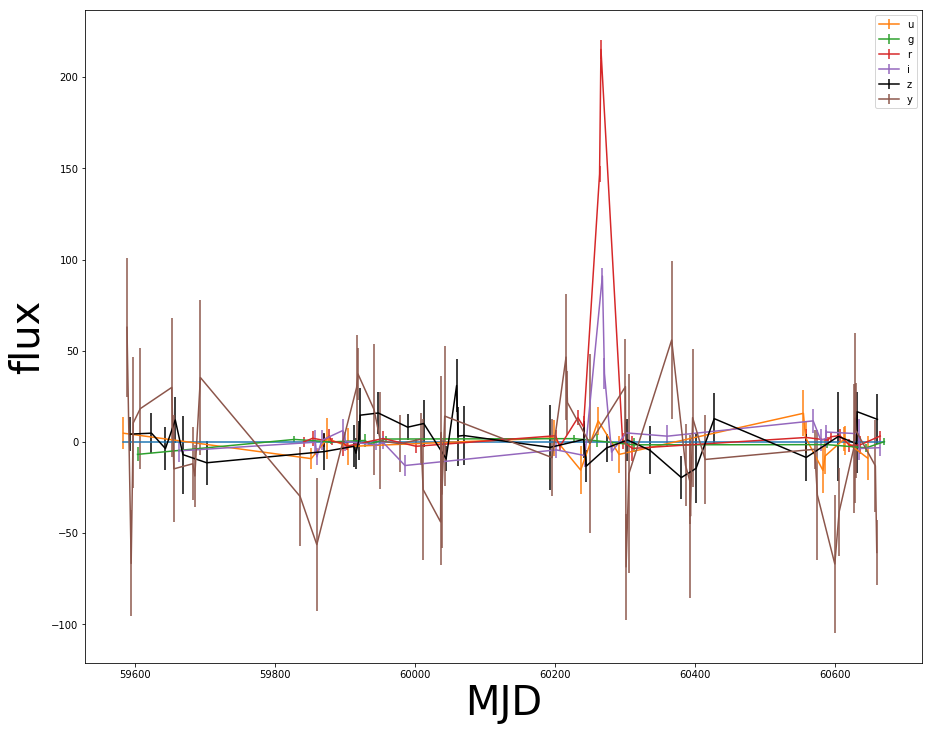

object_id
---------
114467134
114467134
114467134
114467134
114467134
114467134
114467134
114467134
114467134
114467134
      ...
114467134
114467134
114467134
114467134
114467134
114467134
114467134
114467134
114467134
114467134
114467134
Length = 147 rows


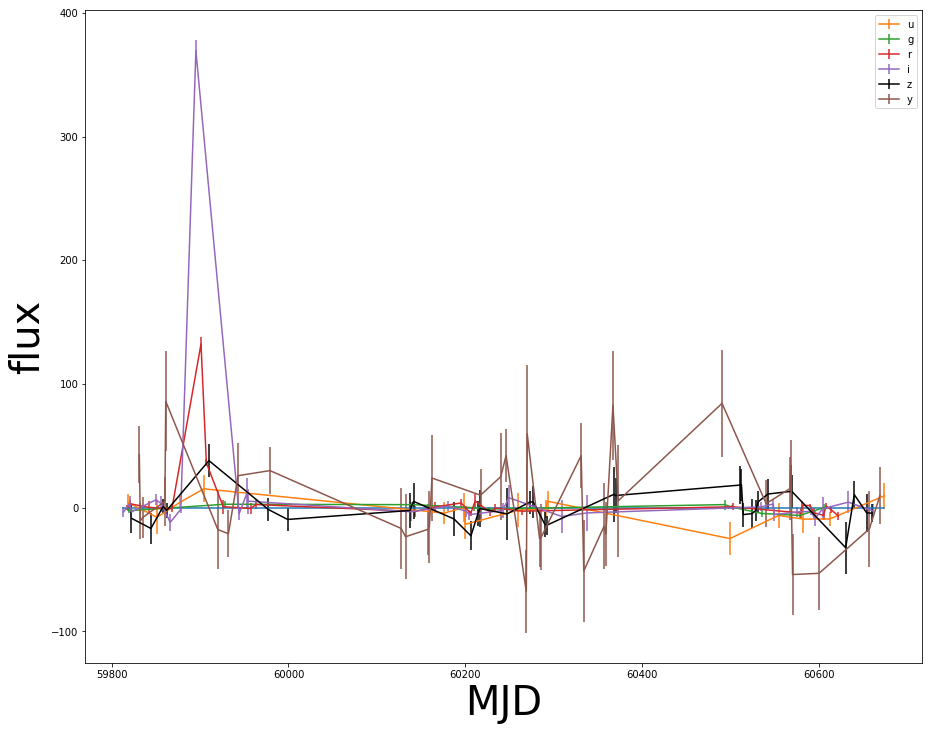

object_id
---------
115381923
115381923
115381923
115381923
115381923
115381923
115381923
115381923
115381923
115381923
      ...
115381923
115381923
115381923
115381923
115381923
115381923
115381923
115381923
115381923
115381923
115381923
Length = 134 rows


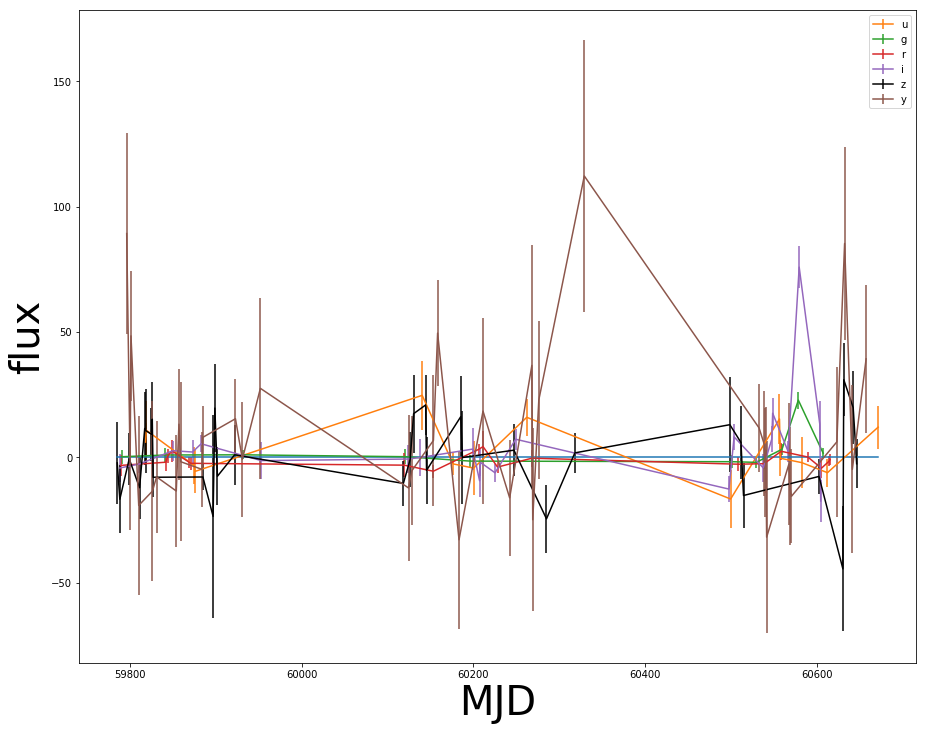

object_id
---------
115713701
115713701
115713701
115713701
115713701
115713701
115713701
115713701
115713701
115713701
      ...
115713701
115713701
115713701
115713701
115713701
115713701
115713701
115713701
115713701
115713701
115713701
Length = 140 rows


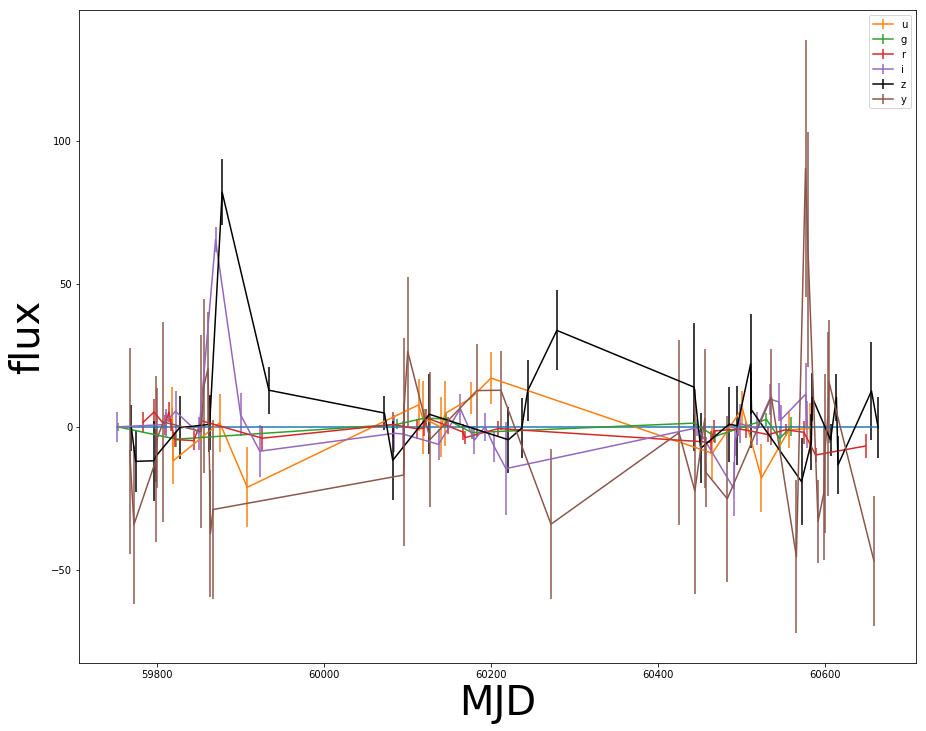

object_id
---------
118230321
118230321
118230321
118230321
118230321
118230321
118230321
118230321
118230321
118230321
      ...
118230321
118230321
118230321
118230321
118230321
118230321
118230321
118230321
118230321
118230321
118230321
Length = 119 rows


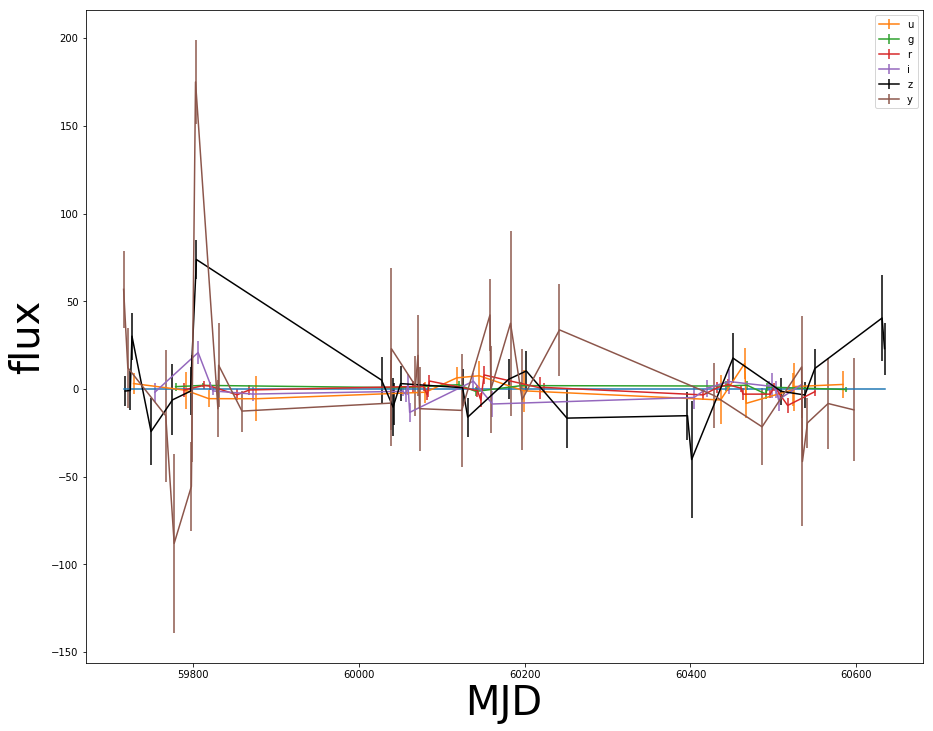

object_id
---------
119260275
119260275
119260275
119260275
119260275
119260275
119260275
119260275
119260275
119260275
      ...
119260275
119260275
119260275
119260275
119260275
119260275
119260275
119260275
119260275
119260275
119260275
Length = 127 rows


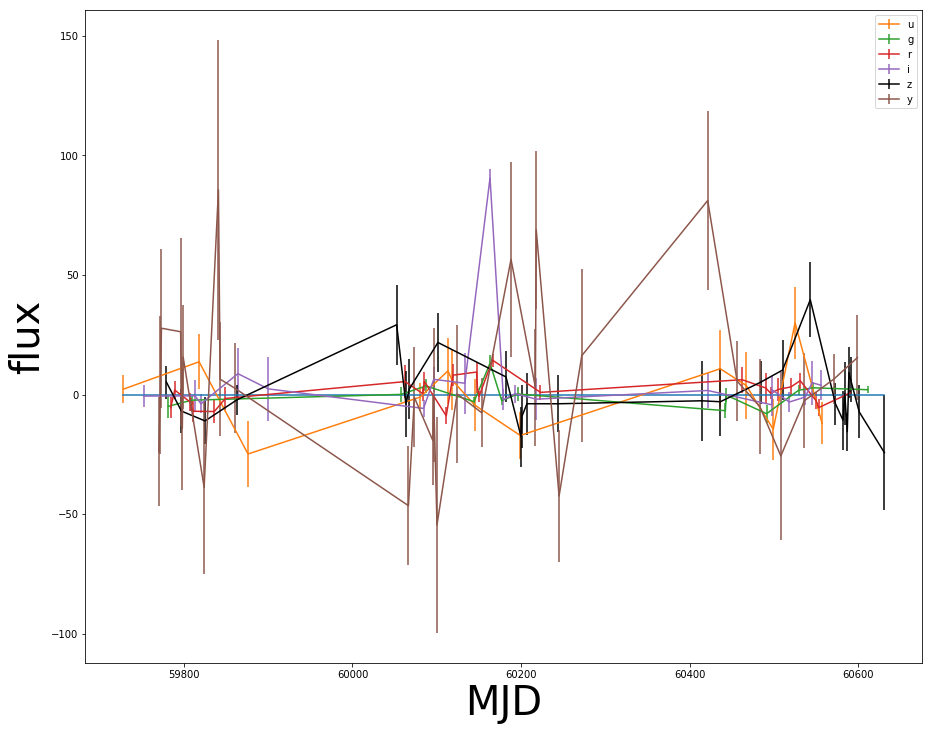

object_id
---------
120794836
120794836
120794836
120794836
120794836
120794836
120794836
120794836
120794836
120794836
      ...
120794836
120794836
120794836
120794836
120794836
120794836
120794836
120794836
120794836
120794836
120794836
Length = 122 rows


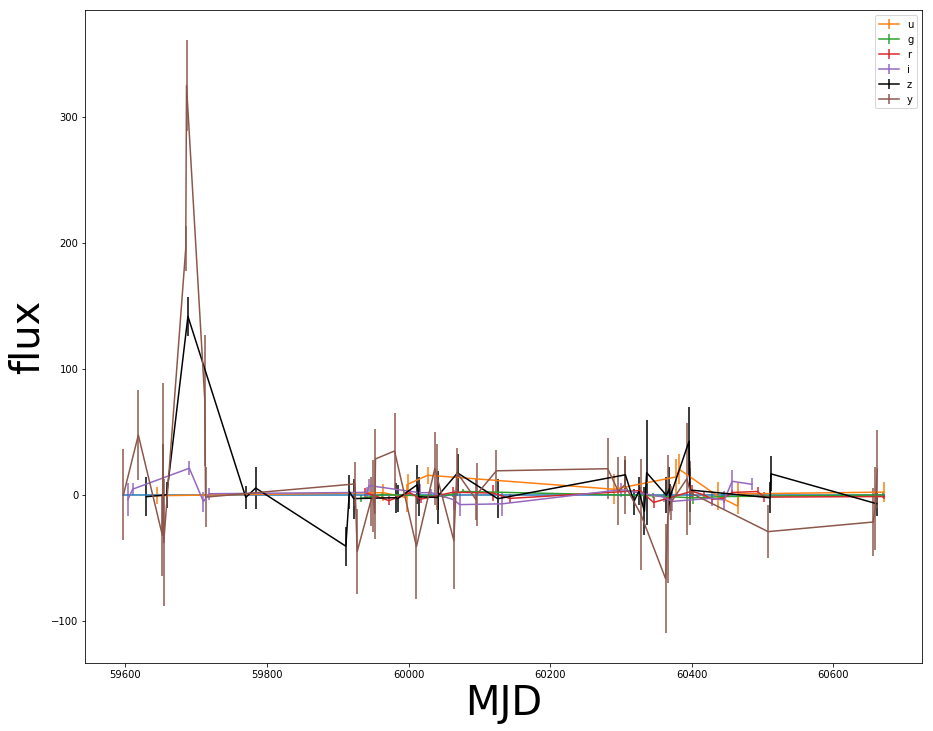

object_id
---------
120845357
120845357
120845357
120845357
120845357
120845357
120845357
120845357
120845357
120845357
      ...
120845357
120845357
120845357
120845357
120845357
120845357
120845357
120845357
120845357
120845357
120845357
Length = 137 rows


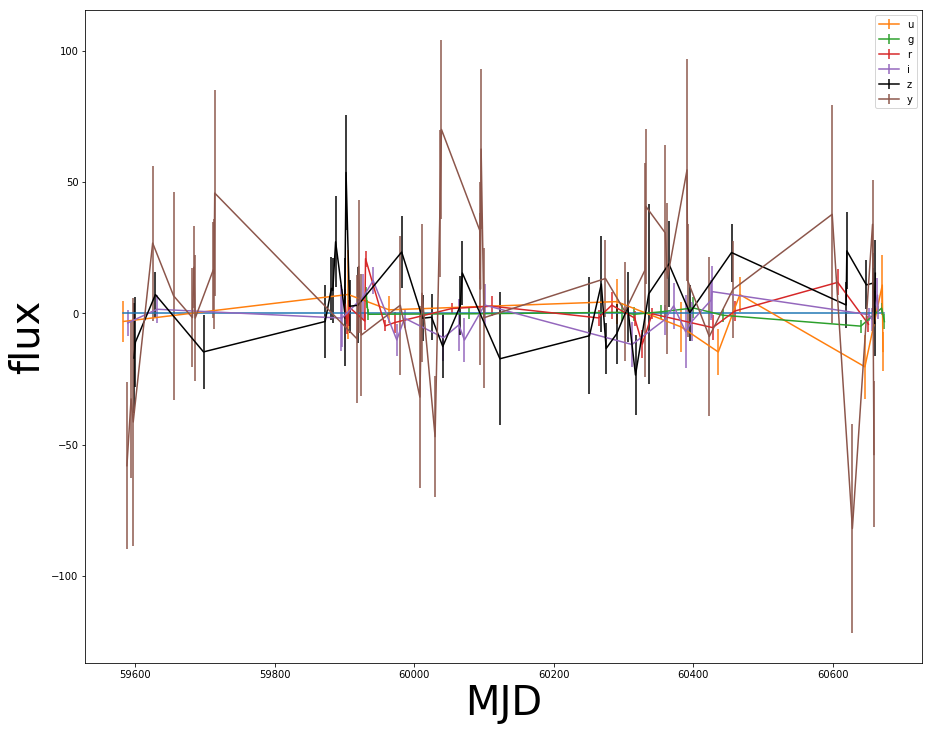

object_id
---------
121016694
121016694
121016694
121016694
121016694
121016694
121016694
121016694
121016694
121016694
      ...
121016694
121016694
121016694
121016694
121016694
121016694
121016694
121016694
121016694
121016694
121016694
Length = 118 rows


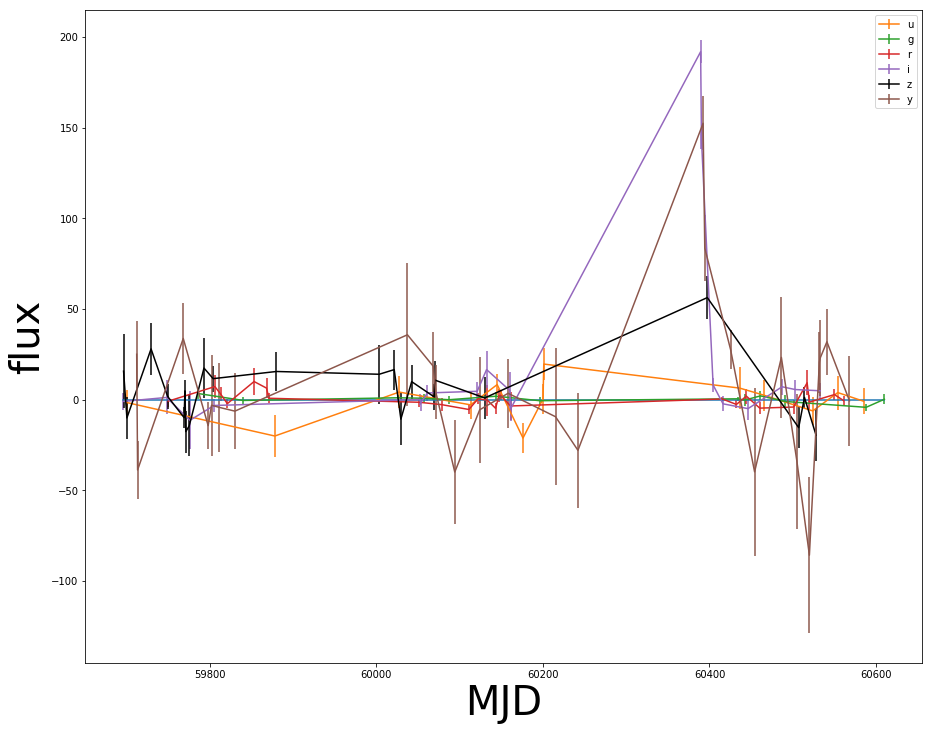

object_id
---------
121257780
121257780
121257780
121257780
121257780
121257780
121257780
121257780
121257780
121257780
      ...
121257780
121257780
121257780
121257780
121257780
121257780
121257780
121257780
121257780
121257780
121257780
Length = 130 rows


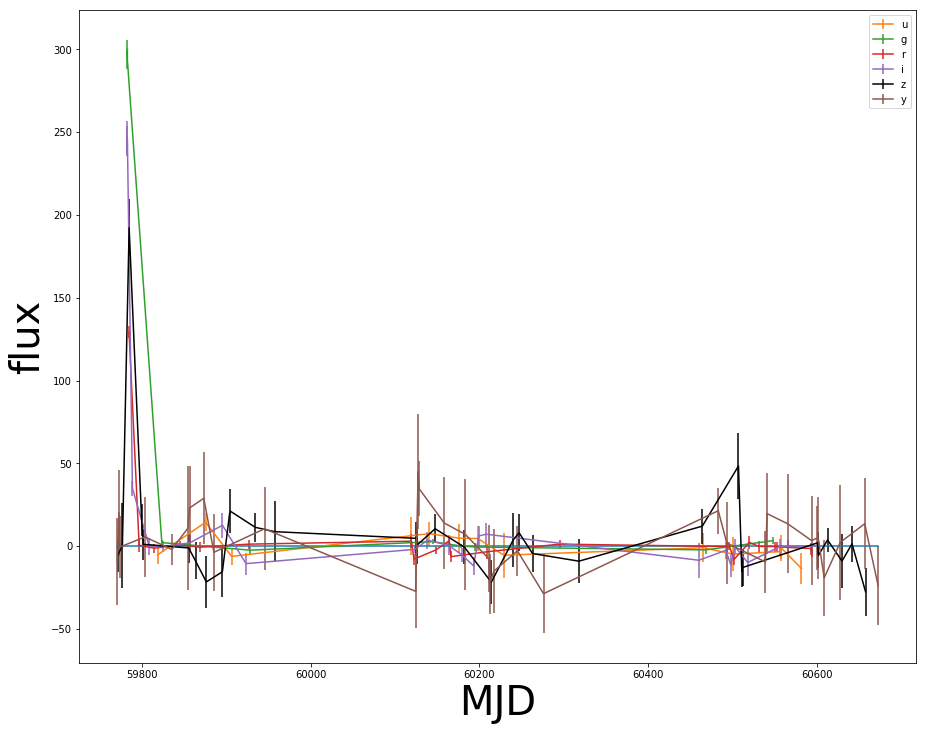

object_id
---------
121326699
121326699
121326699
121326699
121326699
121326699
121326699
121326699
121326699
121326699
      ...
121326699
121326699
121326699
121326699
121326699
121326699
121326699
121326699
121326699
121326699
121326699
Length = 142 rows


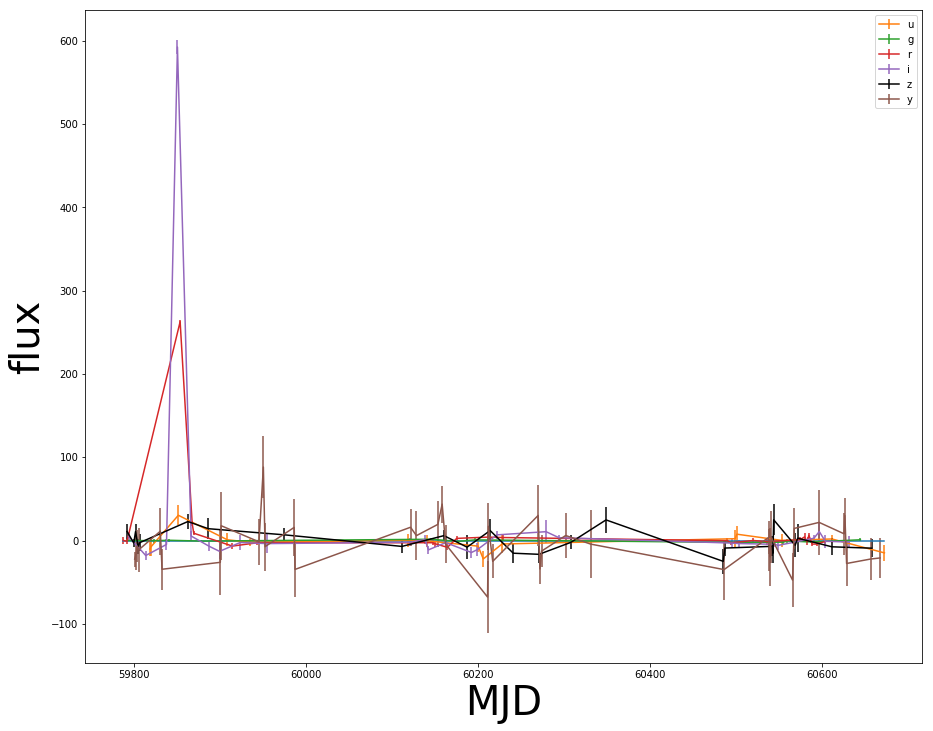

object_id
---------
122963326
122963326
122963326
122963326
122963326
122963326
122963326
122963326
122963326
122963326
      ...
122963326
122963326
122963326
122963326
122963326
122963326
122963326
122963326
122963326
122963326
122963326
Length = 148 rows


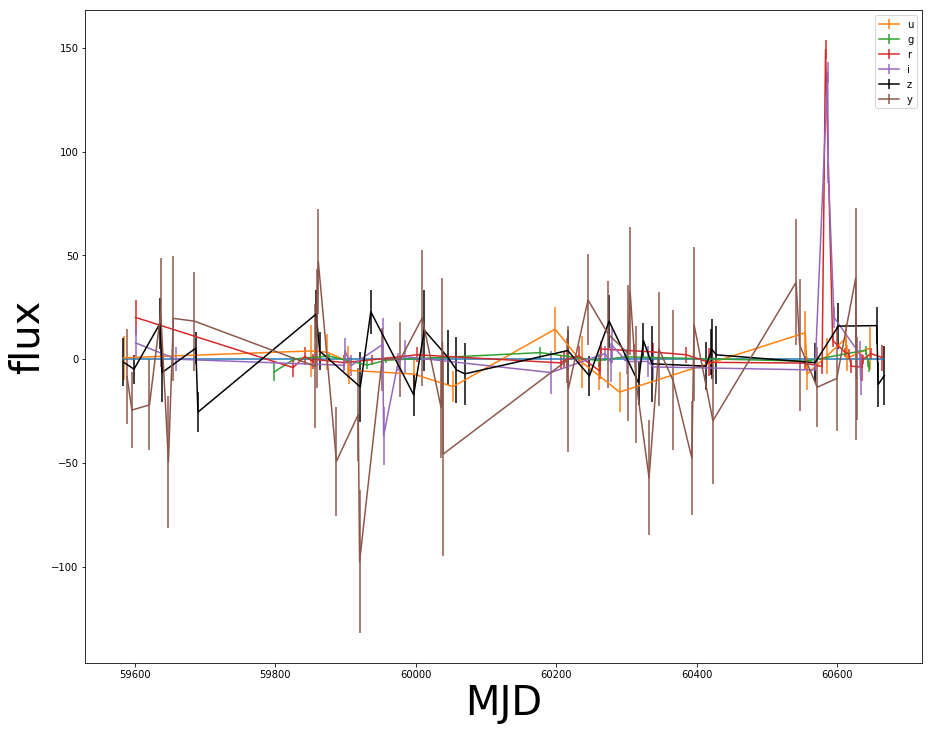

object_id
---------
124687561
124687561
124687561
124687561
124687561
124687561
124687561
124687561
124687561
124687561
      ...
124687561
124687561
124687561
124687561
124687561
124687561
124687561
124687561
124687561
124687561
124687561
Length = 143 rows


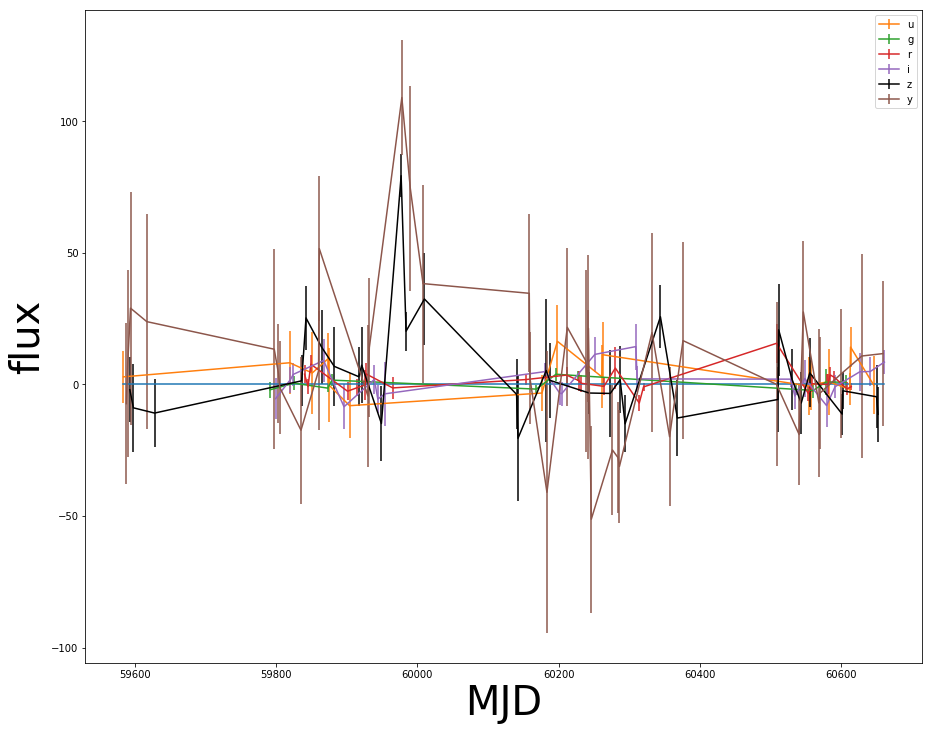

object_id
---------
125554681
125554681
125554681
125554681
125554681
125554681
125554681
125554681
125554681
125554681
      ...
125554681
125554681
125554681
125554681
125554681
125554681
125554681
125554681
125554681
125554681
125554681
Length = 133 rows


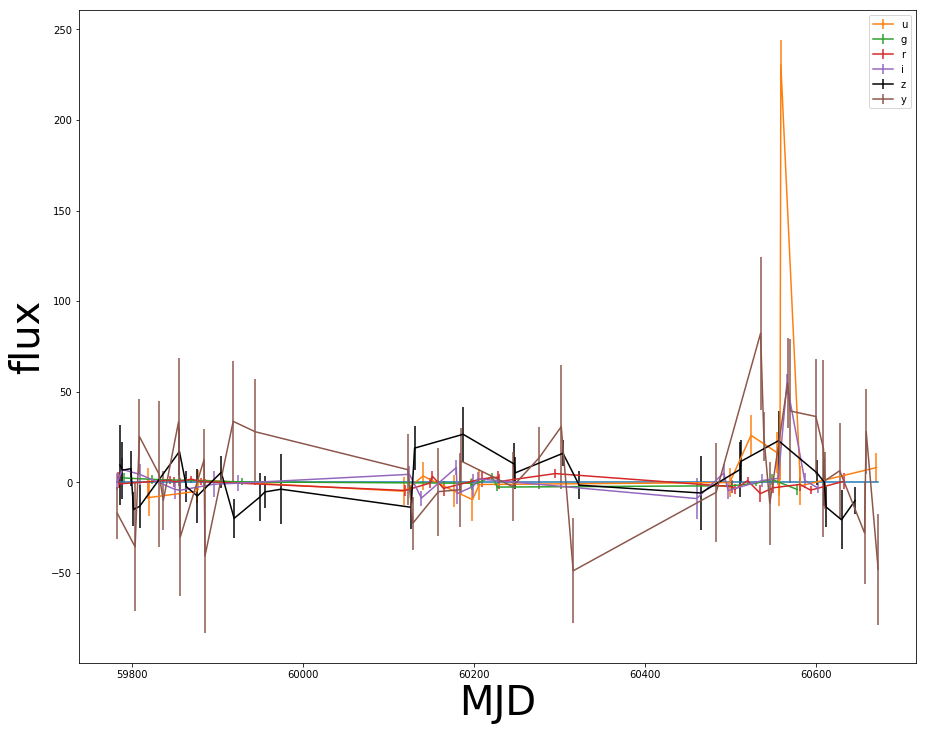

object_id
---------
126976895
126976895
126976895
126976895
126976895
126976895
126976895
126976895
126976895
126976895
      ...
126976895
126976895
126976895
126976895
126976895
126976895
126976895
126976895
126976895
126976895
126976895
Length = 138 rows


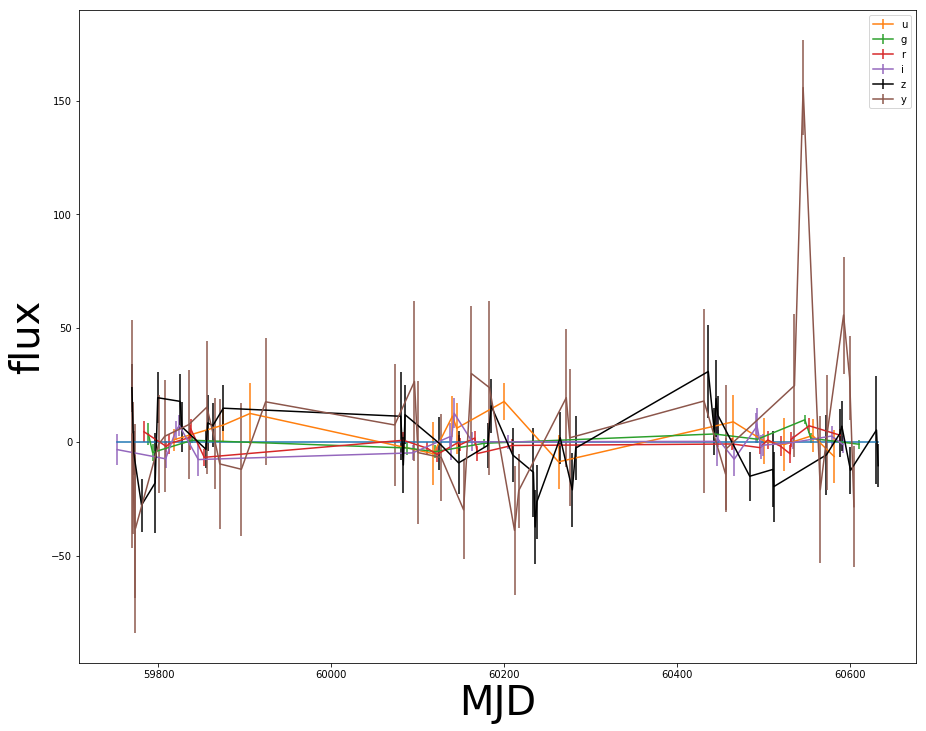

object_id
---------
129328649
129328649
129328649
129328649
129328649
129328649
129328649
129328649
129328649
129328649
      ...
129328649
129328649
129328649
129328649
129328649
129328649
129328649
129328649
129328649
129328649
129328649
Length = 143 rows


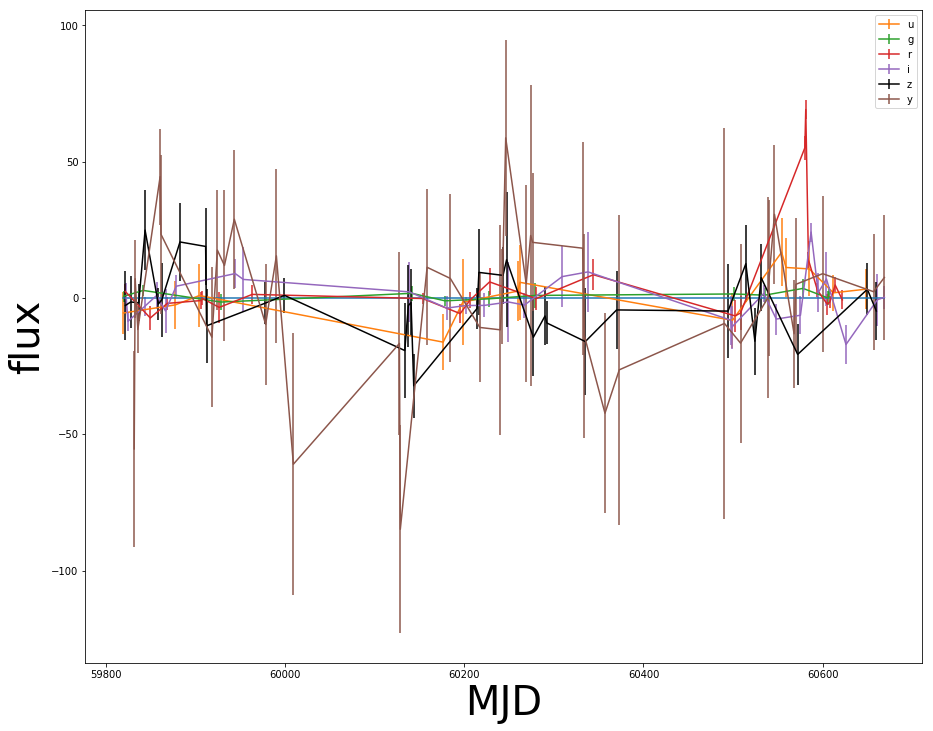

object_id
---------
130678775
130678775
130678775
130678775
130678775
130678775
130678775
130678775
130678775
130678775
      ...
130678775
130678775
130678775
130678775
130678775
130678775
130678775
130678775
130678775
130678775
130678775
Length = 141 rows


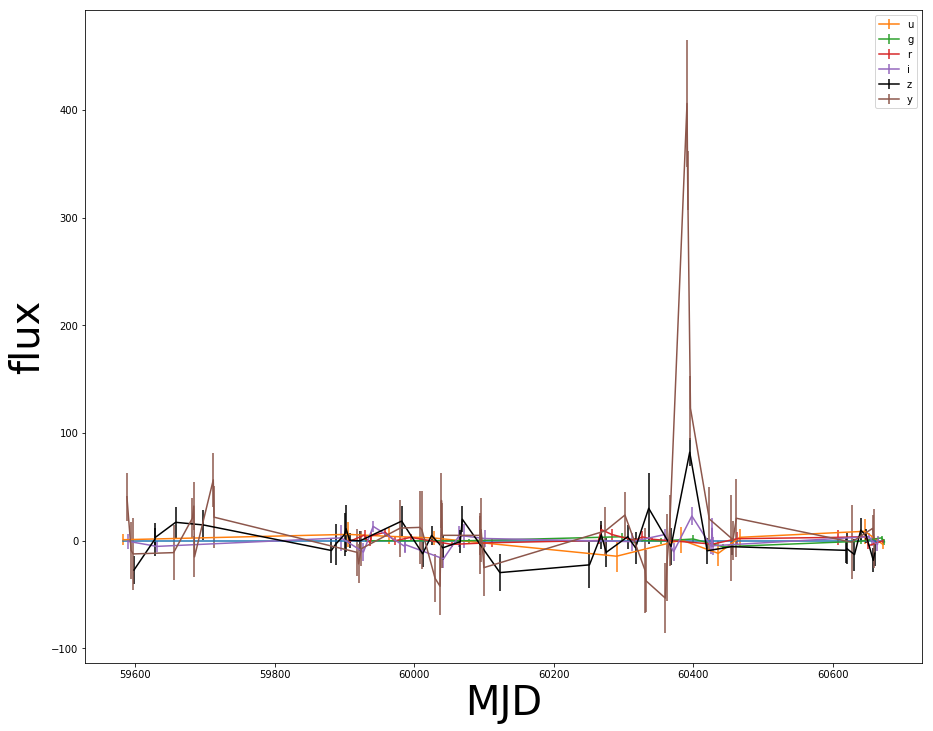

In [8]:
for i,obj_id in enumerate(kilonova_ids):
    index = df['object_id'] == obj_id
    #print(index.shape)
    plot_data(df[index])